# Analysis of Emigration from & Immigration to SWEDEN

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination.

The data source is the United Nations dedicated [webpage](https://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.asp) about the monitoring of global population trends, *Population Division* - *International Migration*.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Importing Dataset](#1)<br>
    1.1 [Splitting Dataset into Emigrants and Immigrants](#1.1) <br>
2. [Data Wrangling](#2)<br>
3. [Exploratory Data Analysis](#3) <br>
    3.1 [Pre-Analysis of Selected Countries](#3.1) <br>
4. [Data Modeling: Insights](#4) <br>
    4.1 [Comparison Selected Groups of Countries](#4.1) <br>
    4.2 [Total Emigration and Immigration](#4.2) <br>
    4.2.1 [Top 5 Countries - Sorted by Total](#4.2.1) <br>
    4.2.2 [Top 15 Countries - Sorted by Total](#4.2.2) <br>
    4.2.3 [Top 15 Countries - Sorted by Total and Continent](#4.2.3) <br>
    4.2.4 [Top 15 Countries - Sorted by Total - *Word Clouds*](#4.2.4) <br>
    4.3 [Emigration and Immigration Trends](#4.3) <br>
    4.4 [Choropleth Maps](#4.4) <br>
</div>
<hr>

## Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from wordcloud import WordCloud, STOPWORDS

import folium

------------------------

# 1. Importing Dataset<a id="1"></a>

In [3]:
df_sweden = pd.read_excel('Sweden.xlsx',
                       sheet_name='Sweden by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

In [4]:
df_sweden.shape

(371, 43)

In [5]:
df_sweden.head()

Type    Coverage               OdName  AREA  \
0  Emigrants  Foreigners          Afghanistan   935   
1  Emigrants  Foreigners              Albania   908   
2  Emigrants  Foreigners              Algeria   903   
3  Emigrants  Foreigners               Angola   903   
4  Emigrants  Foreigners  Antigua and Barbuda   904   

                          AreaName   REG          RegName  DEV  \
0                             Asia  5501    Southern Asia  902   
1                           Europe   925  Southern Europe  901   
2                           Africa   912  Northern Africa  902   
3                           Africa   911    Middle Africa  902   
4  Latin America and the Caribbean   915        Caribbean  902   

              DevName 1980  ... 2004 2005 2006 2007 2008 2009 2010 2011 2012  \
0  Developing regions   ..  ...   30   31   31   26   60   34   64   58   69   
1   Developed regions   ..  ...    4    6   13    8    9    5   12   14   18   
2  Developing regions   ..  ...   17    7   16   24    9    6   17   16   18   
3  Developing regions   ..  ...    3    1    4    3    3   ..   ..    8    1   
4  Developing regions   ..  ...    0    0    0    0   ..   ..   ..    0    1   

  2013  
0   63  
1   17  
2   14  
3    6  
4    0  

[5 rows x 43 columns]

In [6]:
df_sweden.tail()

Type    Coverage                              OdName  AREA  \
366  Immigrants  Foreigners  Venezuela (Bolivarian Republic of)   904   
367  Immigrants  Foreigners                            Viet Nam   935   
368  Immigrants  Foreigners                               Yemen   935   
369  Immigrants  Foreigners                              Zambia   903   
370  Immigrants  Foreigners                            Zimbabwe   903   

                            AreaName  REG             RegName  DEV  \
366  Latin America and the Caribbean  931       South America  902   
367                             Asia  920  South-Eastern Asia  902   
368                             Asia  922        Western Asia  902   
369                           Africa  910      Eastern Africa  902   
370                           Africa  910      Eastern Africa  902   

                DevName 1980  ... 2004 2005 2006 2007 2008 2009 2010 2011  \
366  Developing regions   ..  ...   28   43   52   49   62   45   52   62   
367  Developing regions   ..  ...  307  365  545  470  442  539  659  725   
368  Developing regions   ..  ...   18   13   69   35   25  106   92  213   
369  Developing regions   ..  ...   13   18   30   22   28   21   12   22   
370  Developing regions   ..  ...   12   16   17   16   28   20   23   30   

    2012 2013  
366   77   47  
367  649  536  
368  194  208  
369   29   24  
370   26   15  

[5 rows x 43 columns]

In [7]:
df_sweden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      371 non-null    object
 1   Coverage  371 non-null    object
 2   OdName    371 non-null    object
 3   AREA      371 non-null    int64 
 4   AreaName  371 non-null    object
 5   REG       371 non-null    int64 
 6   RegName   371 non-null    object
 7   DEV       371 non-null    int64 
 8   DevName   371 non-null    object
 9   1980      371 non-null    object
 10  1981      371 non-null    object
 11  1982      371 non-null    object
 12  1983      371 non-null    object
 13  1984      371 non-null    object
 14  1985      371 non-null    object
 15  1986      371 non-null    object
 16  1987      371 non-null    object
 17  1988      371 non-null    object
 18  1989      371 non-null    object
 19  1990      371 non-null    object
 20  1991      371 non-null    object
 21  1992      371 no

In [8]:
df_sweden.columns.values

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

------------------

## 1.1 Splitting Dataset into Emigrants and Immigrants<a id="1.1"></a>

In [9]:
df_sweden_emigrants = df_sweden[df_sweden['Type']=='Emigrants']
df_sweden_emigrants

Type    Coverage               OdName  AREA  \
0    Emigrants  Foreigners          Afghanistan   935   
1    Emigrants  Foreigners              Albania   908   
2    Emigrants  Foreigners              Algeria   903   
3    Emigrants  Foreigners               Angola   903   
4    Emigrants  Foreigners  Antigua and Barbuda   904   
..         ...         ...                  ...   ...   
180  Emigrants  Foreigners               Zambia   903   
181  Emigrants  Foreigners             Zimbabwe   903   
182  Emigrants  Foreigners            Stateless   999   
183  Emigrants  Foreigners              Unknown   999   
184  Emigrants        Both                Total   999   

                            AreaName   REG          RegName  DEV  \
0                               Asia  5501    Southern Asia  902   
1                             Europe   925  Southern Europe  901   
2                             Africa   912  Northern Africa  902   
3                             Africa   911    Middle Africa  902   
4    Latin America and the Caribbean   915        Caribbean  902   
..                               ...   ...              ...  ...   
180                           Africa   910   Eastern Africa  902   
181                           Africa   910   Eastern Africa  902   
182                            World   999            World  999   
183                            World   999            World  999   
184                            World   999            World  999   

                DevName 1980  ...   2004   2005   2006   2007   2008   2009  \
0    Developing regions   ..  ...     30     31     31     26     60     34   
1     Developed regions   ..  ...      4      6     13      8      9      5   
2    Developing regions   ..  ...     17      7     16     24      9      6   
3    Developing regions   ..  ...      3      1      4      3      3     ..   
4    Developing regions   ..  ...      0      0      0      0     ..     ..   
..                  ...  ...  ...    ...    ...    ...    ...    ...    ...   
180  Developing regions   ..  ...      9      6     11      6     11      4   
181  Developing regions   ..  ...     11      4      7      9      1      7   
182               World   ..  ...     42     54     54     60     81     48   
183               World   ..  ...    258    178    274    254    163     81   
184               World   ..  ...  36586  38118  44908  45418  45294  39240   

      2010   2011   2012   2013  
0       64     58     69     63  
1       12     14     18     17  
2       17     16     18     14  
3       ..      8      1      6  
4       ..      0      1      0  
..     ...    ...    ...    ...  
180      7      5      6      5  
181      6      3      7      3  
182     44     69    111     82  
183    137    146    133    126  
184  48853  51179  51747  50715  

[185 rows x 43 columns]

In [10]:
df_sweden_immigrants = df_sweden[df_sweden['Type']=='Immigrants']
df_sweden_immigrants

Type    Coverage                              OdName  AREA  \
185  Immigrants  Foreigners                         Afghanistan   935   
186  Immigrants  Foreigners                             Albania   908   
187  Immigrants  Foreigners                             Algeria   903   
188  Immigrants  Foreigners                             Andorra   908   
189  Immigrants  Foreigners                              Angola   903   
..          ...         ...                                 ...   ...   
366  Immigrants  Foreigners  Venezuela (Bolivarian Republic of)   904   
367  Immigrants  Foreigners                            Viet Nam   935   
368  Immigrants  Foreigners                               Yemen   935   
369  Immigrants  Foreigners                              Zambia   903   
370  Immigrants  Foreigners                            Zimbabwe   903   

                            AreaName   REG             RegName  DEV  \
185                             Asia  5501       Southern Asia  902   
186                           Europe   925     Southern Europe  901   
187                           Africa   912     Northern Africa  902   
188                           Europe   925     Southern Europe  901   
189                           Africa   911       Middle Africa  902   
..                               ...   ...                 ...  ...   
366  Latin America and the Caribbean   931       South America  902   
367                             Asia   920  South-Eastern Asia  902   
368                             Asia   922        Western Asia  902   
369                           Africa   910      Eastern Africa  902   
370                           Africa   910      Eastern Africa  902   

                DevName 1980  ... 2004 2005  2006 2007  2008  2009  2010  \
185  Developing regions   ..  ...  964  656  1669  835  1033  1558  1920   
186   Developed regions   ..  ...   68   96   180   96    98   122   164   
187  Developing regions   ..  ...   85  111   163  119   127   145   122   
188   Developed regions   ..  ...    0    0     0    0    ..    ..     1   
189  Developing regions   ..  ...   23   19    86   30    17    27    10   
..                  ...  ...  ...  ...  ...   ...  ...   ...   ...   ...   
366  Developing regions   ..  ...   28   43    52   49    62    45    52   
367  Developing regions   ..  ...  307  365   545  470   442   539   659   
368  Developing regions   ..  ...   18   13    69   35    25   106    92   
369  Developing regions   ..  ...   13   18    30   22    28    21    12   
370  Developing regions   ..  ...   12   16    17   16    28    20    23   

     2011  2012  2013  
185  3415  4673  4165  
186   137   226   192  
187   100   136    98  
188     0     0     0  
189    15    17     8  
..    ...   ...   ...  
366    62    77    47  
367   725   649   536  
368   213   194   208  
369    22    29    24  
370    30    26    15  

[186 rows x 43 columns]

---------------------

# 2. Data Wrangling<a id="2"></a>

In [11]:
df_sweden_emigrants.drop(['Type','Coverage','AREA','REG','DEV'], axis=1, inplace=True)
df_sweden_emigrants.head(2)

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


OdName AreaName          RegName             DevName 1980 1981 1982  \
0  Afghanistan     Asia    Southern Asia  Developing regions   ..   ..   ..   
1      Albania   Europe  Southern Europe   Developed regions   ..   ..   ..   

  1983 1984 1985  ... 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013  
0   ..   ..   ..  ...   30   31   31   26   60   34   64   58   69   63  
1   ..   ..   ..  ...    4    6   13    8    9    5   12   14   18   17  

[2 rows x 38 columns]

In [12]:
df_sweden_immigrants.drop(['Type','Coverage','AREA','REG','DEV'], axis=1, inplace=True)
df_sweden_immigrants.head(2)

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


OdName AreaName          RegName             DevName 1980 1981 1982  \
185  Afghanistan     Asia    Southern Asia  Developing regions   ..   ..   ..   
186      Albania   Europe  Southern Europe   Developed regions   ..   ..   ..   

    1983 1984 1985  ... 2004 2005  2006 2007  2008  2009  2010  2011  2012  \
185   ..   ..   ..  ...  964  656  1669  835  1033  1558  1920  3415  4673   
186   ..   ..   ..  ...   68   96   180   96    98   122   164   137   226   

     2013  
185  4165  
186   192  

[2 rows x 38 columns]

------------------

In [13]:
years = list(map(int, range(1980, 2014)))
years

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

In [14]:
df_sweden_emigrants.dtypes

OdName      object
AreaName    object
RegName     object
DevName     object
1980        object
1981        object
1982        object
1983        object
1984        object
1985        object
1986        object
1987        object
1988        object
1989        object
1990        object
1991        object
1992        object
1993        object
1994        object
1995        object
1996        object
1997        object
1998        object
1999        object
2000        object
2001        object
2002        object
2003        object
2004        object
2005        object
2006         int64
2007         int64
2008        object
2009        object
2010        object
2011         int64
2012         int64
2013         int64
dtype: object

In [15]:
df_sweden_emigrants[years]

1980 1981 1982 1983 1984 1985 1986 1987 1988 1989  ...   2004   2005  \
0     ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...     30     31   
1     ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...      4      6   
2     ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...     17      7   
3     ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...      3      1   
4     ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...      0      0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
180   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...      9      6   
181   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...     11      4   
182   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...     42     54   
183   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...    258    178   
184   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...  36586  38118   

      2006   2007   2008   2009   2010   2011   2012   2013  
0       31     26     60     34     64     58     69     63  
1       13      8      9      5     12     14     18     17  
2       16     24      9      6     17     16     18     14  
3        4      3      3     ..     ..      8      1      6  
4        0      0     ..     ..     ..      0      1      0  
..     ...    ...    ...    ...    ...    ...    ...    ...  
180     11      6     11      4      7      5      6      5  
181      7      9      1      7      6      3      7      3  
182     54     60     81     48     44     69    111     82  
183    274    254    163     81    137    146    133    126  
184  44908  45418  45294  39240  48853  51179  51747  50715  

[185 rows x 34 columns]

In [16]:
df_sweden_emigrants[1981]

0      ..
1      ..
2      ..
3      ..
4      ..
       ..
180    ..
181    ..
182    ..
183    ..
184    ..
Name: 1981, Length: 185, dtype: object

In [17]:
df_sweden_emigrants.loc[2, 1981]

'..'

In [18]:
df_sweden_emigrants.replace('..', 0, inplace=True)

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [19]:
df_sweden_emigrants.head()

OdName                         AreaName          RegName  \
0          Afghanistan                             Asia    Southern Asia   
1              Albania                           Europe  Southern Europe   
2              Algeria                           Africa  Northern Africa   
3               Angola                           Africa    Middle Africa   
4  Antigua and Barbuda  Latin America and the Caribbean        Caribbean   

              DevName  1980  1981  1982  1983  1984  1985  ...  2004  2005  \
0  Developing regions     0     0     0     0     0     0  ...    30    31   
1   Developed regions     0     0     0     0     0     0  ...     4     6   
2  Developing regions     0     0     0     0     0     0  ...    17     7   
3  Developing regions     0     0     0     0     0     0  ...     3     1   
4  Developing regions     0     0     0     0     0     0  ...     0     0   

   2006  2007  2008  2009  2010  2011  2012  2013  
0    31    26    60    34    64    58    69    63  
1    13     8     9     5    12    14    18    17  
2    16    24     9     6    17    16    18    14  
3     4     3     3     0     0     8     1     6  
4     0     0     0     0     0     0     1     0  

[5 rows x 38 columns]

In [20]:
df_sweden_emigrants[years] = df_sweden_emigrants[years].astype("float")

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [21]:
df_sweden_emigrants.dtypes

OdName       object
AreaName     object
RegName      object
DevName      object
1980        float64
1981        float64
1982        float64
1983        float64
1984        float64
1985        float64
1986        float64
1987        float64
1988        float64
1989        float64
1990        float64
1991        float64
1992        float64
1993        float64
1994        float64
1995        float64
1996        float64
1997        float64
1998        float64
1999        float64
2000        float64
2001        float64
2002        float64
2003        float64
2004        float64
2005        float64
2006        float64
2007        float64
2008        float64
2009        float64
2010        float64
2011        float64
2012        float64
2013        float64
dtype: object

---------------------------

In [22]:
df_sweden_immigrants.dtypes

OdName      object
AreaName    object
RegName     object
DevName     object
1980        object
1981        object
1982        object
1983        object
1984        object
1985        object
1986        object
1987        object
1988        object
1989        object
1990        object
1991        object
1992        object
1993        object
1994        object
1995        object
1996        object
1997        object
1998        object
1999        object
2000        object
2001        object
2002        object
2003        object
2004        object
2005        object
2006         int64
2007         int64
2008        object
2009        object
2010        object
2011         int64
2012         int64
2013         int64
dtype: object

In [23]:
df_sweden_immigrants[years]

1980 1981 1982 1983 1984 1985 1986 1987 1988 1989  ... 2004 2005  2006  \
185   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...  964  656  1669   
186   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...   68   96   180   
187   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...   85  111   163   
188   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...    0    0     0   
189   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...   23   19    86   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
366   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...   28   43    52   
367   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...  307  365   545   
368   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...   18   13    69   
369   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...   13   18    30   
370   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...   12   16    17   

    2007  2008  2009  2010  2011  2012  2013  
185  835  1033  1558  1920  3415  4673  4165  
186   96    98   122   164   137   226   192  
187  119   127   145   122   100   136    98  
188    0    ..    ..     1     0     0     0  
189   30    17    27    10    15    17     8  
..   ...   ...   ...   ...   ...   ...   ...  
366   49    62    45    52    62    77    47  
367  470   442   539   659   725   649   536  
368   35    25   106    92   213   194   208  
369   22    28    21    12    22    29    24  
370   16    28    20    23    30    26    15  

[186 rows x 34 columns]

In [24]:
df_sweden_immigrants.replace('..', 0, inplace=True)

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [25]:
df_sweden_immigrants.head()

OdName AreaName          RegName             DevName  1980  1981  \
185  Afghanistan     Asia    Southern Asia  Developing regions     0     0   
186      Albania   Europe  Southern Europe   Developed regions     0     0   
187      Algeria   Africa  Northern Africa  Developing regions     0     0   
188      Andorra   Europe  Southern Europe   Developed regions     0     0   
189       Angola   Africa    Middle Africa  Developing regions     0     0   

     1982  1983  1984  1985  ...  2004  2005  2006  2007  2008  2009  2010  \
185     0     0     0     0  ...   964   656  1669   835  1033  1558  1920   
186     0     0     0     0  ...    68    96   180    96    98   122   164   
187     0     0     0     0  ...    85   111   163   119   127   145   122   
188     0     0     0     0  ...     0     0     0     0     0     0     1   
189     0     0     0     0  ...    23    19    86    30    17    27    10   

     2011  2012  2013  
185  3415  4673  4165  
186   137   226   192  
187   100   136    98  
188     0     0     0  
189    15    17     8  

[5 rows x 38 columns]

In [26]:
df_sweden_immigrants[years] = df_sweden_immigrants[years].astype("float")

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [27]:
df_sweden_immigrants.dtypes

OdName       object
AreaName     object
RegName      object
DevName      object
1980        float64
1981        float64
1982        float64
1983        float64
1984        float64
1985        float64
1986        float64
1987        float64
1988        float64
1989        float64
1990        float64
1991        float64
1992        float64
1993        float64
1994        float64
1995        float64
1996        float64
1997        float64
1998        float64
1999        float64
2000        float64
2001        float64
2002        float64
2003        float64
2004        float64
2005        float64
2006        float64
2007        float64
2008        float64
2009        float64
2010        float64
2011        float64
2012        float64
2013        float64
dtype: object

---------------------

In [28]:
df_sweden_emigrants.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region', 'DevName':'Development'}, inplace=True)
df_sweden_emigrants.columns

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index([    'Country',   'Continent',      'Region', 'Development',
                1980,          1981,          1982,          1983,
                1984,          1985,          1986,          1987,
                1988,          1989,          1990,          1991,
                1992,          1993,          1994,          1995,
                1996,          1997,          1998,          1999,
                2000,          2001,          2002,          2003,
                2004,          2005,          2006,          2007,
                2008,          2009,          2010,          2011,
                2012,          2013],
      dtype='object')

In [29]:
df_sweden_immigrants.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region', 'DevName':'Development'}, inplace=True)
df_sweden_immigrants.columns

Index([    'Country',   'Continent',      'Region', 'Development',
                1980,          1981,          1982,          1983,
                1984,          1985,          1986,          1987,
                1988,          1989,          1990,          1991,
                1992,          1993,          1994,          1995,
                1996,          1997,          1998,          1999,
                2000,          2001,          2002,          2003,
                2004,          2005,          2006,          2007,
                2008,          2009,          2010,          2011,
                2012,          2013],
      dtype='object')

In [30]:
df_sweden_emigrants.columns = list(map(str, df_sweden_emigrants.columns))
df_sweden_emigrants.columns

Index(['Country', 'Continent', 'Region', 'Development', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'],
      dtype='object')

In [31]:
df_sweden_immigrants.columns = list(map(str, df_sweden_immigrants.columns))
df_sweden_immigrants.columns

Index(['Country', 'Continent', 'Region', 'Development', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'],
      dtype='object')

In [32]:
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [33]:
df_sweden_emigrants.set_index('Country', inplace=True)
df_sweden_emigrants.head()

Continent           Region  \
Country                                                                 
Afghanistan                                     Asia    Southern Asia   
Albania                                       Europe  Southern Europe   
Algeria                                       Africa  Northern Africa   
Angola                                        Africa    Middle Africa   
Antigua and Barbuda  Latin America and the Caribbean        Caribbean   

                            Development  1980  1981  1982  1983  1984  1985  \
Country                                                                       
Afghanistan          Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Albania               Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   
Algeria              Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Angola               Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Antigua and Barbuda  Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   

                     1986  ...  2004  2005  2006  2007  2008  2009  2010  \
Country                    ...                                             
Afghanistan           0.0  ...  30.0  31.0  31.0  26.0  60.0  34.0  64.0   
Albania               0.0  ...   4.0   6.0  13.0   8.0   9.0   5.0  12.0   
Algeria               0.0  ...  17.0   7.0  16.0  24.0   9.0   6.0  17.0   
Angola                0.0  ...   3.0   1.0   4.0   3.0   3.0   0.0   0.0   
Antigua and Barbuda   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                     2011  2012  2013  
Country                                
Afghanistan          58.0  69.0  63.0  
Albania              14.0  18.0  17.0  
Algeria              16.0  18.0  14.0  
Angola                8.0   1.0   6.0  
Antigua and Barbuda   0.0   1.0   0.0  

[5 rows x 37 columns]

In [34]:
df_sweden_immigrants.set_index('Country', inplace=True)
df_sweden_immigrants.head()

Continent           Region         Development  1980  1981  1982  \
Country                                                                        
Afghanistan      Asia    Southern Asia  Developing regions   0.0   0.0   0.0   
Albania        Europe  Southern Europe   Developed regions   0.0   0.0   0.0   
Algeria        Africa  Northern Africa  Developing regions   0.0   0.0   0.0   
Andorra        Europe  Southern Europe   Developed regions   0.0   0.0   0.0   
Angola         Africa    Middle Africa  Developing regions   0.0   0.0   0.0   

             1983  1984  1985  1986  ...   2004   2005    2006   2007    2008  \
Country                              ...                                        
Afghanistan   0.0   0.0   0.0   0.0  ...  964.0  656.0  1669.0  835.0  1033.0   
Albania       0.0   0.0   0.0   0.0  ...   68.0   96.0   180.0   96.0    98.0   
Algeria       0.0   0.0   0.0   0.0  ...   85.0  111.0   163.0  119.0   127.0   
Andorra       0.0   0.0   0.0   0.0  ...    0.0    0.0     0.0    0.0     0.0   
Angola        0.0   0.0   0.0   0.0  ...   23.0   19.0    86.0   30.0    17.0   

               2009    2010    2011    2012    2013  
Country                                              
Afghanistan  1558.0  1920.0  3415.0  4673.0  4165.0  
Albania       122.0   164.0   137.0   226.0   192.0  
Algeria       145.0   122.0   100.0   136.0    98.0  
Andorra         0.0     1.0     0.0     0.0     0.0  
Angola         27.0    10.0    15.0    17.0     8.0  

[5 rows x 37 columns]

In [35]:
df_sweden_emigrants['Total'] = df_sweden_emigrants.sum(axis=1)
df_sweden_emigrants.head()

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Continent           Region  \
Country                                                                 
Afghanistan                                     Asia    Southern Asia   
Albania                                       Europe  Southern Europe   
Algeria                                       Africa  Northern Africa   
Angola                                        Africa    Middle Africa   
Antigua and Barbuda  Latin America and the Caribbean        Caribbean   

                            Development  1980  1981  1982  1983  1984  1985  \
Country                                                                       
Afghanistan          Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Albania               Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   
Algeria              Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Angola               Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Antigua and Barbuda  Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   

                     1986  ...  2005  2006  2007  2008  2009  2010  2011  \
Country                    ...                                             
Afghanistan           0.0  ...  31.0  31.0  26.0  60.0  34.0  64.0  58.0   
Albania               0.0  ...   6.0  13.0   8.0   9.0   5.0  12.0  14.0   
Algeria               0.0  ...   7.0  16.0  24.0   9.0   6.0  17.0  16.0   
Angola                0.0  ...   1.0   4.0   3.0   3.0   0.0   0.0   8.0   
Antigua and Barbuda   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                     2012  2013  Total  
Country                                 
Afghanistan          69.0  63.0  565.0  
Albania              18.0  17.0  112.0  
Algeria              18.0  14.0  193.0  
Angola                1.0   6.0   40.0  
Antigua and Barbuda   1.0   0.0    1.0  

[5 rows x 38 columns]

In [36]:
df_sweden_emigrants.columns

Index(['Continent', 'Region', 'Development', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [37]:
df_sweden_emigrants.index.tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China (including Hong Kong Special Administrative Region)',
 'China, Taiwan Province of China',
 'Colombia',
 'Congo',
 'Costa Rica',
 "Côte d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 '

In [38]:
df_sweden_immigrants['Total'] = df_sweden_immigrants.sum(axis=1)
df_sweden_immigrants.head()

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Continent           Region         Development  1980  1981  1982  \
Country                                                                        
Afghanistan      Asia    Southern Asia  Developing regions   0.0   0.0   0.0   
Albania        Europe  Southern Europe   Developed regions   0.0   0.0   0.0   
Algeria        Africa  Northern Africa  Developing regions   0.0   0.0   0.0   
Andorra        Europe  Southern Europe   Developed regions   0.0   0.0   0.0   
Angola         Africa    Middle Africa  Developing regions   0.0   0.0   0.0   

             1983  1984  1985  1986  ...   2005    2006   2007    2008  \
Country                              ...                                 
Afghanistan   0.0   0.0   0.0   0.0  ...  656.0  1669.0  835.0  1033.0   
Albania       0.0   0.0   0.0   0.0  ...   96.0   180.0   96.0    98.0   
Algeria       0.0   0.0   0.0   0.0  ...  111.0   163.0  119.0   127.0   
Andorra       0.0   0.0   0.0   0.0  ...    0.0     0.0    0.0     0.0   
Angola        0.0   0.0   0.0   0.0  ...   19.0    86.0   30.0    17.0   

               2009    2010    2011    2012    2013    Total  
Country                                                       
Afghanistan  1558.0  1920.0  3415.0  4673.0  4165.0  25537.0  
Albania       122.0   164.0   137.0   226.0   192.0   1666.0  
Algeria       145.0   122.0   100.0   136.0    98.0   1647.0  
Andorra         0.0     1.0     0.0     0.0     0.0      1.0  
Angola         27.0    10.0    15.0    17.0     8.0    380.0  

[5 rows x 38 columns]

In [39]:
df_sweden_immigrants.columns

Index(['Continent', 'Region', 'Development', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [40]:
df_sweden_immigrants.index.tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Côte d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemal

---------------
---------------

# 3. Exploratory Data Analysis<a id="3"></a>

In [41]:
df_sweden_emigrants.describe()

1980   1981   1982   1983   1984   1985   1986   1987   1988   1989  \
count  185.0  185.0  185.0  185.0  185.0  185.0  185.0  185.0  185.0  185.0   
mean     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
std      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
min      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
25%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
50%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
75%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
max      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...          2005          2006          2007          2008  \
count  ...    185.000000    185.000000    185.000000    185.000000   
mean   ...    412.086486    485.491892    491.005405    489.664865   
std    ...   3245.676375   3768.591361   3805.036837   3836.684994   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      1.000000      1.000000      1.000000      1.000000   
50%    ...      7.000000     12.000000     12.000000     11.000000   
75%    ...     42.000000     71.000000     67.000000     60.000000   
max    ...  38118.000000  44908.000000  45418.000000  45294.000000   

               2009          2010          2011          2012          2013  \
count    185.000000    185.000000    185.000000    185.000000    185.000000   
mean     424.216216    528.140541    553.286486    559.427027    548.270270   
std     3268.211181   4090.022394   4263.847780   4221.021678   4186.166189   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      1.000000      2.000000      2.000000      2.000000   
50%        8.000000     12.000000     16.000000     20.000000     17.000000   
75%       52.000000     79.000000     94.000000    111.000000     80.000000   
max    39240.000000  48853.000000  51179.000000  51747.000000  50715.000000   

               Total  
count     185.000000  
mean     7141.027027  
std     55631.270597  
min         1.000000  
25%        25.000000  
50%       170.000000  
75%       948.000000  
max    660545.000000  

[8 rows x 35 columns]

In [42]:
df_sweden_immigrants.describe()

1980   1981   1982   1983   1984   1985   1986   1987   1988   1989  \
count  186.0  186.0  186.0  186.0  186.0  186.0  186.0  186.0  186.0  186.0   
mean     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
std      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
min      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
25%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
50%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
75%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
max      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...          2005          2006          2007          2008  \
count  ...    186.000000    186.000000    186.000000    186.000000   
mean   ...    334.408602    482.327957    528.241935    534.048387   
std    ...   1163.651557   1551.063135   1802.161708   1757.994605   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      4.000000      5.000000      5.000000      5.000000   
50%    ...     43.500000     69.500000     62.500000     76.000000   
75%    ...    233.500000    332.000000    323.750000    308.500000   
max    ...  13932.000000  15352.000000  15949.000000  17853.000000   

               2009          2010          2011          2012          2013  \
count    186.000000    186.000000    186.000000    186.000000    186.000000   
mean     535.408602    518.322581    504.661290    537.720430    592.241935   
std     1692.177486   1677.174262   1675.034079   1705.797066   1990.122745   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        5.250000      5.000000      6.000000      7.250000      5.000000   
50%       80.500000     72.500000     73.500000     78.500000     70.000000   
75%      305.500000    332.000000    304.750000    341.750000    347.750000   
max    18517.000000  19765.000000  20615.000000  20462.000000  20484.000000   

               Total  
count     186.000000  
mean     6644.607527  
std     22902.431427  
min         1.000000  
25%        77.000000  
50%       972.500000  
75%      4359.250000  
max    271332.000000  

[8 rows x 35 columns]

In [43]:
df_sweden_emigrants[years[0:13]].describe()

1980   1981   1982   1983   1984   1985   1986   1987   1988   1989  \
count  185.0  185.0  185.0  185.0  185.0  185.0  185.0  185.0  185.0  185.0   
mean     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
std      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
min      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
25%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
50%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
75%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
max      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

        1990   1991   1992  
count  185.0  185.0  185.0  
mean     0.0    0.0    0.0  
std      0.0    0.0    0.0  
min      0.0    0.0    0.0  
25%      0.0    0.0    0.0  
50%      0.0    0.0    0.0  
75%      0.0    0.0    0.0  
max      0.0    0.0    0.0

In [44]:
df_sweden_immigrants[years[0:13]].describe()

1980   1981   1982   1983   1984   1985   1986   1987   1988   1989  \
count  186.0  186.0  186.0  186.0  186.0  186.0  186.0  186.0  186.0  186.0   
mean     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
std      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
min      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
25%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
50%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
75%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
max      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

        1990   1991   1992  
count  186.0  186.0  186.0  
mean     0.0    0.0    0.0  
std      0.0    0.0    0.0  
min      0.0    0.0    0.0  
25%      0.0    0.0    0.0  
50%      0.0    0.0    0.0  
75%      0.0    0.0    0.0  
max      0.0    0.0    0.0

In [45]:
df_sweden_emigrants[['2001']].describe()

2001
count    185.000000
mean     347.470270
std     2761.600523
min        0.000000
25%        0.000000
50%        4.000000
75%       28.000000
max    32141.000000

In [46]:
df_sweden_immigrants[['2001']].describe()

2001
count    186.000000
mean     305.704301
std     1369.735154
min        0.000000
25%        3.000000
50%       26.000000
75%      152.250000
max    16678.000000

--------------

In [47]:
df_sweden_emigrants['Development'].value_counts().to_frame()

Development
Developing regions          136
Developed regions            46
World                         3

In [48]:
df_sweden_immigrants['Development'].value_counts().to_frame()

Development
Developing regions          138
Developed regions            48

In [49]:
df_sweden_emigrants['Development']

Country
Afghanistan            Developing regions
Albania                 Developed regions
Algeria                Developing regions
Angola                 Developing regions
Antigua and Barbuda    Developing regions
                              ...        
Zambia                 Developing regions
Zimbabwe               Developing regions
Stateless                           World
Unknown                             World
Total                               World
Name: Development, Length: 185, dtype: object

In [50]:
df_sweden_emigrants['Continent'].value_counts().to_frame()

Continent
Africa                                  52
Asia                                    48
Europe                                  41
Latin America and the Caribbean         31
Oceania                                  8
World                                    3
Northern America                         2

In [51]:
df_sweden_immigrants['Continent'].value_counts().to_frame()

Continent
Africa                                  53
Asia                                    46
Europe                                  43
Latin America and the Caribbean         32
Oceania                                 10
Northern America                         2

In [52]:
df_sweden_emigrants['Continent']

Country
Afghanistan                                       Asia
Albania                                         Europe
Algeria                                         Africa
Angola                                          Africa
Antigua and Barbuda    Latin America and the Caribbean
                                    ...               
Zambia                                          Africa
Zimbabwe                                        Africa
Stateless                                        World
Unknown                                          World
Total                                            World
Name: Continent, Length: 185, dtype: object

In [53]:
df_sweden_emigrants['Region'].value_counts().to_frame()

Region
Western Asia                   18
Eastern Africa                 16
Western Africa                 16
Southern Europe                13
South America                  12
Caribbean                      12
Eastern Europe                 10
South-Eastern Asia             10
Northern Europe                10
Southern Asia                   9
Middle Africa                   9
Western Europe                  8
Central America                 7
Eastern Asia                    6
Northern Africa                 6
Central Asia                    5
Southern Africa                 5
World                           3
Polynesia                       2
Australia and New Zealand       2
Melanesia                       2
Micronesia                      2
Northern America                2

In [54]:
df_sweden_immigrants['Region'].value_counts().to_frame()

Region
Eastern Africa                 17
Western Asia                   17
Western Africa                 16
Southern Europe                14
Caribbean                      12
South America                  12
Northern Europe                10
Eastern Europe                 10
South-Eastern Asia             10
Middle Africa                   9
Southern Asia                   9
Western Europe                  9
Central America                 8
Northern Africa                 6
Southern Africa                 5
Eastern Asia                    5
Central Asia                    5
Melanesia                       4
Micronesia                      2
Northern America                2
Australia and New Zealand       2
Polynesia                       2

------------------

## 3.1 Pre-Analysis of Selected Countries<a id="3.1"></a>

----------------------

### France

In [55]:
france_e = df_sweden_emigrants.loc['France', years]
france_e.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: France, dtype: object

In [56]:
france_i = df_sweden_immigrants.loc['France', years]
france_i.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: France, dtype: object

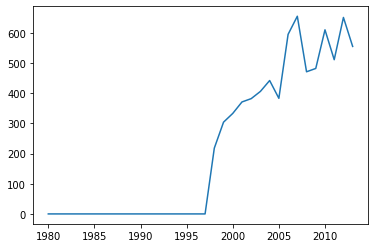

In [57]:
france_e.plot()

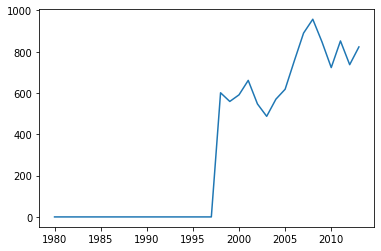

In [58]:
france_i.plot()

In [59]:
france_netvalue = france_i - france_e

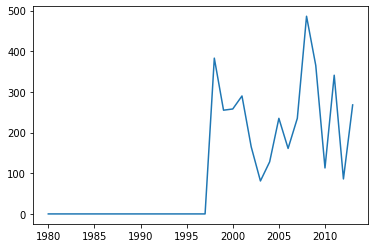

In [60]:
france_netvalue.plot()

--------------------

In [61]:
france_e_new = df_sweden_emigrants.loc['France', years[11:]]
france_e_new.head()

1991    0
1992    0
1993    0
1994    0
1995    0
Name: France, dtype: object

In [62]:
france_i_new = df_sweden_immigrants.loc['France', years[11:]]
france_i_new.head()

1991    0
1992    0
1993    0
1994    0
1995    0
Name: France, dtype: object

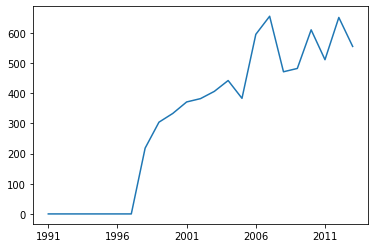

In [63]:
france_e_new.plot()

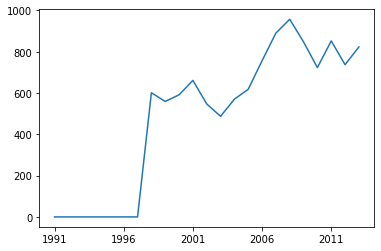

In [64]:
france_i_new.plot()

In [65]:
france_netvalue_new = france_i_new - france_e_new

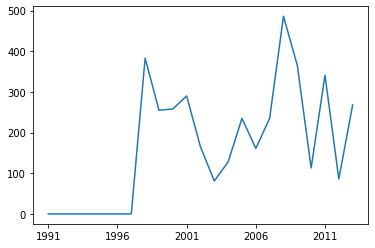

In [66]:
france_netvalue_new.plot()

----------------------

### Germany

In [67]:
germany_e = df_sweden_emigrants.loc['Germany', years]
germany_e.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: Germany, dtype: object

In [68]:
germany_i = df_sweden_immigrants.loc['Germany', years]
germany_i.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: Germany, dtype: object

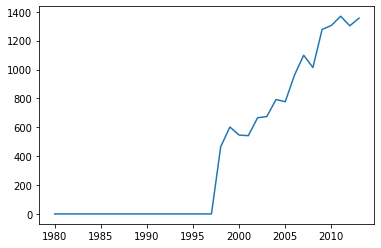

In [69]:
germany_e.plot()

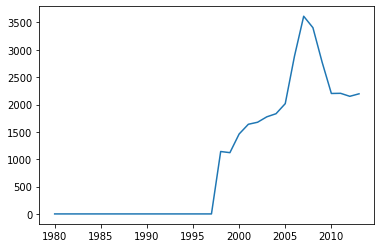

In [70]:
germany_i.plot()

In [71]:
germany_netvalue = germany_i - germany_e

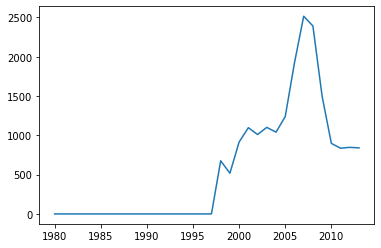

In [72]:
germany_netvalue.plot()

----------------------

### Algeria

In [73]:
algeria_e = df_sweden_emigrants.loc['Algeria', years]
algeria_e.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: Algeria, dtype: object

In [74]:
algeria_i = df_sweden_immigrants.loc['Algeria', years]
algeria_i.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: Algeria, dtype: object

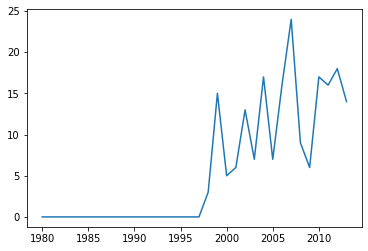

In [75]:
algeria_e.plot()

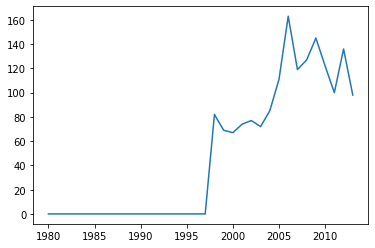

In [76]:
algeria_i.plot()

In [77]:
algeria_netvalue = algeria_i - algeria_e

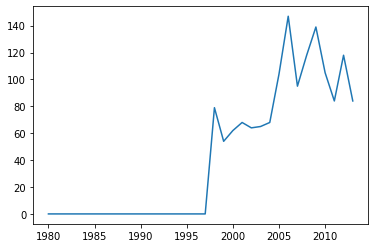

In [78]:
algeria_netvalue.plot()

----------------------

### Belgium

In [79]:
belgium_e = df_sweden_emigrants.loc['Belgium', years]
belgium_e.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: Belgium, dtype: object

In [80]:
belgium_i = df_sweden_immigrants.loc['Belgium', years]
belgium_i.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: Belgium, dtype: object

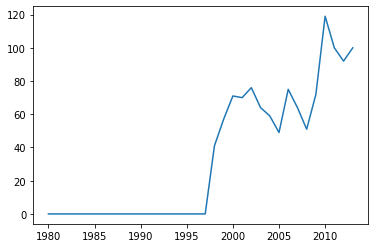

In [81]:
belgium_e.plot()

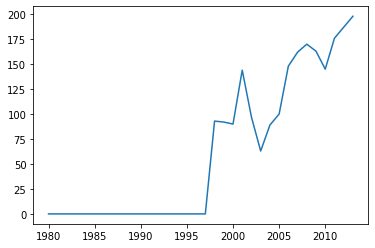

In [82]:
belgium_i.plot()

In [83]:
belgium_netvalue = belgium_i - belgium_e

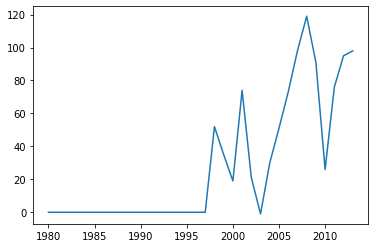

In [84]:
belgium_netvalue.plot()

----------------------

### United Kingdom

In [85]:
UK_e = df_sweden_emigrants.loc['United Kingdom of Great Britain and Northern Ireland', years]
UK_e.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: United Kingdom of Great Britain and Northern Ireland, dtype: object

In [86]:
UK_i = df_sweden_immigrants.loc['United Kingdom of Great Britain and Northern Ireland', years]
UK_i.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: United Kingdom of Great Britain and Northern Ireland, dtype: object

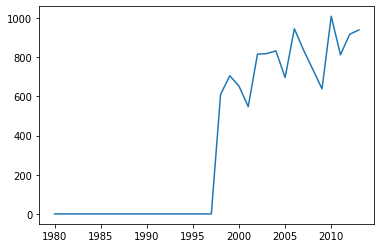

In [87]:
UK_e.plot()

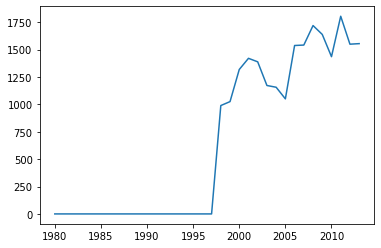

In [88]:
UK_i.plot()

In [89]:
UK_netvalue = UK_i - UK_e

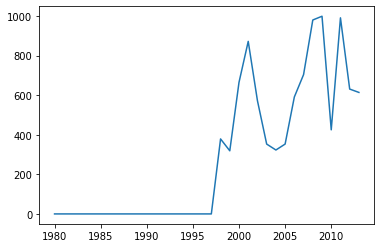

In [90]:
UK_netvalue.plot()

In [91]:
UK_e_new = df_sweden_emigrants.loc['United Kingdom of Great Britain and Northern Ireland', years[11:]]
UK_e_new.head()

1991    0
1992    0
1993    0
1994    0
1995    0
Name: United Kingdom of Great Britain and Northern Ireland, dtype: object

In [92]:
UK_i_new = df_sweden_immigrants.loc['United Kingdom of Great Britain and Northern Ireland', years[11:]]
UK_i_new.head()

1991    0
1992    0
1993    0
1994    0
1995    0
Name: United Kingdom of Great Britain and Northern Ireland, dtype: object

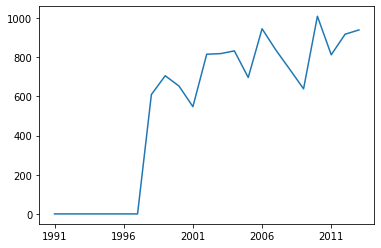

In [93]:
UK_e_new.plot()

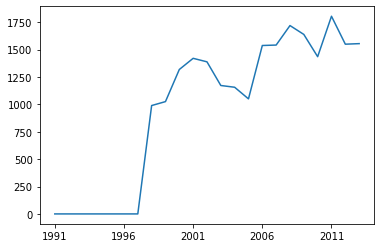

In [94]:
UK_i_new.plot()

In [95]:
UK_netvalue_new = UK_i_new - UK_e_new

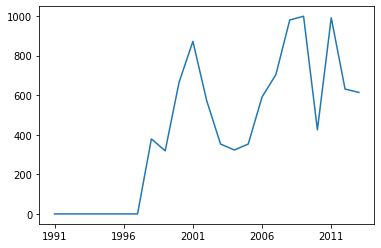

In [96]:
UK_netvalue_new.plot()

----------------------

### Sweden

In [97]:
sweden_e = df_sweden_emigrants.loc['Sweden', years]
sweden_e.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: Sweden, dtype: object

In [98]:
sweden_i = df_sweden_immigrants.loc['Sweden', years]
sweden_i.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: Sweden, dtype: object

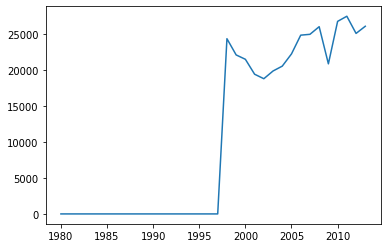

In [99]:
sweden_e.plot()

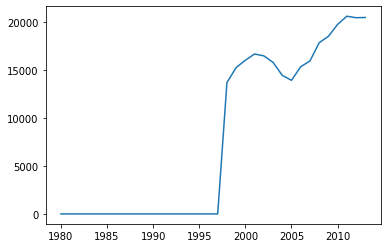

In [100]:
sweden_i.plot()

In [101]:
sweden_e_new = df_sweden_emigrants.loc['Sweden', years[18:]]
sweden_e_new.head()

1998    24381
1999    22123
2000    21515
2001    19439
2002    18813
Name: Sweden, dtype: object

In [102]:
sweden_i_new = df_sweden_immigrants.loc['Sweden', years[18:]]
sweden_i_new.head()

1998    13690
1999    15266
2000    16030
2001    16678
2002    16484
Name: Sweden, dtype: object

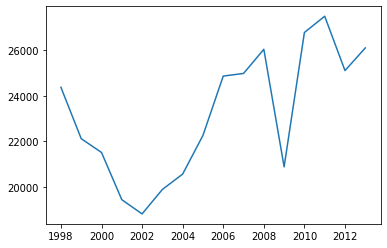

In [103]:
sweden_e_new.plot()

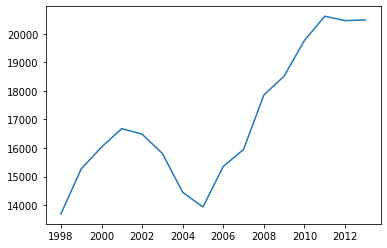

In [104]:
sweden_i_new.plot()

----------------------

### China

In [105]:
china_e = df_sweden_emigrants.loc['China (including Hong Kong Special Administrative Region)', years]
china_e.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: China (including Hong Kong Special Administrative Region), dtype: object

In [106]:
china_i = df_sweden_immigrants.loc['China', years]
china_i.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: China, dtype: object

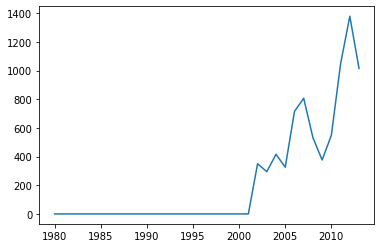

In [107]:
china_e.plot()

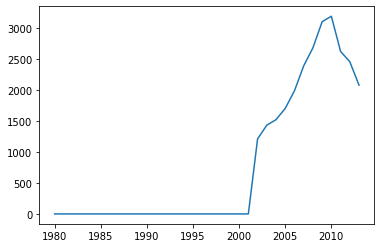

In [108]:
china_i.plot()

In [109]:
china_e_new = df_sweden_emigrants.loc['China (including Hong Kong Special Administrative Region)', years[15:]]
china_e_new.head()

1995    0
1996    0
1997    0
1998    0
1999    0
Name: China (including Hong Kong Special Administrative Region), dtype: object

In [110]:
china_i_new = df_sweden_immigrants.loc['China', years[15:]]
china_i_new.head()

1995    0
1996    0
1997    0
1998    0
1999    0
Name: China, dtype: object

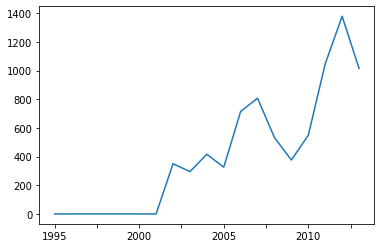

In [111]:
china_e_new.plot()

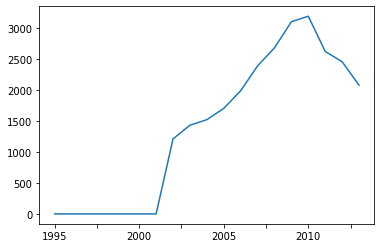

In [112]:
china_i_new.plot()

------------------------

# 4. Data Modeling - Insights<a id="4"></a>

## 4.1 Comparison Selected Groups of Countries<a id="4.1"></a>

### Denmark, Norway, Finland

In [113]:
df_DNS_e = df_sweden_emigrants.loc[['Denmark','Norway','Finland'], years[18:]].transpose()
df_DNS_e.head()

Country  Denmark  Norway  Finland
1998      1199.0  1779.0   2870.0
1999       973.0  1524.0   2710.0
2000      1055.0  1577.0   2673.0
2001      1171.0  1509.0   2996.0
2002      1347.0  1629.0   2771.0

In [114]:
df_DNS_i = df_sweden_immigrants.loc[['Denmark','Norway','Finland'], years[18:]].transpose()
df_DNS_i.head()

Country  Denmark  Norway  Finland
1998      1117.0  1638.0   2999.0
1999      1292.0  2007.0   3380.0
2000      1990.0  2889.0   3579.0
2001      2534.0  3033.0   3445.0
2002      3203.0  3459.0   3293.0

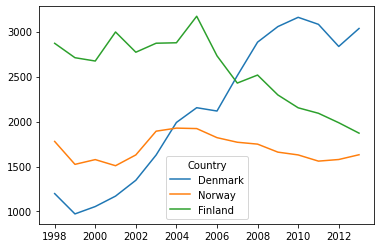

In [115]:
df_DNS_e.plot()

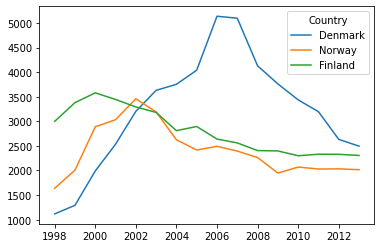

In [116]:
df_DNS_i.plot()

---------------------

### France, Germany, UK, Spain, Italy

In [117]:
df_FGUK_e = df_sweden_emigrants.loc[['France','Germany','United Kingdom of Great Britain and Northern Ireland','Spain','Italy'], years[11:]].transpose()
df_FGUK_e.head()

Country  France  Germany  \
1991        0.0      0.0   
1992        0.0      0.0   
1993        0.0      0.0   
1994        0.0      0.0   
1995        0.0      0.0   

Country  United Kingdom of Great Britain and Northern Ireland  Spain  Italy  
1991                                                   0.0       0.0    0.0  
1992                                                   0.0       0.0    0.0  
1993                                                   0.0       0.0    0.0  
1994                                                   0.0       0.0    0.0  
1995                                                   0.0       0.0    0.0

In [118]:
df_FGUK_i = df_sweden_immigrants.loc[['France','Germany','United Kingdom of Great Britain and Northern Ireland','Spain','Italy'], years[11:]].transpose()
df_FGUK_i.head()

Country  France  Germany  \
1991        0.0      0.0   
1992        0.0      0.0   
1993        0.0      0.0   
1994        0.0      0.0   
1995        0.0      0.0   

Country  United Kingdom of Great Britain and Northern Ireland  Spain  Italy  
1991                                                   0.0       0.0    0.0  
1992                                                   0.0       0.0    0.0  
1993                                                   0.0       0.0    0.0  
1994                                                   0.0       0.0    0.0  
1995                                                   0.0       0.0    0.0

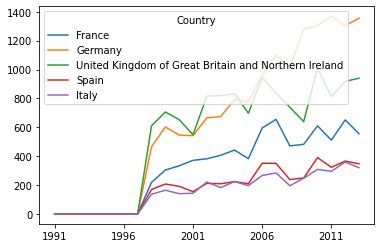

In [119]:
df_FGUK_e.plot()

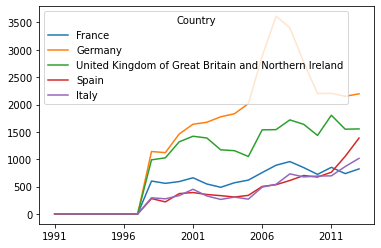

In [120]:
df_FGUK_i.plot()

---------------------

### Morocco, Algeria, Tunisia, Libya

In [121]:
df_north_africa_e = df_sweden_emigrants.loc[['Morocco','Algeria','Tunisia','Libya','Egypt'], years[11:]].transpose()
df_north_africa_e.head()

Country  Morocco  Algeria  Tunisia  Libya  Egypt
1991         0.0      0.0      0.0    0.0    0.0
1992         0.0      0.0      0.0    0.0    0.0
1993         0.0      0.0      0.0    0.0    0.0
1994         0.0      0.0      0.0    0.0    0.0
1995         0.0      0.0      0.0    0.0    0.0

In [122]:
df_north_africa_i = df_sweden_immigrants.loc[['Morocco','Algeria','Tunisia','Libya','Egypt'], years[11:]].transpose()
df_north_africa_i.head()

Country  Morocco  Algeria  Tunisia  Libya  Egypt
1991         0.0      0.0      0.0    0.0    0.0
1992         0.0      0.0      0.0    0.0    0.0
1993         0.0      0.0      0.0    0.0    0.0
1994         0.0      0.0      0.0    0.0    0.0
1995         0.0      0.0      0.0    0.0    0.0

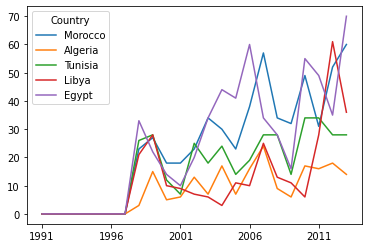

In [123]:
df_north_africa_e.plot()

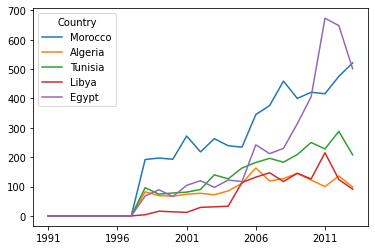

In [124]:
df_north_africa_i.plot()

----------------------

### Belgium, Nederlands, Portugal, Ireland

In [125]:
df_BNPI_e = df_sweden_emigrants.loc[['Belgium','Netherlands','Portugal','Ireland'], years[18:]].transpose()
df_BNPI_e.head()

Country  Belgium  Netherlands  Portugal  Ireland
1998        41.0        179.0      57.0     64.0
1999        57.0        189.0      58.0     81.0
2000        71.0        173.0      35.0     79.0
2001        70.0        238.0      27.0     73.0
2002        76.0        264.0      50.0     95.0

In [126]:
df_BNPI_i = df_sweden_immigrants.loc[['Belgium','Netherlands','Portugal','Ireland'], years[18:]].transpose()
df_BNPI_i.head()

Country  Belgium  Netherlands  Portugal  Ireland
1998        93.0        347.0      63.0    134.0
1999        92.0        384.0      62.0    111.0
2000        90.0        427.0      69.0    165.0
2001       144.0        505.0      76.0    162.0
2002        97.0        478.0      85.0    199.0

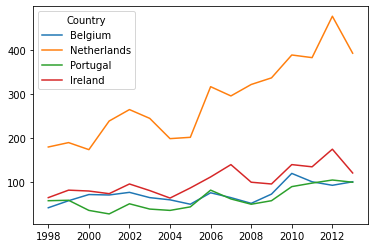

In [127]:
df_BNPI_e.plot()

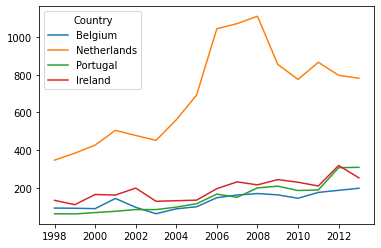

In [128]:
df_BNPI_i.plot()

----------------------

### China, India, Pakistan, Bangladesh

In [129]:
df_CIPB_e = df_sweden_emigrants.loc[['China (including Hong Kong Special Administrative Region)','India','Pakistan','Bangladesh'], years[15:]].transpose()
df_CIPB_e.head()

Country  China (including Hong Kong Special Administrative Region)  India  \
1995                                                   0.0            0.0   
1996                                                   0.0            0.0   
1997                                                   0.0            0.0   
1998                                                   0.0           40.0   
1999                                                   0.0           62.0   

Country  Pakistan  Bangladesh  
1995          0.0         0.0  
1996          0.0         0.0  
1997          0.0         0.0  
1998         20.0        10.0  
1999         15.0        23.0

In [130]:
df_CIPB_i = df_sweden_immigrants.loc[['China','India','Pakistan','Bangladesh'], years[15:]].transpose()
df_CIPB_i.head()

Country  China  India  Pakistan  Bangladesh
1995       0.0    0.0       0.0         0.0
1996       0.0    0.0       0.0         0.0
1997       0.0    0.0       0.0         0.0
1998       0.0  309.0     125.0       137.0
1999       0.0  322.0     129.0       109.0

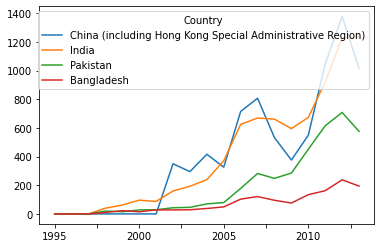

In [131]:
df_CIPB_e.plot()

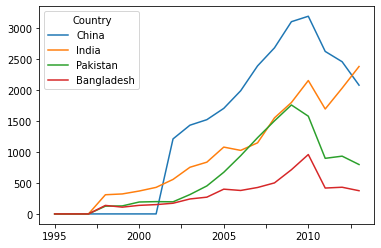

In [132]:
df_CIPB_i.plot()

----------------------

### USA, Canada, Australia

In [133]:
df_north_america_e = df_sweden_emigrants.loc[['United States of America','Canada','Australia'], years[11:]].transpose()
df_north_america_e.head()

Country  United States of America  Canada  Australia
1991                          0.0     0.0        0.0
1992                          0.0     0.0        0.0
1993                          0.0     0.0        0.0
1994                          0.0     0.0        0.0
1995                          0.0     0.0        0.0

In [134]:
df_north_america_i = df_sweden_immigrants.loc[['United States of America','Canada','Australia'], years[11:]].transpose()
df_north_america_i.head()

Country  United States of America  Canada  Australia
1991                          0.0     0.0        0.0
1992                          0.0     0.0        0.0
1993                          0.0     0.0        0.0
1994                          0.0     0.0        0.0
1995                          0.0     0.0        0.0

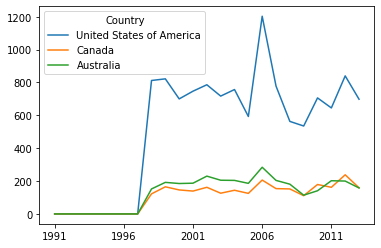

In [135]:
df_north_america_e.plot()

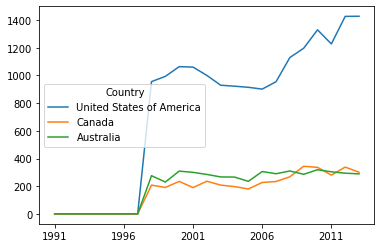

In [136]:
df_north_america_i.plot()

----------------------

### Brasil, Argentina, Chile

In [137]:
df_south_america_e = df_sweden_emigrants.loc[['Brazil','Argentina','Chile'], years[11:]].transpose()
df_south_america_e.head()

Country  Brazil  Argentina  Chile
1991        0.0        0.0    0.0
1992        0.0        0.0    0.0
1993        0.0        0.0    0.0
1994        0.0        0.0    0.0
1995        0.0        0.0    0.0

In [138]:
df_south_america_i = df_sweden_immigrants.loc[['Brazil','Argentina','Chile'], years[11:]].transpose()
df_south_america_i.head()

Country  Brazil  Argentina  Chile
1991        0.0        0.0    0.0
1992        0.0        0.0    0.0
1993        0.0        0.0    0.0
1994        0.0        0.0    0.0
1995        0.0        0.0    0.0

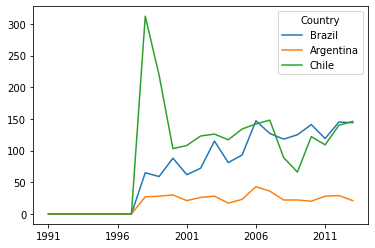

In [139]:
df_south_america_e.plot()

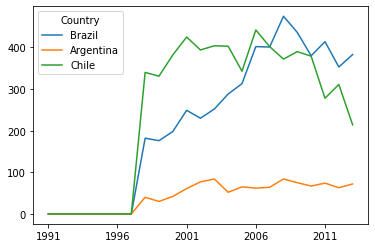

In [140]:
df_south_america_i.plot()

----------------------

### Mexico, Colombia, Venezuela

In [141]:
df_central_america_e = df_sweden_emigrants.loc[['Mexico','Colombia','Venezuela (Bolivarian Republic of)','Chile'], years[11:]].transpose()
df_central_america_e.head()

Country  Mexico  Colombia  Venezuela (Bolivarian Republic of)  Chile
1991        0.0       0.0                                 0.0    0.0
1992        0.0       0.0                                 0.0    0.0
1993        0.0       0.0                                 0.0    0.0
1994        0.0       0.0                                 0.0    0.0
1995        0.0       0.0                                 0.0    0.0

In [142]:
df_central_america_i = df_sweden_immigrants.loc[['Mexico','Colombia','Venezuela (Bolivarian Republic of)','Chile'], years[11:]].transpose()
df_central_america_i.head()

Country  Mexico  Colombia  Venezuela (Bolivarian Republic of)  Chile
1991        0.0       0.0                                 0.0    0.0
1992        0.0       0.0                                 0.0    0.0
1993        0.0       0.0                                 0.0    0.0
1994        0.0       0.0                                 0.0    0.0
1995        0.0       0.0                                 0.0    0.0

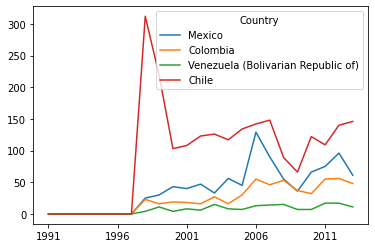

In [143]:
df_central_america_e.plot()

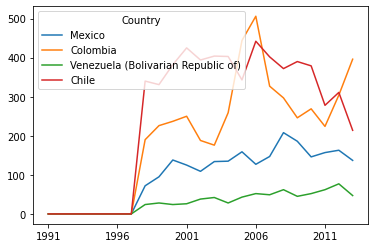

In [144]:
df_central_america_i.plot()

----------------------

### Syria, Lebanon, Israel, Jordan

In [145]:
df_middle_east_e = df_sweden_emigrants.loc[['Syrian Arab Republic','Lebanon','Israel','Jordan'], years[18:]].transpose()
df_middle_east_e.head()

Country  Syrian Arab Republic  Lebanon  Israel  Jordan
1998                     15.0     79.0    36.0    15.0
1999                     16.0     85.0    51.0     7.0
2000                     12.0     48.0    21.0     8.0
2001                     11.0     32.0    29.0    14.0
2002                     22.0     56.0    35.0     8.0

In [146]:
df_middle_east_i = df_sweden_immigrants.loc[['Syrian Arab Republic','Lebanon','Israel','Jordan'], years[18:]].transpose()
df_middle_east_i.head()

Country  Syrian Arab Republic  Lebanon  Israel  Jordan
1998                    386.0    277.0    72.0    66.0
1999                    421.0    248.0    46.0    56.0
2000                    333.0    234.0    55.0    54.0
2001                    398.0    259.0    78.0    92.0
2002                    474.0    256.0    86.0    75.0

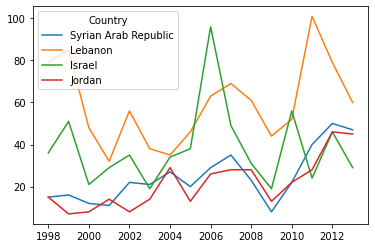

In [147]:
df_middle_east_e.plot()

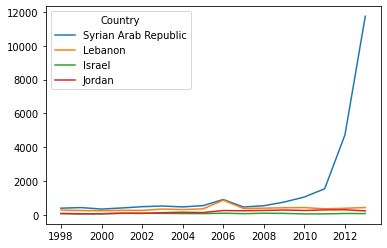

In [148]:
df_middle_east_i.plot()

----------------------

### Romania, Ukraine, Poland

In [149]:
df_east_europe_e = df_sweden_emigrants.loc[['Romania','Ukraine', 'Poland'], years[15:]].transpose()
df_east_europe_e.head()

Country  Romania  Ukraine  Poland
1995         0.0      0.0     0.0
1996         0.0      0.0     0.0
1997         0.0      0.0     0.0
1998        50.0      9.0   180.0
1999        38.0     13.0   164.0

In [150]:
df_east_europe_i = df_sweden_immigrants.loc[['Romania','Ukraine', 'Poland'], years[15:]].transpose()
df_east_europe_i.head()

Country  Romania  Ukraine  Poland
1995         0.0      0.0     0.0
1996         0.0      0.0     0.0
1997         0.0      0.0     0.0
1998       286.0    150.0   613.0
1999       246.0    202.0   673.0

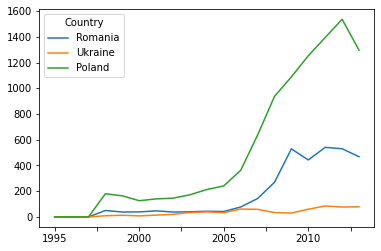

In [151]:
df_east_europe_e.plot()

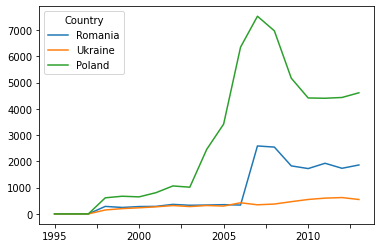

In [152]:
df_east_europe_i.plot()

--------------------

## 4.2 Total Emigration and Immigration<a id="4.2"></a>

### 4.2.1 Top 5 Countries - Sorted by Total<a id="4.2.1"></a>

In [153]:
df_sweden_emigrants.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top5_e = df_sweden_emigrants.head(8)
df_top5_e

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Continent  \
Country                                                                
Total                                                          World   
Sweden                                                        Europe   
Finland                                                       Europe   
Denmark                                                       Europe   
Norway                                                        Europe   
Germany                                                       Europe   
United Kingdom of Great Britain and Northern Ir...            Europe   
United States of America                            Northern America   

                                                              Region  \
Country                                                                
Total                                                          World   
Sweden                                               Northern Europe   
Finland                                              Northern Europe   
Denmark                                              Northern Europe   
Norway                                               Northern Europe   
Germany                                               Western Europe   
United Kingdom of Great Britain and Northern Ir...   Northern Europe   
United States of America                            Northern America   

                                                          Development  1980  \
Country                                                                       
Total                                                           World   0.0   
Sweden                                              Developed regions   0.0   
Finland                                             Developed regions   0.0   
Denmark                                             Developed regions   0.0   
Norway                                              Developed regions   0.0   
Germany                                             Developed regions   0.0   
United Kingdom of Great Britain and Northern Ir...  Developed regions   0.0   
United States of America                            Developed regions   0.0   

                                                    1981  1982  1983  1984  \
Country                                                                      
Total                                                0.0   0.0   0.0   0.0   
Sweden                                               0.0   0.0   0.0   0.0   
Finland                                              0.0   0.0   0.0   0.0   
Denmark                                              0.0   0.0   0.0   0.0   
Norway                                               0.0   0.0   0.0   0.0   
Germany                                              0.0   0.0   0.0   0.0   
United Kingdom of Great Britain and Northern Ir...   0.0   0.0   0.0   0.0   
United States of America                             0.0   0.0   0.0   0.0   

                                                    1985  1986  ...     2005  \
Country                                                         ...            
Total                                                0.0   0.0  ...  38118.0   
Sweden                                               0.0   0.0  ...  22266.0   
Finland                                              0.0   0.0  ...   3171.0   
Denmark                                              0.0   0.0  ...   2154.0   
Norway                                               0.0   0.0  ...   1922.0   
Germany                                              0.0   0.0  ...    777.0   
United Kingdom of Great Britain and Northern Ir...   0.0   0.0  ...    697.0   
United States of America                             0.0   0.0  ...    593.0   

                                                       2006     2007     2008  \
Country                                                                         
Total                                               44908.0  45418.0  45294.0   
S

In [154]:
df_top5_e.drop(['Total','Sweden'], axis=0, inplace=True)
df_top5_e

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Continent  \
Country                                                                
Finland                                                       Europe   
Denmark                                                       Europe   
Norway                                                        Europe   
Germany                                                       Europe   
United Kingdom of Great Britain and Northern Ir...            Europe   
United States of America                            Northern America   

                                                              Region  \
Country                                                                
Finland                                              Northern Europe   
Denmark                                              Northern Europe   
Norway                                               Northern Europe   
Germany                                               Western Europe   
United Kingdom of Great Britain and Northern Ir...   Northern Europe   
United States of America                            Northern America   

                                                          Development  1980  \
Country                                                                       
Finland                                             Developed regions   0.0   
Denmark                                             Developed regions   0.0   
Norway                                              Developed regions   0.0   
Germany                                             Developed regions   0.0   
United Kingdom of Great Britain and Northern Ir...  Developed regions   0.0   
United States of America                            Developed regions   0.0   

                                                    1981  1982  1983  1984  \
Country                                                                      
Finland                                              0.0   0.0   0.0   0.0   
Denmark                                              0.0   0.0   0.0   0.0   
Norway                                               0.0   0.0   0.0   0.0   
Germany                                              0.0   0.0   0.0   0.0   
United Kingdom of Great Britain and Northern Ir...   0.0   0.0   0.0   0.0   
United States of America                             0.0   0.0   0.0   0.0   

                                                    1985  1986  ...    2005  \
Country                                                         ...           
Finland                                              0.0   0.0  ...  3171.0   
Denmark                                              0.0   0.0  ...  2154.0   
Norway                                               0.0   0.0  ...  1922.0   
Germany                                              0.0   0.0  ...   777.0   
United Kingdom of Great Britain and Northern Ir...   0.0   0.0  ...   697.0   
United States of America                             0.0   0.0  ...   593.0   

                                                      2006    2007    2008  \
Country                                                                      
Finland                                             2731.0  2428.0  2517.0   
Denmark                                             2117.0  2510.0  2883.0   
Norway                                              1821.0  1770.0  1749.0   
Germany                                              961.0  1099.0  1014.0   
United Kingdom of Great Britain and Northern Ir...   946.0   837.0   739.0   
United States of America                            1203.0   778.0   563.0   

                                                      2009    2010    2011  \
Country                                                                      
Finland                                             2296.0  2153.0  2092.0   
Denmark                                             3056.0  3159.0  3081.0   
Norway                                              1660.0  1629.0  1560.0   

In [155]:
df_sweden_immigrants.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top5_i = df_sweden_immigrants.head(6)
df_top5_i

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Continent           Region         Development  1980  1981  1982  \
Country                                                                    
Sweden     Europe  Northern Europe   Developed regions   0.0   0.0   0.0   
Iraq         Asia     Western Asia  Developing regions   0.0   0.0   0.0   
Poland     Europe   Eastern Europe   Developed regions   0.0   0.0   0.0   
Denmark    Europe  Northern Europe   Developed regions   0.0   0.0   0.0   
Somalia    Africa   Eastern Africa  Developing regions   0.0   0.0   0.0   
Finland    Europe  Northern Europe   Developed regions   0.0   0.0   0.0   

         1983  1984  1985  1986  ...     2005     2006     2007     2008  \
Country                          ...                                       
Sweden    0.0   0.0   0.0   0.0  ...  13932.0  15352.0  15949.0  17853.0   
Iraq      0.0   0.0   0.0   0.0  ...   2942.0  10850.0  15200.0  12103.0   
Poland    0.0   0.0   0.0   0.0  ...   3420.0   6347.0   7525.0   6970.0   
Denmark   0.0   0.0   0.0   0.0  ...   4040.0   5137.0   5097.0   4129.0   
Somalia   0.0   0.0   0.0   0.0  ...   1314.0   2974.0   3781.0   4064.0   
Finland   0.0   0.0   0.0   0.0  ...   2895.0   2639.0   2561.0   2405.0   

            2009     2010     2011     2012     2013     Total  
Country                                                         
Sweden   18517.0  19765.0  20615.0  20462.0  20484.0  271332.0  
Iraq      8539.0   4534.0   4469.0   3579.0   2302.0  104131.0  
Poland    5167.0   4414.0   4403.0   4433.0   4611.0   54574.0  
Denmark   3761.0   3437.0   3196.0   2633.0   2495.0   51444.0  
Somalia   6902.0   6819.0   3082.0   4541.0  10966.0   50370.0  
Finland   2398.0   2300.0   2331.0   2329.0   2306.0   44851.0  

[6 rows x 38 columns]

In [156]:
df_top5_i.drop(['Sweden'], axis=0, inplace=True)
df_top5_i

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Continent           Region         Development  1980  1981  1982  \
Country                                                                    
Iraq         Asia     Western Asia  Developing regions   0.0   0.0   0.0   
Poland     Europe   Eastern Europe   Developed regions   0.0   0.0   0.0   
Denmark    Europe  Northern Europe   Developed regions   0.0   0.0   0.0   
Somalia    Africa   Eastern Africa  Developing regions   0.0   0.0   0.0   
Finland    Europe  Northern Europe   Developed regions   0.0   0.0   0.0   

         1983  1984  1985  1986  ...    2005     2006     2007     2008  \
Country                          ...                                      
Iraq      0.0   0.0   0.0   0.0  ...  2942.0  10850.0  15200.0  12103.0   
Poland    0.0   0.0   0.0   0.0  ...  3420.0   6347.0   7525.0   6970.0   
Denmark   0.0   0.0   0.0   0.0  ...  4040.0   5137.0   5097.0   4129.0   
Somalia   0.0   0.0   0.0   0.0  ...  1314.0   2974.0   3781.0   4064.0   
Finland   0.0   0.0   0.0   0.0  ...  2895.0   2639.0   2561.0   2405.0   

           2009    2010    2011    2012     2013     Total  
Country                                                     
Iraq     8539.0  4534.0  4469.0  3579.0   2302.0  104131.0  
Poland   5167.0  4414.0  4403.0  4433.0   4611.0   54574.0  
Denmark  3761.0  3437.0  3196.0  2633.0   2495.0   51444.0  
Somalia  6902.0  6819.0  3082.0  4541.0  10966.0   50370.0  
Finland  2398.0  2300.0  2331.0  2329.0   2306.0   44851.0  

[5 rows x 38 columns]

In [157]:
df_top5_e = df_top5_e[years].transpose()
df_top5_e.head()

Country  Finland  Denmark  Norway  Germany  \
1980         0.0      0.0     0.0      0.0   
1981         0.0      0.0     0.0      0.0   
1982         0.0      0.0     0.0      0.0   
1983         0.0      0.0     0.0      0.0   
1984         0.0      0.0     0.0      0.0   

Country  United Kingdom of Great Britain and Northern Ireland  \
1980                                                   0.0      
1981                                                   0.0      
1982                                                   0.0      
1983                                                   0.0      
1984                                                   0.0      

Country  United States of America  
1980                          0.0  
1981                          0.0  
1982                          0.0  
1983                          0.0  
1984                          0.0

In [158]:
df_top5_i = df_top5_i[years].transpose()
df_top5_i.head()

Country  Iraq  Poland  Denmark  Somalia  Finland
1980      0.0     0.0      0.0      0.0      0.0
1981      0.0     0.0      0.0      0.0      0.0
1982      0.0     0.0      0.0      0.0      0.0
1983      0.0     0.0      0.0      0.0      0.0
1984      0.0     0.0      0.0      0.0      0.0

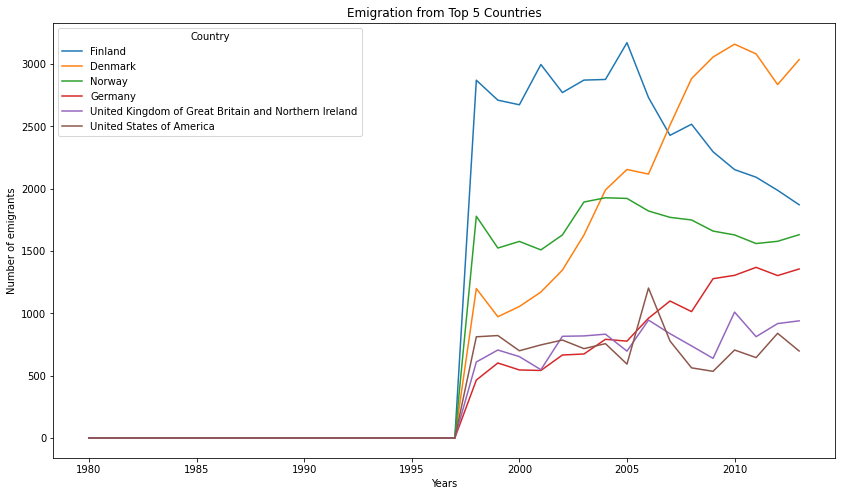

In [159]:
df_top5_e.plot(kind='line', figsize=(14, 8))

plt.title('Emigration from Top 5 Countries')
plt.ylabel('Number of emigrants')
plt.xlabel('Years')

plt.show()

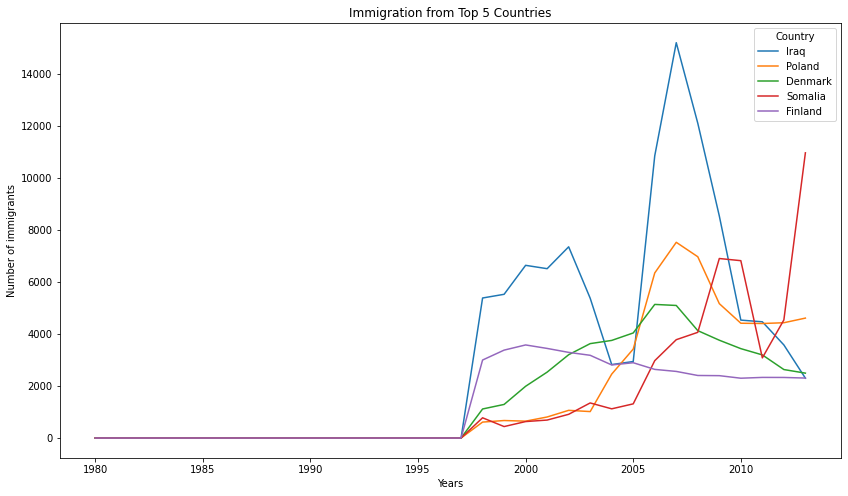

In [160]:
df_top5_i.plot(kind='line', figsize=(14, 8))

plt.title('Immigration from Top 5 Countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

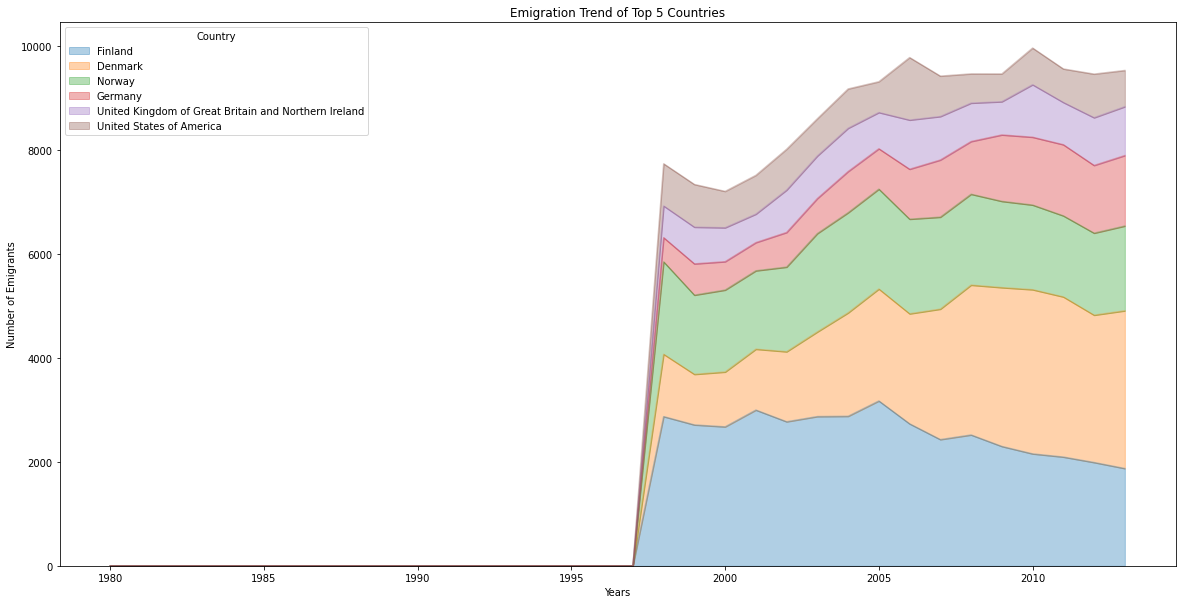

In [161]:
df_top5_e.index = df_top5_e.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5_e.plot(kind='area', 
             stacked=True,
             alpha=0.35,
             figsize=(20, 10),
             )

plt.title('Emigration Trend of Top 5 Countries')
plt.ylabel('Number of Emigrants')
plt.xlabel('Years')

plt.show()

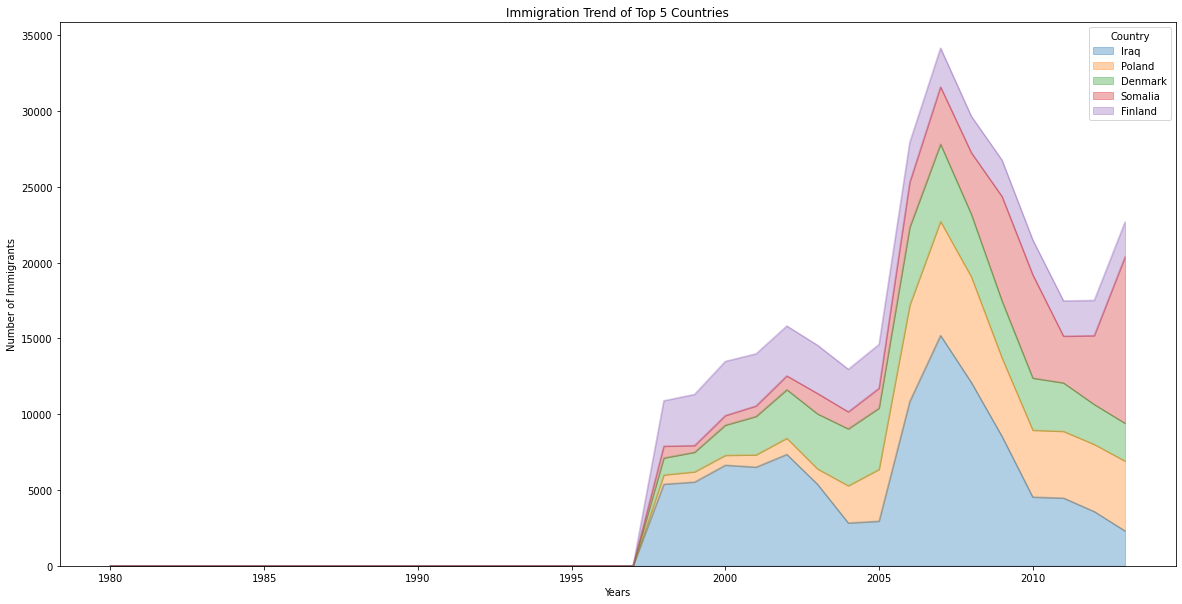

In [162]:
df_top5_i.index = df_top5_i.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5_i.plot(kind='area', 
             stacked=True,
             alpha=0.35,
             figsize=(20, 10),
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

---------------

In [163]:
df_top5_e.drop(['Finland'], axis=1, inplace=True)
df_top5_no_Finland_e = df_top5_e
df_top5_no_Finland_e.head()

Country  Denmark  Norway  Germany  \
1980         0.0     0.0      0.0   
1981         0.0     0.0      0.0   
1982         0.0     0.0      0.0   
1983         0.0     0.0      0.0   
1984         0.0     0.0      0.0   

Country  United Kingdom of Great Britain and Northern Ireland  \
1980                                                   0.0      
1981                                                   0.0      
1982                                                   0.0      
1983                                                   0.0      
1984                                                   0.0      

Country  United States of America  
1980                          0.0  
1981                          0.0  
1982                          0.0  
1983                          0.0  
1984                          0.0

In [164]:
df_top5_i.drop(['Iraq'], axis=1, inplace=True)
df_top5_no_Iraq_i = df_top5_i
df_top5_no_Iraq_i.head()

Country  Poland  Denmark  Somalia  Finland
1980        0.0      0.0      0.0      0.0
1981        0.0      0.0      0.0      0.0
1982        0.0      0.0      0.0      0.0
1983        0.0      0.0      0.0      0.0
1984        0.0      0.0      0.0      0.0

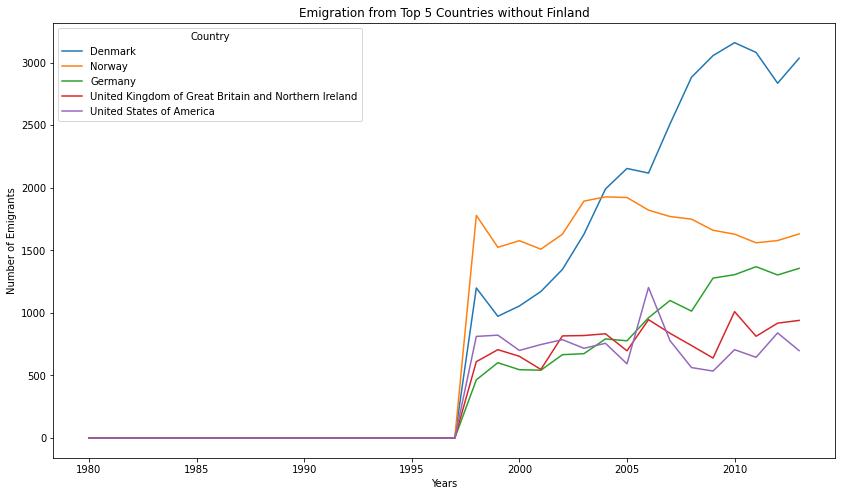

In [165]:
df_top5_no_Finland_e.plot(kind='line', figsize=(14, 8))

plt.title('Emigration from Top 5 Countries without Finland')
plt.ylabel('Number of Emigrants')
plt.xlabel('Years')

plt.show()

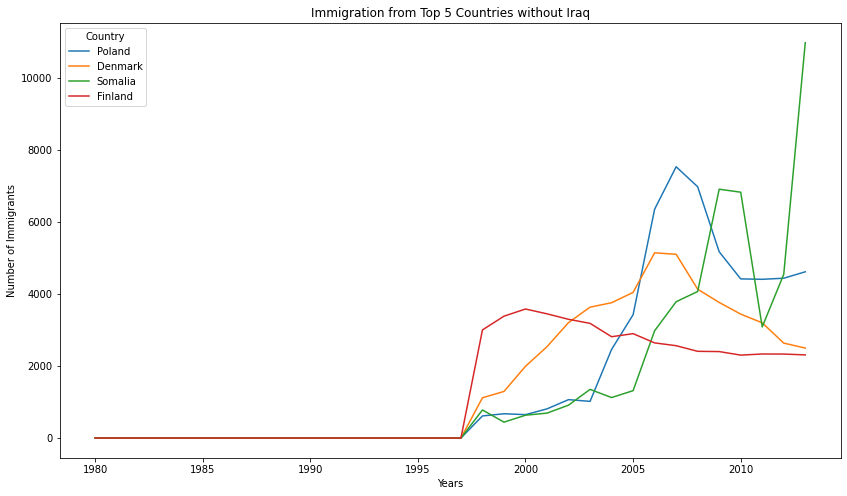

In [166]:
df_top5_no_Iraq_i.plot(kind='line', figsize=(14, 8))

plt.title('Immigration from Top 5 Countries without Iraq')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

---------------------

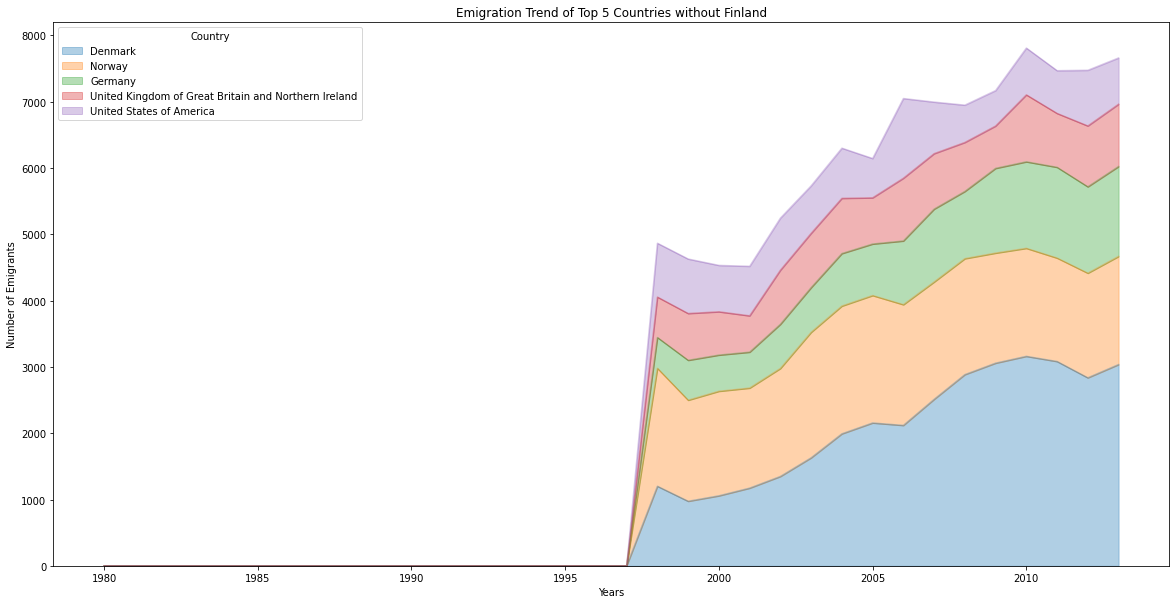

In [167]:
df_top5_no_Finland_e.index = df_top5_no_Finland_e.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5_no_Finland_e.plot(kind='area', 
             stacked=True,
             alpha=0.35,
             figsize=(20, 10),
             )

plt.title('Emigration Trend of Top 5 Countries without Finland')
plt.ylabel('Number of Emigrants')
plt.xlabel('Years')

plt.show()

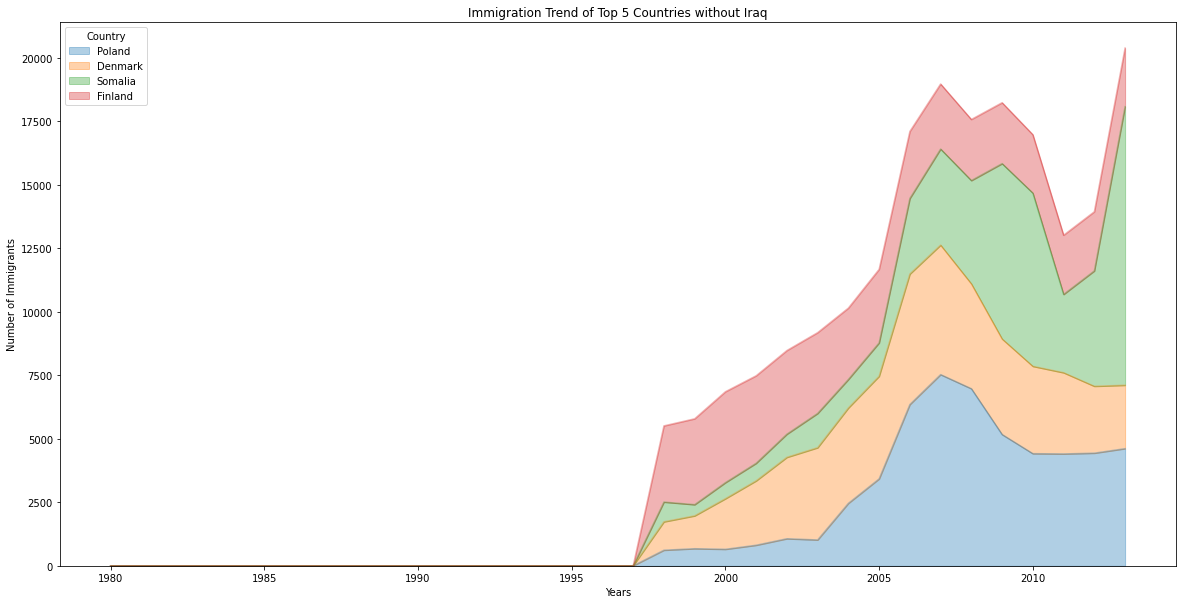

In [168]:
df_top5_no_Iraq_i.index = df_top5_no_Iraq_i.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5_no_Iraq_i.plot(kind='area', 
             stacked=True,
             alpha=0.35,
             figsize=(20, 10),
             )

plt.title('Immigration Trend of Top 5 Countries without Iraq')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

---------------

### 4.2.2 Top 15 Countries - Sorted by Total<a id="4.2.2"></a>

In [169]:
df_top15_e = df_sweden_emigrants.head(18)
df_top15_e

Continent  \
Country                                                                
Total                                                          World   
Sweden                                                        Europe   
Finland                                                       Europe   
Denmark                                                       Europe   
Norway                                                        Europe   
Germany                                                       Europe   
United Kingdom of Great Britain and Northern Ir...            Europe   
United States of America                            Northern America   
Poland                                                        Europe   
India                                                           Asia   
China (including Hong Kong Special Administrati...              Asia   
France                                                        Europe   
Iceland                                                       Europe   
Netherlands                                                   Europe   
Iran (Islamic Republic of)                                      Asia   
Iraq                                                            Asia   
Unknown                                                        World   
Spain                                                         Europe   

                                                              Region  \
Country                                                                
Total                                                          World   
Sweden                                               Northern Europe   
Finland                                              Northern Europe   
Denmark                                              Northern Europe   
Norway                                               Northern Europe   
Germany                                               Western Europe   
United Kingdom of Great Britain and Northern Ir...   Northern Europe   
United States of America                            Northern America   
Poland                                                Eastern Europe   
India                                                  Southern Asia   
China (including Hong Kong Special Administrati...      Eastern Asia   
France                                                Western Europe   
Iceland                                              Northern Europe   
Netherlands                                           Western Europe   
Iran (Islamic Republic of)                             Southern Asia   
Iraq                                                    Western Asia   
Unknown                                                        World   
Spain                                                Southern Europe   

                                                           Development  1980  \
Country                                                                        
Total                                                            World   0.0   
Sweden                                               Developed regions   0.0   
Finland                                              Developed regions   0.0   
Denmark                                              Developed regions   0.0   
Norway                                               Developed regions   0.0   
Germany                                              Developed regions   0.0   
United Kingdom of Great Britain and Northern Ir...   Developed regions   0.0   
United States of America                             Developed regions   0.0   
Poland                                               Developed regions   0.0   
India                                               Developing regions   0.0   
China (including Hong Kong Special Administrati...  Developing regions   0.0   
France                                               Developed regions   0.0   
Iceland                                              Deve

In [170]:
df_top15_e.drop(['Total','Sweden','Unknown'], axis=0, inplace=True)
df_top15_e

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Continent  \
Country                                                                
Finland                                                       Europe   
Denmark                                                       Europe   
Norway                                                        Europe   
Germany                                                       Europe   
United Kingdom of Great Britain and Northern Ir...            Europe   
United States of America                            Northern America   
Poland                                                        Europe   
India                                                           Asia   
China (including Hong Kong Special Administrati...              Asia   
France                                                        Europe   
Iceland                                                       Europe   
Netherlands                                                   Europe   
Iran (Islamic Republic of)                                      Asia   
Iraq                                                            Asia   
Spain                                                         Europe   

                                                              Region  \
Country                                                                
Finland                                              Northern Europe   
Denmark                                              Northern Europe   
Norway                                               Northern Europe   
Germany                                               Western Europe   
United Kingdom of Great Britain and Northern Ir...   Northern Europe   
United States of America                            Northern America   
Poland                                                Eastern Europe   
India                                                  Southern Asia   
China (including Hong Kong Special Administrati...      Eastern Asia   
France                                                Western Europe   
Iceland                                              Northern Europe   
Netherlands                                           Western Europe   
Iran (Islamic Republic of)                             Southern Asia   
Iraq                                                    Western Asia   
Spain                                                Southern Europe   

                                                           Development  1980  \
Country                                                                        
Finland                                              Developed regions   0.0   
Denmark                                              Developed regions   0.0   
Norway                                               Developed regions   0.0   
Germany                                              Developed regions   0.0   
United Kingdom of Great Britain and Northern Ir...   Developed regions   0.0   
United States of America                             Developed regions   0.0   
Poland                                               Developed regions   0.0   
India                                               Developing regions   0.0   
China (including Hong Kong Special Administrati...  Developing regions   0.0   
France                                               Developed regions   0.0   
Iceland                                              Developed regions   0.0   
Netherlands                                          Developed regions   0.0   
Iran (Islamic Republic of)                          Developing regions   0.0   
Iraq                                                Developing regions   0.0   
Spain                                                Developed regions   0.0   

                                                    1981  1982  1983  1984  \
Country                                                                      
Finland                                              0.0   0.0   0.0   0.0   
Denmark       

---------------------

In [171]:
df_top15_i = df_sweden_immigrants.head(16)
df_top15_i

Continent  \
Country                                                        
Sweden                                                Europe   
Iraq                                                    Asia   
Poland                                                Europe   
Denmark                                               Europe   
Somalia                                               Africa   
Finland                                               Europe   
Norway                                                Europe   
Germany                                               Europe   
Thailand                                                Asia   
Iran (Islamic Republic of)                              Asia   
China                                                   Asia   
Afghanistan                                             Asia   
Syrian Arab Republic                                    Asia   
United Kingdom of Great Britain and Northern Ir...    Europe   
Turkey                                                  Asia   
India                                                   Asia   

                                                                Region  \
Country                                                                  
Sweden                                                 Northern Europe   
Iraq                                                      Western Asia   
Poland                                                  Eastern Europe   
Denmark                                                Northern Europe   
Somalia                                                 Eastern Africa   
Finland                                                Northern Europe   
Norway                                                 Northern Europe   
Germany                                                 Western Europe   
Thailand                                            South-Eastern Asia   
Iran (Islamic Republic of)                               Southern Asia   
China                                                     Eastern Asia   
Afghanistan                                              Southern Asia   
Syrian Arab Republic                                      Western Asia   
United Kingdom of Great Britain and Northern Ir...     Northern Europe   
Turkey                                                    Western Asia   
India                                                    Southern Asia   

                                                           Development  1980  \
Country                                                                        
Sweden                                               Developed regions   0.0   
Iraq                                                Developing regions   0.0   
Poland                                               Developed regions   0.0   
Denmark                                              Developed regions   0.0   
Somalia                                             Developing regions   0.0   
Finland                                              Developed regions   0.0   
Norway                                               Developed regions   0.0   
Germany                                              Developed regions   0.0   
Thailand                                            Developing regions   0.0   
Iran (Islamic Republic of)                          Developing regions   0.0   
China                                               Developing regions   0.0   
Afghanistan                                         Developing regions   0.0   
Syrian Arab Republic                                Developing regions   0.0   
United Kingdom of Great Britain and Northern Ir...   Developed regions   0.0   
Turkey                                              Developing regions   0.0   
India                                               Developing regions   0.0   

                                                    1981  1982  1983  1984  \
Country                                       

In [172]:
df_top15_i.drop(['Sweden'], axis=0, inplace=True)
df_top15_i

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Continent  \
Country                                                        
Iraq                                                    Asia   
Poland                                                Europe   
Denmark                                               Europe   
Somalia                                               Africa   
Finland                                               Europe   
Norway                                                Europe   
Germany                                               Europe   
Thailand                                                Asia   
Iran (Islamic Republic of)                              Asia   
China                                                   Asia   
Afghanistan                                             Asia   
Syrian Arab Republic                                    Asia   
United Kingdom of Great Britain and Northern Ir...    Europe   
Turkey                                                  Asia   
India                                                   Asia   

                                                                Region  \
Country                                                                  
Iraq                                                      Western Asia   
Poland                                                  Eastern Europe   
Denmark                                                Northern Europe   
Somalia                                                 Eastern Africa   
Finland                                                Northern Europe   
Norway                                                 Northern Europe   
Germany                                                 Western Europe   
Thailand                                            South-Eastern Asia   
Iran (Islamic Republic of)                               Southern Asia   
China                                                     Eastern Asia   
Afghanistan                                              Southern Asia   
Syrian Arab Republic                                      Western Asia   
United Kingdom of Great Britain and Northern Ir...     Northern Europe   
Turkey                                                    Western Asia   
India                                                    Southern Asia   

                                                           Development  1980  \
Country                                                                        
Iraq                                                Developing regions   0.0   
Poland                                               Developed regions   0.0   
Denmark                                              Developed regions   0.0   
Somalia                                             Developing regions   0.0   
Finland                                              Developed regions   0.0   
Norway                                               Developed regions   0.0   
Germany                                              Developed regions   0.0   
Thailand                                            Developing regions   0.0   
Iran (Islamic Republic of)                          Developing regions   0.0   
China                                               Developing regions   0.0   
Afghanistan                                         Developing regions   0.0   
Syrian Arab Republic                                Developing regions   0.0   
United Kingdom of Great Britain and Northern Ir...   Developed regions   0.0   
Turkey                                              Developing regions   0.0   
India                                               Developing regions   0.0   

                                                    1981  1982  1983  1984  \
Country                                                                      
Iraq                                                 0.0   0.0   0.0   0.0   
Poland                                               0.0   0.0   0.0   0.0   
Denmark                       

-----------------

In [173]:
df_top15_e = df_top15_e[years].transpose()
df_top15_e.head()

Country  Finland  Denmark  Norway  Germany  \
1980         0.0      0.0     0.0      0.0   
1981         0.0      0.0     0.0      0.0   
1982         0.0      0.0     0.0      0.0   
1983         0.0      0.0     0.0      0.0   
1984         0.0      0.0     0.0      0.0   

Country  United Kingdom of Great Britain and Northern Ireland  \
1980                                                   0.0      
1981                                                   0.0      
1982                                                   0.0      
1983                                                   0.0      
1984                                                   0.0      

Country  United States of America  Poland  India  \
1980                          0.0     0.0    0.0   
1981                          0.0     0.0    0.0   
1982                          0.0     0.0    0.0   
1983                          0.0     0.0    0.0   
1984                          0.0     0.0    0.0   

Country  China (including Hong Kong Special Administrative Region)  France  \
1980                                                   0.0             0.0   
1981                                                   0.0             0.0   
1982                                                   0.0             0.0   
1983                                                   0.0             0.0   
1984                                                   0.0             0.0   

Country  Iceland  Netherlands  Iran (Islamic Republic of)  Iraq  Spain  
1980         0.0          0.0                         0.0   0.0    0.0  
1981         0.0          0.0                         0.0   0.0    0.0  
1982         0.0          0.0                         0.0   0.0    0.0  
1983         0.0          0.0                         0.0   0.0    0.0  
1984         0.0          0.0                         0.0   0.0    0.0

In [174]:
df_top15_i = df_top15_i[years].transpose()
df_top15_i.head()

Country  Iraq  Poland  Denmark  Somalia  Finland  Norway  Germany  Thailand  \
1980      0.0     0.0      0.0      0.0      0.0     0.0      0.0       0.0   
1981      0.0     0.0      0.0      0.0      0.0     0.0      0.0       0.0   
1982      0.0     0.0      0.0      0.0      0.0     0.0      0.0       0.0   
1983      0.0     0.0      0.0      0.0      0.0     0.0      0.0       0.0   
1984      0.0     0.0      0.0      0.0      0.0     0.0      0.0       0.0   

Country  Iran (Islamic Republic of)  China  Afghanistan  Syrian Arab Republic  \
1980                            0.0    0.0          0.0                   0.0   
1981                            0.0    0.0          0.0                   0.0   
1982                            0.0    0.0          0.0                   0.0   
1983                            0.0    0.0          0.0                   0.0   
1984                            0.0    0.0          0.0                   0.0   

Country  United Kingdom of Great Britain and Northern Ireland  Turkey  India  
1980                                                   0.0        0.0    0.0  
1981                                                   0.0        0.0    0.0  
1982                                                   0.0        0.0    0.0  
1983                                                   0.0        0.0    0.0  
1984                                                   0.0        0.0    0.0

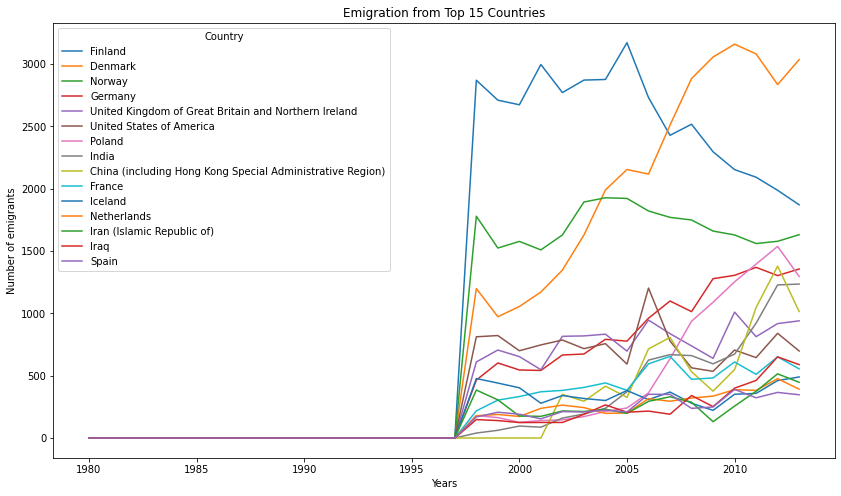

In [175]:
df_top15_e.plot(kind='line', figsize=(14, 8))

plt.title('Emigration from Top 15 Countries')
plt.ylabel('Number of emigrants')
plt.xlabel('Years')

plt.show()

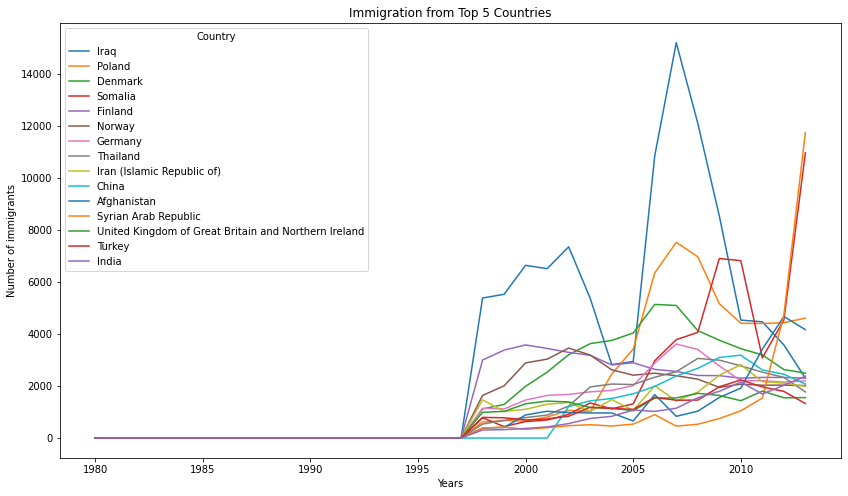

In [176]:
df_top15_i.plot(kind='line', figsize=(14, 8))

plt.title('Immigration from Top 5 Countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

----------------

In [177]:
# df_top15_no_romania_e = df_sweden_emigrants.head(18)
# df_top15_no_romania_e

In [178]:
# df_top15_no_romania_e.drop(['Total','Sweden','Romania','Unknown'], axis=0, inplace=True)
# df_top15_no_romania_e

-----------------

In [179]:
# df_top15_no_romania_i = df_sweden_immigrants.head(16)
# df_top15_no_romania_i

In [180]:
# df_top15_no_romania_i.drop(['Sweden','Romania'], axis=0, inplace=True)
# df_top15_no_romania_i

In [181]:
# df_top15_no_romania_e = df_top15_no_romania_e[years].transpose()
# df_top15_no_romania_e.head()

In [182]:
# df_top15_no_romania_i = df_top15_no_romania_i[years].transpose()
# df_top15_no_romania_i.head()

In [183]:
# df_top15_no_romania_e.plot(kind='line', figsize=(14, 8))

# plt.title('Emigration from Top 15 Countries without Romania')
# plt.ylabel('Number of Emigrants')
# plt.xlabel('Years')

# plt.show()

In [184]:
# df_top15_no_romania_i.plot(kind='line', figsize=(14, 8))

# plt.title('Immigration from Top 5 Countries without Romania')
# plt.ylabel('Number of immigrants')
# plt.xlabel('Years')

# plt.show()

----------------

In [185]:
df_top15_e = df_sweden_emigrants.head(18)
df_top15_e.drop(['Total','Sweden','Unknown'], axis=0, inplace=True)
df_top15_e.rename(index={'United Kingdom of Great Britain and Northern Ireland':'UK','China (including Hong Kong Special Administrative Region)':'China','United States of America':'USA','Republic of Moldova':'Moldova'}, inplace=True)
df_top15_e

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Continent            Region  \
Country                                                          
Finland                               Europe   Northern Europe   
Denmark                               Europe   Northern Europe   
Norway                                Europe   Northern Europe   
Germany                               Europe    Western Europe   
UK                                    Europe   Northern Europe   
USA                         Northern America  Northern America   
Poland                                Europe    Eastern Europe   
India                                   Asia     Southern Asia   
China                                   Asia      Eastern Asia   
France                                Europe    Western Europe   
Iceland                               Europe   Northern Europe   
Netherlands                           Europe    Western Europe   
Iran (Islamic Republic of)              Asia     Southern Asia   
Iraq                                    Asia      Western Asia   
Spain                                 Europe   Southern Europe   

                                   Development  1980  1981  1982  1983  1984  \
Country                                                                        
Finland                      Developed regions   0.0   0.0   0.0   0.0   0.0   
Denmark                      Developed regions   0.0   0.0   0.0   0.0   0.0   
Norway                       Developed regions   0.0   0.0   0.0   0.0   0.0   
Germany                      Developed regions   0.0   0.0   0.0   0.0   0.0   
UK                           Developed regions   0.0   0.0   0.0   0.0   0.0   
USA                          Developed regions   0.0   0.0   0.0   0.0   0.0   
Poland                       Developed regions   0.0   0.0   0.0   0.0   0.0   
India                       Developing regions   0.0   0.0   0.0   0.0   0.0   
China                       Developing regions   0.0   0.0   0.0   0.0   0.0   
France                       Developed regions   0.0   0.0   0.0   0.0   0.0   
Iceland                      Developed regions   0.0   0.0   0.0   0.0   0.0   
Netherlands                  Developed regions   0.0   0.0   0.0   0.0   0.0   
Iran (Islamic Republic of)  Developing regions   0.0   0.0   0.0   0.0   0.0   
Iraq                        Developing regions   0.0   0.0   0.0   0.0   0.0   
Spain                        Developed regions   0.0   0.0   0.0   0.0   0.0   

                            1985  1986  ...    2005    2006    2007    2008  \
Country                                 ...                                   
Finland                      0.0   0.0  ...  3171.0  2731.0  2428.0  2517.0   
Denmark                      0.0   0.0  ...  2154.0  2117.0  2510.0  2883.0   
Norway                       0.0   0.0  ...  1922.0  1821.0  1770.0  1749.0   
Germany                      0.0   0.0  ...   777.0   961.0  1099.0  1014.0   
UK                           0.0   0.0  ...   697.0   946.0   837.0   739.0   
USA                          0.0   0.0  ...   593.0  1203.0   778.0   563.0   
Poland                       0.0   0.0  ...   241.0   362.0   636.0   937.0   
India                        0.0   0.0  ...   371.0   625.0   669.0   661.0   
China                        0.0   0.0  ...   326.0   715.0   807.0   532.0   
France                       0.0   0.0  ...   383.0   595.0   655.0   471.0   
Iceland                      0.0   0.0  ...   381.0   308.0   369.0   279.0   
Netherlands                  0.0   0.0  ...   201.0   316.0   295.0   321.0   
Iran (Islamic Republic of)   0.0   0.0  ...   198.0   294.0   331.0   287.0   
Iraq                         0.0   0.0  ...   207.0   216.0   191.0   341.0   
Spain                        0.0   0.0  ...   209.0   351.0   350.0   238.0   

                              2009    2010    2011    2012    2013    Total  
Country                                                                      
Finland                     2296.0  2153.0  2092.0 

In [186]:
df_top15_e.shape

(15, 38)

In [187]:
df_top15_e.sort_values(by='Total', ascending=True, inplace=True)
df_top15_e_total = df_top15_e['Total']
df_top15_e_total

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Country
Spain                          4189.0
Iraq                           4427.0
Iran (Islamic Republic of)     4536.0
Netherlands                    4592.0
Iceland                        5778.0
France                         7369.0
China                          7807.0
India                          7855.0
Poland                         9887.0
USA                           11902.0
UK                            12524.0
Germany                       14749.0
Norway                        27158.0
Denmark                       34193.0
Finland                       41013.0
Name: Total, dtype: float64

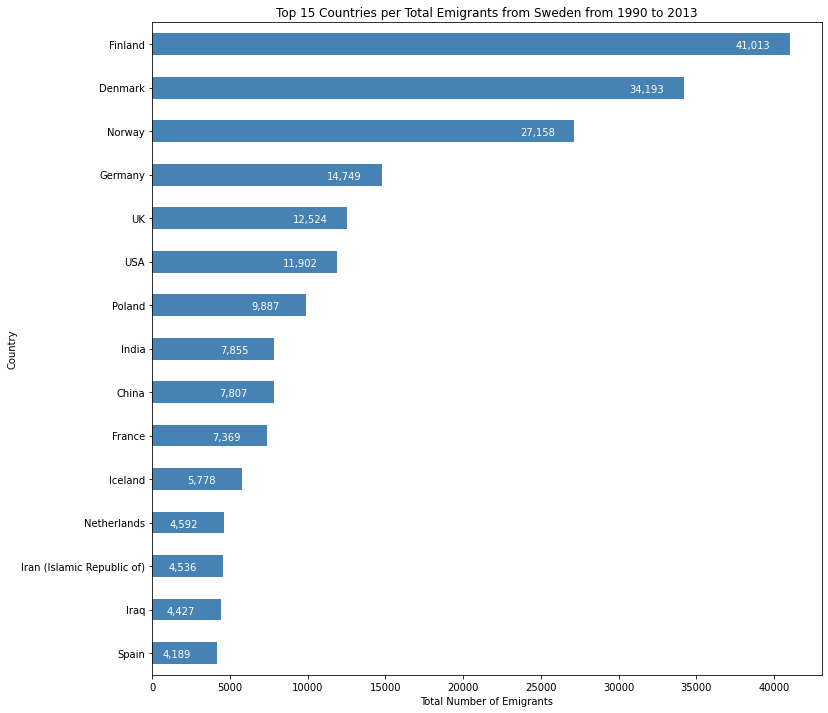

In [188]:
df_top15_e_total.plot(kind='barh', figsize=(12, 12), color='steelblue')

plt.xlabel('Total Number of Emigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Emigrants from Sweden from 1990 to 2013') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_e_total): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 3500, index - 0.10), color='white')


plt.show()

-------------

In [189]:
df_top15_i = df_sweden_immigrants.head(16)
df_top15_i.drop(['Sweden'], axis=0, inplace=True)
df_top15_i.rename(index={'United Kingdom of Great Britain and Northern Ireland':'UK','China (including Hong Kong Special Administrative Region)':'China','United States of America':'USA','Republic of Moldova':'Moldova'}, inplace=True)
df_top15_i

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Continent              Region         Development  \
Country                                                                        
Iraq                            Asia        Western Asia  Developing regions   
Poland                        Europe      Eastern Europe   Developed regions   
Denmark                       Europe     Northern Europe   Developed regions   
Somalia                       Africa      Eastern Africa  Developing regions   
Finland                       Europe     Northern Europe   Developed regions   
Norway                        Europe     Northern Europe   Developed regions   
Germany                       Europe      Western Europe   Developed regions   
Thailand                        Asia  South-Eastern Asia  Developing regions   
Iran (Islamic Republic of)      Asia       Southern Asia  Developing regions   
China                           Asia        Eastern Asia  Developing regions   
Afghanistan                     Asia       Southern Asia  Developing regions   
Syrian Arab Republic            Asia        Western Asia  Developing regions   
UK                            Europe     Northern Europe   Developed regions   
Turkey                          Asia        Western Asia  Developing regions   
India                           Asia       Southern Asia  Developing regions   

                            1980  1981  1982  1983  1984  1985  1986  ...  \
Country                                                               ...   
Iraq                         0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Poland                       0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Denmark                      0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Somalia                      0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Finland                      0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Norway                       0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Germany                      0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Thailand                     0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Iran (Islamic Republic of)   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
China                        0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Afghanistan                  0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Syrian Arab Republic         0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
UK                           0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Turkey                       0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
India                        0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

                              2005     2006     2007     2008    2009    2010  \
Country                                                                         
Iraq                        2942.0  10850.0  15200.0  12103.0  8539.0  4534.0   
Poland                      3420.0   6347.0   7525.0   6970.0  5167.0  4414.0   
Denmark                     4040.0   5137.0   5097.0   4129.0  3761.0  3437.0   
Somalia                     1314.0   2974.0   3781.0   4064.0  6902.0  6819.0   
Finland                     2895.0   2639.0   2561.0   2405.0  2398.0  2300.0   
Norway                      2417.0   2492.0   2395.0   2263.0  1948.0  2070.0   
Germany                     2016.0   2883.0   3614.0   3405.0  2773.0  2202.0   
Thailand                    2056.0   2339.0   2548.0   3060.0  2994.0  2775.0   
Iran (Islamic Republic of)  1063.0   2008.0   1427.0   1766.0  2416.0  2820.0   
China                       1701.0   1985.0   2386.0   2677.0  3098.0  3186.0   
Afghanistan                  656.0   1669.0    835.0   1033.0  1558.0  1920.0   
Syrian Arab Republic         535.0    899.0    457.0    531.0   747.0  1047.0   
UK                          1050.0   1537.0   1541.0   1719.0  1638.0  1435.0   
Turkey                      1102.0   1562.0   1453.0   1458.0  1970.0  2232.0   
India                       1077.0   1024.0   1146.0   1548.

In [190]:
df_top15_i.shape

(15, 38)

In [191]:
df_top15_i.sort_values(by='Total', ascending=True, inplace=True)
df_top15_i_total = df_top15_i['Total']
df_top15_i_total

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Country
India                          18404.0
Turkey                         21019.0
UK                             22295.0
Syrian Arab Republic           25219.0
Afghanistan                    25537.0
China                          26338.0
Iran (Islamic Republic of)     26523.0
Thailand                       30560.0
Germany                        34088.0
Norway                         38506.0
Finland                        44851.0
Somalia                        50370.0
Denmark                        51444.0
Poland                         54574.0
Iraq                          104131.0
Name: Total, dtype: float64

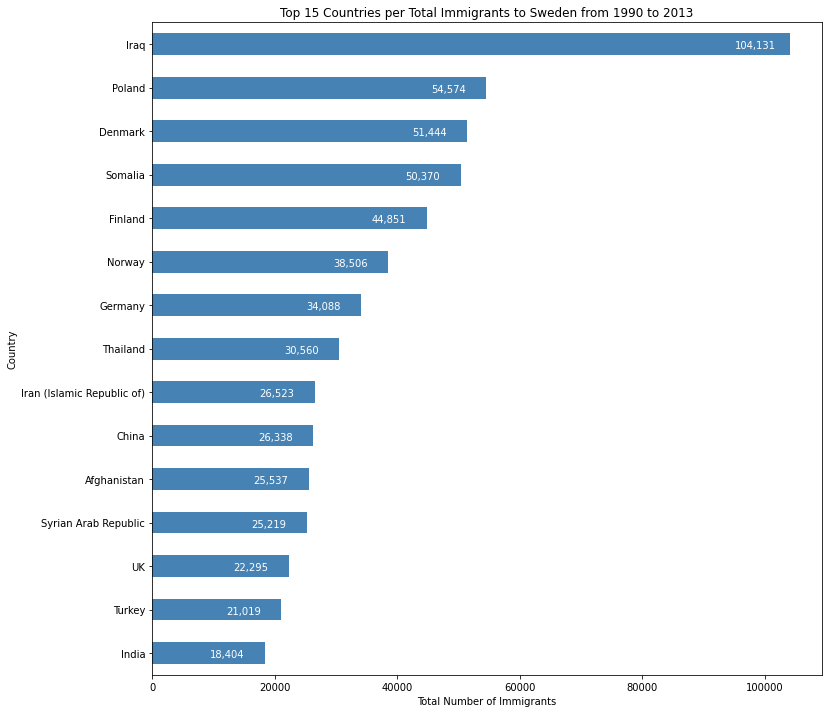

In [192]:
df_top15_i_total.plot(kind='barh', figsize=(12, 12), color='steelblue')

plt.xlabel('Total Number of Immigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Immigrants to Sweden from 1990 to 2013') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_i_total): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 9000, index - 0.10), color='white')


plt.show()

---------------

### 4.2.3 Top 15 Countries - Sorted by Total and Continent<a id="4.2.3"></a>

---------------

### Europe

In [193]:
df_top15_e_europe = df_sweden_emigrants[df_sweden_emigrants['Continent']=='Europe']
df_top15_e_europe.head(16)

Continent           Region  \
Country                                                                         
Sweden                                                Europe  Northern Europe   
Finland                                               Europe  Northern Europe   
Denmark                                               Europe  Northern Europe   
Norway                                                Europe  Northern Europe   
Germany                                               Europe   Western Europe   
United Kingdom of Great Britain and Northern Ir...    Europe  Northern Europe   
Poland                                                Europe   Eastern Europe   
France                                                Europe   Western Europe   
Iceland                                               Europe  Northern Europe   
Netherlands                                           Europe   Western Europe   
Spain                                                 Europe  Southern Europe   
Italy                                                 Europe  Southern Europe   
Greece                                                Europe  Southern Europe   
Romania                                               Europe   Eastern Europe   
Russian Federation                                    Europe   Eastern Europe   
Hungary                                               Europe   Eastern Europe   

                                                          Development  1980  \
Country                                                                       
Sweden                                              Developed regions   0.0   
Finland                                             Developed regions   0.0   
Denmark                                             Developed regions   0.0   
Norway                                              Developed regions   0.0   
Germany                                             Developed regions   0.0   
United Kingdom of Great Britain and Northern Ir...  Developed regions   0.0   
Poland                                              Developed regions   0.0   
France                                              Developed regions   0.0   
Iceland                                             Developed regions   0.0   
Netherlands                                         Developed regions   0.0   
Spain                                               Developed regions   0.0   
Italy                                               Developed regions   0.0   
Greece                                              Developed regions   0.0   
Romania                                             Developed regions   0.0   
Russian Federation                                  Developed regions   0.0   
Hungary                                             Developed regions   0.0   

                                                    1981  1982  1983  1984  \
Country                                                                      
Sweden                                               0.0   0.0   0.0   0.0   
Finland                                              0.0   0.0   0.0   0.0   
Denmark                                              0.0   0.0   0.0   0.0   
Norway                                               0.0   0.0   0.0   0.0   
Germany                                              0.0   0.0   0.0   0.0   
United Kingdom of Great Britain and Northern Ir...   0.0   0.0   0.0   0.0   
Poland                                               0.0   0.0   0.0   0.0   
France                                               0.0   0.0   0.0   0.0   
Iceland                                              0.0   0.0   0.0   0.0   
Netherlands                                          0.0   0.0   0.0   0.0   
Spain                                                0.0   0.0   0.0   0.0   
Italy                                                0.0   0.0   0.0   0.0   
Greece                                               0.0   0.0   0.0   0.0   

In [194]:
df_top15_e_europe = df_top15_e_europe.head(16)
df_top15_e_europe.drop(['Sweden'], axis=0, inplace=True)
df_top15_e_europe.rename(index={'United Kingdom of Great Britain and Northern Ireland':'UK','Republic of Moldova':'Moldova','The former Yugoslav Republic of Macedonia':'Macedonia'}, inplace=True)
df_top15_e_europe

Continent           Region        Development  1980  1981  \
Country                                                                        
Finland               Europe  Northern Europe  Developed regions   0.0   0.0   
Denmark               Europe  Northern Europe  Developed regions   0.0   0.0   
Norway                Europe  Northern Europe  Developed regions   0.0   0.0   
Germany               Europe   Western Europe  Developed regions   0.0   0.0   
UK                    Europe  Northern Europe  Developed regions   0.0   0.0   
Poland                Europe   Eastern Europe  Developed regions   0.0   0.0   
France                Europe   Western Europe  Developed regions   0.0   0.0   
Iceland               Europe  Northern Europe  Developed regions   0.0   0.0   
Netherlands           Europe   Western Europe  Developed regions   0.0   0.0   
Spain                 Europe  Southern Europe  Developed regions   0.0   0.0   
Italy                 Europe  Southern Europe  Developed regions   0.0   0.0   
Greece                Europe  Southern Europe  Developed regions   0.0   0.0   
Romania               Europe   Eastern Europe  Developed regions   0.0   0.0   
Russian Federation    Europe   Eastern Europe  Developed regions   0.0   0.0   
Hungary               Europe   Eastern Europe  Developed regions   0.0   0.0   

                    1982  1983  1984  1985  1986  ...    2005    2006    2007  \
Country                                           ...                           
Finland              0.0   0.0   0.0   0.0   0.0  ...  3171.0  2731.0  2428.0   
Denmark              0.0   0.0   0.0   0.0   0.0  ...  2154.0  2117.0  2510.0   
Norway               0.0   0.0   0.0   0.0   0.0  ...  1922.0  1821.0  1770.0   
Germany              0.0   0.0   0.0   0.0   0.0  ...   777.0   961.0  1099.0   
UK                   0.0   0.0   0.0   0.0   0.0  ...   697.0   946.0   837.0   
Poland               0.0   0.0   0.0   0.0   0.0  ...   241.0   362.0   636.0   
France               0.0   0.0   0.0   0.0   0.0  ...   383.0   595.0   655.0   
Iceland              0.0   0.0   0.0   0.0   0.0  ...   381.0   308.0   369.0   
Netherlands          0.0   0.0   0.0   0.0   0.0  ...   201.0   316.0   295.0   
Spain                0.0   0.0   0.0   0.0   0.0  ...   209.0   351.0   350.0   
Italy                0.0   0.0   0.0   0.0   0.0  ...   196.0   266.0   284.0   
Greece               0.0   0.0   0.0   0.0   0.0  ...   164.0   269.0   300.0   
Romania              0.0   0.0   0.0   0.0   0.0  ...    42.0    77.0   143.0   
Russian Federation   0.0   0.0   0.0   0.0   0.0  ...   136.0   234.0   262.0   
Hungary              0.0   0.0   0.0   0.0   0.0  ...    80.0    98.0   149.0   

                      2008    2009    2010    2011    2012    2013    Total  
Country                                                                      
Finland             2517.0  2296.0  2153.0  2092.0  1987.0  1871.0  41013.0  
Denmark             2883.0  3056.0  3159.0  3081.0  2835.0  3035.0  34193.0  
Norway              1749.0  1660.0  1629.0  1560.0  1578.0  1631.0  27158.0  
Germany             1014.0  1278.0  1305.0  1369.0  1303.0  1356.0  14749.0  
UK                   739.0   639.0  1010.0   813.0   918.0   940.0  12524.0  
Poland               937.0  1089.0  1253.0  1395.0  1537.0  1296.0   9887.0  
France               471.0   482.0   610.0   511.0   651.0   555.0   7369.0  
Iceland              279.0   222.0   351.0   358.0   461.0   490.0   5778.0  
Netherlands          321.0   336.0   388.0   382.0   476.0   392.0   4592.0  
Spain                238.0   249.0   390.0   323.0   366.0   347.0   4189.0  
Italy                195.0   247.0   308.0   295.0   359.0   320.0   3680.0  
Greece               230.0   211.0   290.0   204.0   256.0   268.0   3583.0  
Romania              269.0   529.0   443.0   541.0   530.0   468.0   3338.0  
Russian Federation   139.0   126.0   132.0   213.0   250.0   156.0   2478.0  
Hungary              159.0   153

In [195]:
df_top15_e_europe.sort_values(by='Total', ascending=True, inplace=True)
df_top15_e_total_europe = df_top15_e_europe['Total']
df_top15_e_total_europe

Country
Hungary                2384.0
Russian Federation     2478.0
Romania                3338.0
Greece                 3583.0
Italy                  3680.0
Spain                  4189.0
Netherlands            4592.0
Iceland                5778.0
France                 7369.0
Poland                 9887.0
UK                    12524.0
Germany               14749.0
Norway                27158.0
Denmark               34193.0
Finland               41013.0
Name: Total, dtype: float64

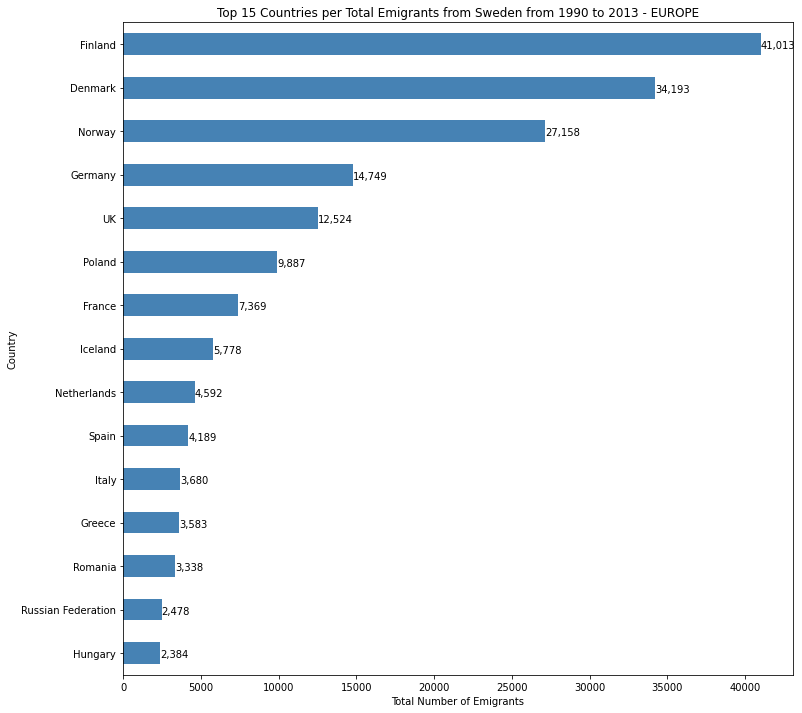

In [196]:
df_top15_e_total_europe.plot(kind='barh', figsize=(12, 12), color='steelblue')

plt.xlabel('Total Number of Emigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Emigrants from Sweden from 1990 to 2013 - EUROPE') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_e_total_europe): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='Black')


plt.show()

------------

In [197]:
df_top15_i_europe = df_sweden_immigrants[df_sweden_immigrants['Continent']=='Europe']
df_top15_i_europe.head(16)

Continent           Region  \
Country                                                                         
Sweden                                                Europe  Northern Europe   
Poland                                                Europe   Eastern Europe   
Denmark                                               Europe  Northern Europe   
Finland                                               Europe  Northern Europe   
Norway                                                Europe  Northern Europe   
Germany                                               Europe   Western Europe   
United Kingdom of Great Britain and Northern Ir...    Europe  Northern Europe   
Russian Federation                                    Europe   Eastern Europe   
Romania                                               Europe   Eastern Europe   
Bosnia and Herzegovina                                Europe  Southern Europe   
Lithuania                                             Europe  Northern Europe   
France                                                Europe   Western Europe   
Netherlands                                           Europe   Western Europe   
Serbia                                                Europe  Southern Europe   
Spain                                                 Europe  Southern Europe   
Greece                                                Europe  Southern Europe   

                                                          Development  1980  \
Country                                                                       
Sweden                                              Developed regions   0.0   
Poland                                              Developed regions   0.0   
Denmark                                             Developed regions   0.0   
Finland                                             Developed regions   0.0   
Norway                                              Developed regions   0.0   
Germany                                             Developed regions   0.0   
United Kingdom of Great Britain and Northern Ir...  Developed regions   0.0   
Russian Federation                                  Developed regions   0.0   
Romania                                             Developed regions   0.0   
Bosnia and Herzegovina                              Developed regions   0.0   
Lithuania                                           Developed regions   0.0   
France                                              Developed regions   0.0   
Netherlands                                         Developed regions   0.0   
Serbia                                              Developed regions   0.0   
Spain                                               Developed regions   0.0   
Greece                                              Developed regions   0.0   

                                                    1981  1982  1983  1984  \
Country                                                                      
Sweden                                               0.0   0.0   0.0   0.0   
Poland                                               0.0   0.0   0.0   0.0   
Denmark                                              0.0   0.0   0.0   0.0   
Finland                                              0.0   0.0   0.0   0.0   
Norway                                               0.0   0.0   0.0   0.0   
Germany                                              0.0   0.0   0.0   0.0   
United Kingdom of Great Britain and Northern Ir...   0.0   0.0   0.0   0.0   
Russian Federation                                   0.0   0.0   0.0   0.0   
Romania                                              0.0   0.0   0.0   0.0   
Bosnia and Herzegovina                               0.0   0.0   0.0   0.0   
Lithuania                                            0.0   0.0   0.0   0.0   
France                                               0.0   0.0   0.0   0.0   
Netherlands                                          0.0   0.0   0.0   0.0   

In [198]:
df_top15_i_europe = df_top15_i_europe.head(16)
df_top15_i_europe.drop(['Sweden'], axis=0, inplace=True)
df_top15_i_europe.rename(index={'United Kingdom of Great Britain and Northern Ireland':'UK','Republic of Moldova':'Moldova','The former Yugoslav Republic of Macedonia':'Macedonia'}, inplace=True)
df_top15_i_europe

Continent           Region        Development  1980  \
Country                                                                      
Poland                    Europe   Eastern Europe  Developed regions   0.0   
Denmark                   Europe  Northern Europe  Developed regions   0.0   
Finland                   Europe  Northern Europe  Developed regions   0.0   
Norway                    Europe  Northern Europe  Developed regions   0.0   
Germany                   Europe   Western Europe  Developed regions   0.0   
UK                        Europe  Northern Europe  Developed regions   0.0   
Russian Federation        Europe   Eastern Europe  Developed regions   0.0   
Romania                   Europe   Eastern Europe  Developed regions   0.0   
Bosnia and Herzegovina    Europe  Southern Europe  Developed regions   0.0   
Lithuania                 Europe  Northern Europe  Developed regions   0.0   
France                    Europe   Western Europe  Developed regions   0.0   
Netherlands               Europe   Western Europe  Developed regions   0.0   
Serbia                    Europe  Southern Europe  Developed regions   0.0   
Spain                     Europe  Southern Europe  Developed regions   0.0   
Greece                    Europe  Southern Europe  Developed regions   0.0   

                        1981  1982  1983  1984  1985  1986  ...    2005  \
Country                                                     ...           
Poland                   0.0   0.0   0.0   0.0   0.0   0.0  ...  3420.0   
Denmark                  0.0   0.0   0.0   0.0   0.0   0.0  ...  4040.0   
Finland                  0.0   0.0   0.0   0.0   0.0   0.0  ...  2895.0   
Norway                   0.0   0.0   0.0   0.0   0.0   0.0  ...  2417.0   
Germany                  0.0   0.0   0.0   0.0   0.0   0.0  ...  2016.0   
UK                       0.0   0.0   0.0   0.0   0.0   0.0  ...  1050.0   
Russian Federation       0.0   0.0   0.0   0.0   0.0   0.0  ...   959.0   
Romania                  0.0   0.0   0.0   0.0   0.0   0.0  ...   352.0   
Bosnia and Herzegovina   0.0   0.0   0.0   0.0   0.0   0.0  ...   641.0   
Lithuania                0.0   0.0   0.0   0.0   0.0   0.0  ...   695.0   
France                   0.0   0.0   0.0   0.0   0.0   0.0  ...   618.0   
Netherlands              0.0   0.0   0.0   0.0   0.0   0.0  ...   692.0   
Serbia                   0.0   0.0   0.0   0.0   0.0   0.0  ...     0.0   
Spain                    0.0   0.0   0.0   0.0   0.0   0.0  ...   339.0   
Greece                   0.0   0.0   0.0   0.0   0.0   0.0  ...   302.0   

                          2006    2007    2008    2009    2010    2011  \
Country                                                                  
Poland                  6347.0  7525.0  6970.0  5167.0  4414.0  4403.0   
Denmark                 5137.0  5097.0  4129.0  3761.0  3437.0  3196.0   
Finland                 2639.0  2561.0  2405.0  2398.0  2300.0  2331.0   
Norway                  2492.0  2395.0  2263.0  1948.0  2070.0  2030.0   
Germany                 2883.0  3614.0  3405.0  2773.0  2202.0  2205.0   
UK                      1537.0  1541.0  1719.0  1638.0  1435.0  1804.0   
Russian Federation      1393.0   943.0   914.0  1094.0  1221.0  1186.0   
Romania                  337.0  2587.0  2544.0  1829.0  1726.0  1928.0   
Bosnia and Herzegovina  1058.0   584.0   607.0   538.0   516.0   520.0   
Lithuania                895.0   918.0   915.0  1214.0  1370.0  1349.0   
France                   756.0   890.0   957.0   847.0   723.0   852.0   
Netherlands             1044.0  1071.0  1110.0   855.0   775.0   866.0   
Serbia                   215.0  1895.0  1791.0  1021.0   864.0  1028.0   
Spain                    502.0   534.0   611.0   702.0   674.0   762.0   
Greece                   442.0   533.0   640.0   483.0   520.0   929.0   

                          2012    2013    Total  
Country                                          
Poland                  4433.0  4611.0  54574.0  
Denmark    

In [199]:
df_top15_i_europe.sort_values(by='Total', ascending=True, inplace=True)
df_top15_i_total_europe = df_top15_i_europe['Total']
df_top15_i_total_europe

Country
Greece                     8528.0
Spain                      8823.0
Serbia                     9039.0
Netherlands               11145.0
France                    11219.0
Lithuania                 11344.0
Bosnia and Herzegovina    13733.0
Romania                   17032.0
Russian Federation        17158.0
UK                        22295.0
Germany                   34088.0
Norway                    38506.0
Finland                   44851.0
Denmark                   51444.0
Poland                    54574.0
Name: Total, dtype: float64

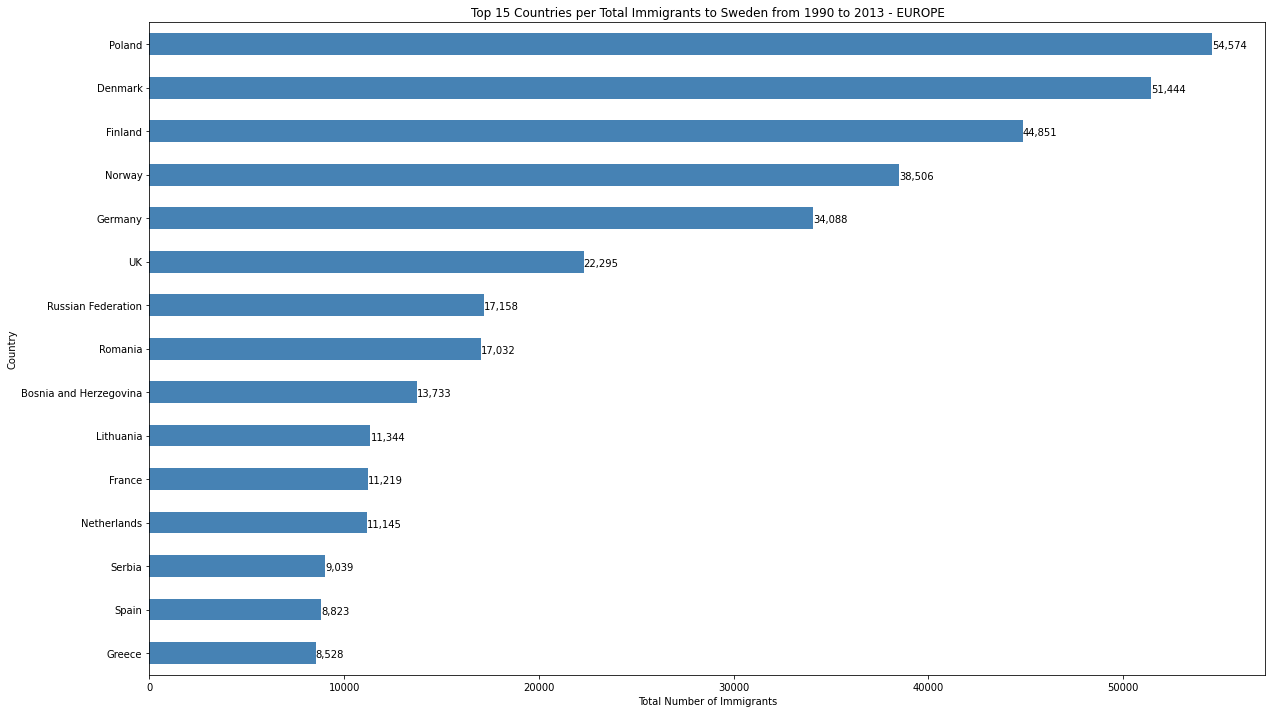

In [200]:
df_top15_i_total_europe.plot(kind='barh', figsize=(20, 12), color='steelblue')

plt.xlabel('Total Number of Immigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Immigrants to Sweden from 1990 to 2013 - EUROPE') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_i_total_europe): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='black')


plt.show()

---------------

### Africa

In [201]:
df_top15_e_africa = df_sweden_emigrants[df_sweden_emigrants['Continent']=='Africa']
df_top15_e_africa.head(15)

Continent           Region         Development  \
Country                                                                      
Somalia                        Africa   Eastern Africa  Developing regions   
Ethiopia                       Africa   Eastern Africa  Developing regions   
Nigeria                        Africa   Western Africa  Developing regions   
Cameroon                       Africa    Middle Africa  Developing regions   
South Africa                   Africa  Southern Africa  Developing regions   
Egypt                          Africa  Northern Africa  Developing regions   
Morocco                        Africa  Northern Africa  Developing regions   
Ghana                          Africa   Western Africa  Developing regions   
Tunisia                        Africa  Northern Africa  Developing regions   
Gambia                         Africa   Western Africa  Developing regions   
Sudan                          Africa  Northern Africa  Developing regions   
Eritrea                        Africa   Eastern Africa  Developing regions   
Libya                          Africa  Northern Africa  Developing regions   
United Republic of Tanzania    Africa   Eastern Africa  Developing regions   
Kenya                          Africa   Eastern Africa  Developing regions   

                             1980  1981  1982  1983  1984  1985  1986  ...  \
Country                                                                ...   
Somalia                       0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Ethiopia                      0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Nigeria                       0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Cameroon                      0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
South Africa                  0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Egypt                         0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Morocco                       0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Ghana                         0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Tunisia                       0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Gambia                        0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Sudan                         0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Eritrea                       0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Libya                         0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
United Republic of Tanzania   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Kenya                         0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

                              2005   2006   2007   2008   2009   2010   2011  \
Country                                                                        
Somalia                      207.0  283.0  288.0  259.0  133.0  328.0  358.0   
Ethiopia                      34.0   66.0   71.0   48.0   16.0   72.0   69.0   
Nigeria                       20.0   76.0   89.0   75.0   41.0   80.0   88.0   
Cameroon                      30.0   66.0   67.0   84.0   49.0   64.0  106.0   
South Africa                  53.0  109.0   65.0   47.0   39.0   37.0   31.0   
Egypt                         41.0   60.0   34.0   28.0   16.0   55.0   49.0   
Morocco                       23.0   38.0   57.0   34.0   32.0   49.0   31.0   
Ghana                         18.0   43.0   84.0   55.0   23.0   35.0   45.0   
Tunisia                       14.0   19.0   28.0   28.0   14.0   34.0   34.0   
Gambia                        21.0   22.0   40.0   16.0    9.0   20.0   21.0   
Sudan                         23.0   27.0   57.0   18.0   17.0   15.0   31.0   
Eritrea                       10.0   25.0   15.0   16.0   23.0   18.0   29.0   
Libya                         11.0   10.0   25.0   13.0   11.0    6.0   28.0   
United Republic of Tanzania   16.0   28.0   25.0   22.0   11.0   17.0   22.0   
Kenya                         11.0   28.0   29.0   11.0   15.0   24.0   20.0   

             

In [202]:
df_top15_e_africa = df_top15_e_africa.head(15)
df_top15_e_africa

Continent           Region         Development  \
Country                                                                      
Somalia                        Africa   Eastern Africa  Developing regions   
Ethiopia                       Africa   Eastern Africa  Developing regions   
Nigeria                        Africa   Western Africa  Developing regions   
Cameroon                       Africa    Middle Africa  Developing regions   
South Africa                   Africa  Southern Africa  Developing regions   
Egypt                          Africa  Northern Africa  Developing regions   
Morocco                        Africa  Northern Africa  Developing regions   
Ghana                          Africa   Western Africa  Developing regions   
Tunisia                        Africa  Northern Africa  Developing regions   
Gambia                         Africa   Western Africa  Developing regions   
Sudan                          Africa  Northern Africa  Developing regions   
Eritrea                        Africa   Eastern Africa  Developing regions   
Libya                          Africa  Northern Africa  Developing regions   
United Republic of Tanzania    Africa   Eastern Africa  Developing regions   
Kenya                          Africa   Eastern Africa  Developing regions   

                             1980  1981  1982  1983  1984  1985  1986  ...  \
Country                                                                ...   
Somalia                       0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Ethiopia                      0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Nigeria                       0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Cameroon                      0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
South Africa                  0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Egypt                         0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Morocco                       0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Ghana                         0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Tunisia                       0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Gambia                        0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Sudan                         0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Eritrea                       0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Libya                         0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
United Republic of Tanzania   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Kenya                         0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

                              2005   2006   2007   2008   2009   2010   2011  \
Country                                                                        
Somalia                      207.0  283.0  288.0  259.0  133.0  328.0  358.0   
Ethiopia                      34.0   66.0   71.0   48.0   16.0   72.0   69.0   
Nigeria                       20.0   76.0   89.0   75.0   41.0   80.0   88.0   
Cameroon                      30.0   66.0   67.0   84.0   49.0   64.0  106.0   
South Africa                  53.0  109.0   65.0   47.0   39.0   37.0   31.0   
Egypt                         41.0   60.0   34.0   28.0   16.0   55.0   49.0   
Morocco                       23.0   38.0   57.0   34.0   32.0   49.0   31.0   
Ghana                         18.0   43.0   84.0   55.0   23.0   35.0   45.0   
Tunisia                       14.0   19.0   28.0   28.0   14.0   34.0   34.0   
Gambia                        21.0   22.0   40.0   16.0    9.0   20.0   21.0   
Sudan                         23.0   27.0   57.0   18.0   17.0   15.0   31.0   
Eritrea                       10.0   25.0   15.0   16.0   23.0   18.0   29.0   
Libya                         11.0   10.0   25.0   13.0   11.0    6.0   28.0   
United Republic of Tanzania   16.0   28.0   25.0   22.0   11.0   17.0   22.0   
Kenya                         11.0   28.0   29.0   11.0   15.0   24.0   20.0   

             

In [203]:
df_top15_e_africa.sort_values(by='Total', ascending=True, inplace=True)
df_top15_e_total_africa = df_top15_e_africa['Total']
df_top15_e_total_africa

Country
Kenya                           280.0
United Republic of Tanzania     281.0
Libya                           285.0
Eritrea                         288.0
Sudan                           309.0
Gambia                          348.0
Tunisia                         367.0
Ghana                           495.0
Morocco                         549.0
Egypt                           565.0
South Africa                    659.0
Cameroon                        671.0
Nigeria                         778.0
Ethiopia                        885.0
Somalia                        4014.0
Name: Total, dtype: float64

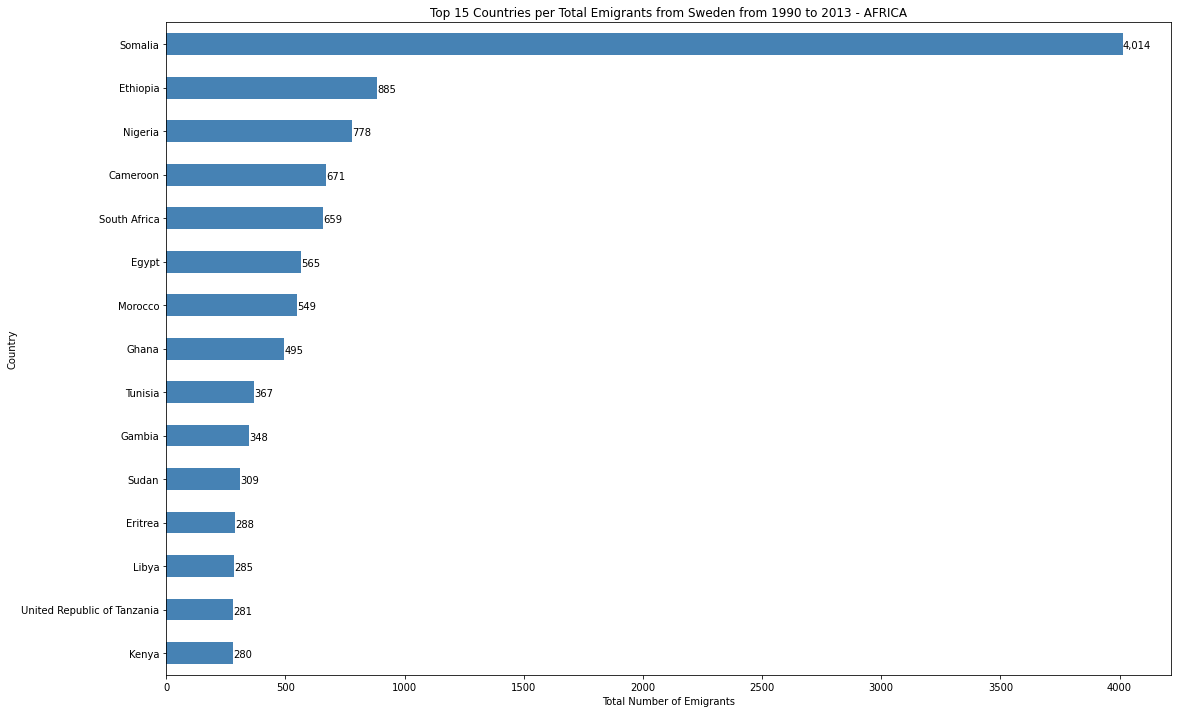

In [204]:
df_top15_e_total_africa.plot(kind='barh', figsize=(18, 12), color='steelblue')

plt.xlabel('Total Number of Emigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Emigrants from Sweden from 1990 to 2013 - AFRICA') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_e_total_africa): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='black')


plt.show()

------------

In [205]:
df_top15_i_africa = df_sweden_immigrants[df_sweden_immigrants['Continent']=='Africa']
df_top15_i_africa.head(15)

Continent           Region  \
Country                                                       
Somalia                             Africa   Eastern Africa   
Eritrea                             Africa   Eastern Africa   
Ethiopia                            Africa   Eastern Africa   
Morocco                             Africa  Northern Africa   
Nigeria                             Africa   Western Africa   
Egypt                               Africa  Northern Africa   
Gambia                              Africa   Western Africa   
Burundi                             Africa   Eastern Africa   
Tunisia                             Africa  Northern Africa   
Ghana                               Africa   Western Africa   
Democratic Republic of the Congo    Africa    Middle Africa   
Uganda                              Africa   Eastern Africa   
Cameroon                            Africa    Middle Africa   
Kenya                               Africa   Eastern Africa   
Sudan                               Africa  Northern Africa   

                                         Development  1980  1981  1982  1983  \
Country                                                                        
Somalia                           Developing regions   0.0   0.0   0.0   0.0   
Eritrea                           Developing regions   0.0   0.0   0.0   0.0   
Ethiopia                          Developing regions   0.0   0.0   0.0   0.0   
Morocco                           Developing regions   0.0   0.0   0.0   0.0   
Nigeria                           Developing regions   0.0   0.0   0.0   0.0   
Egypt                             Developing regions   0.0   0.0   0.0   0.0   
Gambia                            Developing regions   0.0   0.0   0.0   0.0   
Burundi                           Developing regions   0.0   0.0   0.0   0.0   
Tunisia                           Developing regions   0.0   0.0   0.0   0.0   
Ghana                             Developing regions   0.0   0.0   0.0   0.0   
Democratic Republic of the Congo  Developing regions   0.0   0.0   0.0   0.0   
Uganda                            Developing regions   0.0   0.0   0.0   0.0   
Cameroon                          Developing regions   0.0   0.0   0.0   0.0   
Kenya                             Developing regions   0.0   0.0   0.0   0.0   
Sudan                             Developing regions   0.0   0.0   0.0   0.0   

                                  1984  1985  1986  ...    2005    2006  \
Country                                             ...                   
Somalia                            0.0   0.0   0.0  ...  1314.0  2974.0   
Eritrea                            0.0   0.0   0.0  ...   610.0   755.0   
Ethiopia                           0.0   0.0   0.0  ...   252.0   454.0   
Morocco                            0.0   0.0   0.0  ...   234.0   345.0   
Nigeria                            0.0   0.0   0.0  ...   375.0   453.0   
Egypt                              0.0   0.0   0.0  ...   117.0   242.0   
Gambia                             0.0   0.0   0.0  ...   141.0   180.0   
Burundi                            0.0   0.0   0.0  ...   543.0   574.0   
Tunisia                            0.0   0.0   0.0  ...   163.0   182.0   
Ghana                              0.0   0.0   0.0  ...   163.0   126.0   
Democratic Republic of the Congo   0.0   0.0   0.0  ...    78.0   245.0   
Uganda                             0.0   0.0   0.0  ...    65.0   105.0   
Cameroon                           0.0   0.0   0.0  ...   175.0   151.0   
Kenya                              0.0   0.0   0.0  ...   109.0   109.0   
Sudan                              0.0   0.0   0.0  ...   101.0    96.0   

                                    2007    2008    2009    2010    2011  \
Country                                                                    
Somalia                           3781.0  4064.0  6902.0  6819.0  3082.0   
Eritrea                            816.0  1170.0  1398.0  1604.0  2128.0   
Ethiopia            

In [206]:
df_top15_i_africa = df_top15_i_africa.head(15)
df_top15_i_africa

Continent           Region  \
Country                                                       
Somalia                             Africa   Eastern Africa   
Eritrea                             Africa   Eastern Africa   
Ethiopia                            Africa   Eastern Africa   
Morocco                             Africa  Northern Africa   
Nigeria                             Africa   Western Africa   
Egypt                               Africa  Northern Africa   
Gambia                              Africa   Western Africa   
Burundi                             Africa   Eastern Africa   
Tunisia                             Africa  Northern Africa   
Ghana                               Africa   Western Africa   
Democratic Republic of the Congo    Africa    Middle Africa   
Uganda                              Africa   Eastern Africa   
Cameroon                            Africa    Middle Africa   
Kenya                               Africa   Eastern Africa   
Sudan                               Africa  Northern Africa   

                                         Development  1980  1981  1982  1983  \
Country                                                                        
Somalia                           Developing regions   0.0   0.0   0.0   0.0   
Eritrea                           Developing regions   0.0   0.0   0.0   0.0   
Ethiopia                          Developing regions   0.0   0.0   0.0   0.0   
Morocco                           Developing regions   0.0   0.0   0.0   0.0   
Nigeria                           Developing regions   0.0   0.0   0.0   0.0   
Egypt                             Developing regions   0.0   0.0   0.0   0.0   
Gambia                            Developing regions   0.0   0.0   0.0   0.0   
Burundi                           Developing regions   0.0   0.0   0.0   0.0   
Tunisia                           Developing regions   0.0   0.0   0.0   0.0   
Ghana                             Developing regions   0.0   0.0   0.0   0.0   
Democratic Republic of the Congo  Developing regions   0.0   0.0   0.0   0.0   
Uganda                            Developing regions   0.0   0.0   0.0   0.0   
Cameroon                          Developing regions   0.0   0.0   0.0   0.0   
Kenya                             Developing regions   0.0   0.0   0.0   0.0   
Sudan                             Developing regions   0.0   0.0   0.0   0.0   

                                  1984  1985  1986  ...    2005    2006  \
Country                                             ...                   
Somalia                            0.0   0.0   0.0  ...  1314.0  2974.0   
Eritrea                            0.0   0.0   0.0  ...   610.0   755.0   
Ethiopia                           0.0   0.0   0.0  ...   252.0   454.0   
Morocco                            0.0   0.0   0.0  ...   234.0   345.0   
Nigeria                            0.0   0.0   0.0  ...   375.0   453.0   
Egypt                              0.0   0.0   0.0  ...   117.0   242.0   
Gambia                             0.0   0.0   0.0  ...   141.0   180.0   
Burundi                            0.0   0.0   0.0  ...   543.0   574.0   
Tunisia                            0.0   0.0   0.0  ...   163.0   182.0   
Ghana                              0.0   0.0   0.0  ...   163.0   126.0   
Democratic Republic of the Congo   0.0   0.0   0.0  ...    78.0   245.0   
Uganda                             0.0   0.0   0.0  ...    65.0   105.0   
Cameroon                           0.0   0.0   0.0  ...   175.0   151.0   
Kenya                              0.0   0.0   0.0  ...   109.0   109.0   
Sudan                              0.0   0.0   0.0  ...   101.0    96.0   

                                    2007    2008    2009    2010    2011  \
Country                                                                    
Somalia                           3781.0  4064.0  6902.0  6819.0  3082.0   
Eritrea                            816.0  1170.0  1398.0  1604.0  2128.0   
Ethiopia            

In [207]:
df_top15_i_africa.sort_values(by='Total', ascending=True, inplace=True)
df_top15_i_total_africa = df_top15_i_africa['Total']
df_top15_i_total_africa

Country
Sudan                                1737.0
Kenya                                1928.0
Cameroon                             1942.0
Uganda                               1966.0
Democratic Republic of the Congo     2028.0
Ghana                                2201.0
Tunisia                              2592.0
Burundi                              2927.0
Gambia                               3018.0
Egypt                                4009.0
Nigeria                              4476.0
Morocco                              5221.0
Ethiopia                             6901.0
Eritrea                             15131.0
Somalia                             50370.0
Name: Total, dtype: float64

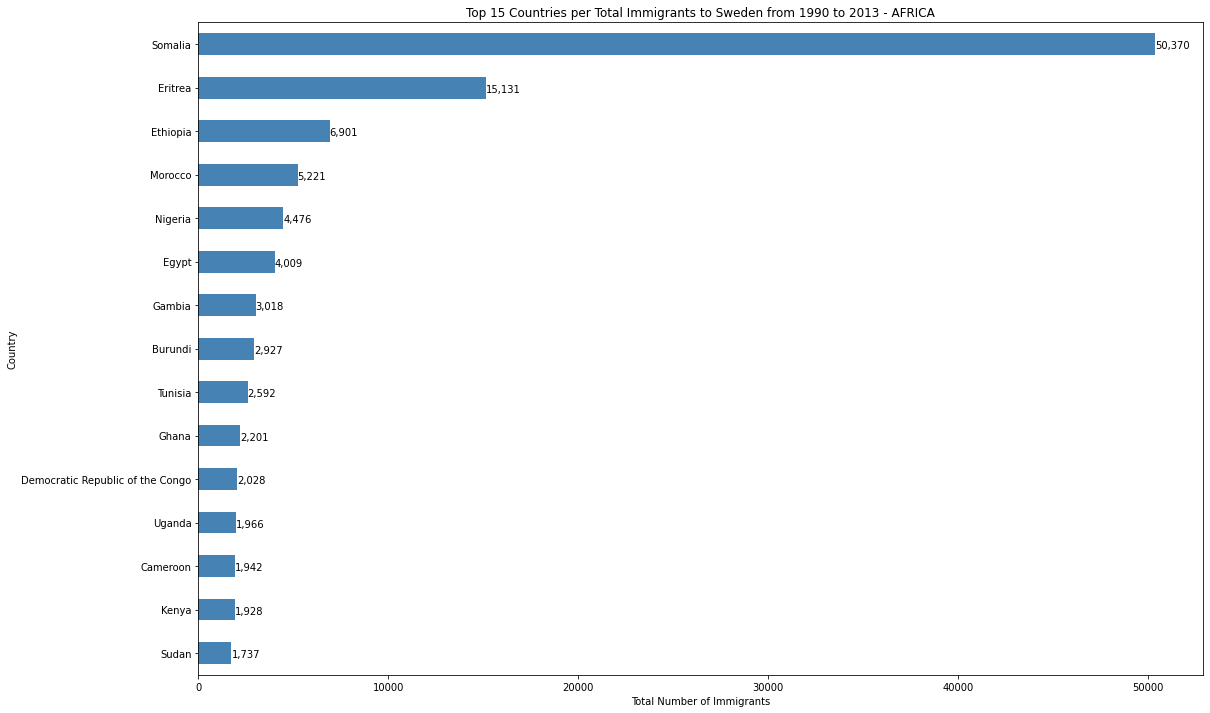

In [208]:
df_top15_i_total_africa.plot(kind='barh', figsize=(18, 12), color='steelblue')

plt.xlabel('Total Number of Immigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Immigrants to Sweden from 1990 to 2013 - AFRICA') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_i_total_africa): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='black')


plt.show()

---------------

### Asia

In [209]:
df_top15_e_asia = df_sweden_emigrants[df_sweden_emigrants['Continent']=='Asia']
df_top15_e_asia.head(16)

Continent  \
Country                                                        
India                                                   Asia   
China (including Hong Kong Special Administrati...      Asia   
Iran (Islamic Republic of)                              Asia   
Iraq                                                    Asia   
Japan                                                   Asia   
Pakistan                                                Asia   
Turkey                                                  Asia   
Thailand                                                Asia   
Bangladesh                                              Asia   
Republic of Korea                                       Asia   
Lebanon                                                 Asia   
Singapore                                               Asia   
Viet Nam                                                Asia   
Israel                                                  Asia   
Philippines                                             Asia   
Afghanistan                                             Asia   

                                                                Region  \
Country                                                                  
India                                                    Southern Asia   
China (including Hong Kong Special Administrati...        Eastern Asia   
Iran (Islamic Republic of)                               Southern Asia   
Iraq                                                      Western Asia   
Japan                                                     Eastern Asia   
Pakistan                                                 Southern Asia   
Turkey                                                    Western Asia   
Thailand                                            South-Eastern Asia   
Bangladesh                                               Southern Asia   
Republic of Korea                                         Eastern Asia   
Lebanon                                                   Western Asia   
Singapore                                           South-Eastern Asia   
Viet Nam                                            South-Eastern Asia   
Israel                                                    Western Asia   
Philippines                                         South-Eastern Asia   
Afghanistan                                              Southern Asia   

                                                           Development  1980  \
Country                                                                        
India                                               Developing regions   0.0   
China (including Hong Kong Special Administrati...  Developing regions   0.0   
Iran (Islamic Republic of)                          Developing regions   0.0   
Iraq                                                Developing regions   0.0   
Japan                                                Developed regions   0.0   
Pakistan                                            Developing regions   0.0   
Turkey                                              Developing regions   0.0   
Thailand                                            Developing regions   0.0   
Bangladesh                                          Developing regions   0.0   
Republic of Korea                                   Developing regions   0.0   
Lebanon                                             Developing regions   0.0   
Singapore                                           Developing regions   0.0   
Viet Nam                                            Developing regions   0.0   
Israel                                              Developing regions   0.0   
Philippines                                         Developing regions   0.0   
Afghanistan                                         Developing regions   0.0   

                                                    1981  1982  1983  1984  \
Country                                       

In [210]:
df_top15_e_asia = df_top15_e_asia.head(15)
df_top15_e_asia.rename(index={'China (including Hong Kong Special Administrative Region)':'China','Iran (Islamic Republic of)':'Iran','Syrian Arab Republic':'Syria'}, inplace=True)
df_top15_e_asia

Continent              Region         Development  1980  \
Country                                                                     
India                  Asia       Southern Asia  Developing regions   0.0   
China                  Asia        Eastern Asia  Developing regions   0.0   
Iran                   Asia       Southern Asia  Developing regions   0.0   
Iraq                   Asia        Western Asia  Developing regions   0.0   
Japan                  Asia        Eastern Asia   Developed regions   0.0   
Pakistan               Asia       Southern Asia  Developing regions   0.0   
Turkey                 Asia        Western Asia  Developing regions   0.0   
Thailand               Asia  South-Eastern Asia  Developing regions   0.0   
Bangladesh             Asia       Southern Asia  Developing regions   0.0   
Republic of Korea      Asia        Eastern Asia  Developing regions   0.0   
Lebanon                Asia        Western Asia  Developing regions   0.0   
Singapore              Asia  South-Eastern Asia  Developing regions   0.0   
Viet Nam               Asia  South-Eastern Asia  Developing regions   0.0   
Israel                 Asia        Western Asia  Developing regions   0.0   
Philippines            Asia  South-Eastern Asia  Developing regions   0.0   

                   1981  1982  1983  1984  1985  1986  ...   2005   2006  \
Country                                                ...                 
India               0.0   0.0   0.0   0.0   0.0   0.0  ...  371.0  625.0   
China               0.0   0.0   0.0   0.0   0.0   0.0  ...  326.0  715.0   
Iran                0.0   0.0   0.0   0.0   0.0   0.0  ...  198.0  294.0   
Iraq                0.0   0.0   0.0   0.0   0.0   0.0  ...  207.0  216.0   
Japan               0.0   0.0   0.0   0.0   0.0   0.0  ...  195.0  309.0   
Pakistan            0.0   0.0   0.0   0.0   0.0   0.0  ...   79.0  178.0   
Turkey              0.0   0.0   0.0   0.0   0.0   0.0  ...  130.0  210.0   
Thailand            0.0   0.0   0.0   0.0   0.0   0.0  ...  129.0  224.0   
Bangladesh          0.0   0.0   0.0   0.0   0.0   0.0  ...   49.0  103.0   
Republic of Korea   0.0   0.0   0.0   0.0   0.0   0.0  ...   74.0  133.0   
Lebanon             0.0   0.0   0.0   0.0   0.0   0.0  ...   46.0   63.0   
Singapore           0.0   0.0   0.0   0.0   0.0   0.0  ...   18.0   33.0   
Viet Nam            0.0   0.0   0.0   0.0   0.0   0.0  ...   21.0   50.0   
Israel              0.0   0.0   0.0   0.0   0.0   0.0  ...   38.0   96.0   
Philippines         0.0   0.0   0.0   0.0   0.0   0.0  ...   34.0   34.0   

                    2007   2008   2009   2010    2011    2012    2013   Total  
Country                                                                        
India              669.0  661.0  595.0  673.0   921.0  1228.0  1235.0  7855.0  
China              807.0  532.0  376.0  549.0  1047.0  1379.0  1015.0  7807.0  
Iran               331.0  287.0  131.0  256.0   375.0   515.0   447.0  4536.0  
Iraq               191.0  341.0  252.0  400.0   462.0   651.0   589.0  4427.0  
Japan              306.0  228.0  226.0  262.0   208.0   239.0   291.0  4035.0  
Pakistan           282.0  248.0  285.0  451.0   615.0   708.0   576.0  3673.0  
Turkey             286.0  230.0  223.0  230.0   316.0   420.0   435.0  3393.0  
Thailand           205.0  184.0  166.0  200.0   301.0   364.0   348.0  2692.0  
Bangladesh         121.0   95.0   76.0  134.0   162.0   238.0   194.0  1343.0  
Republic of Korea   99.0   55.0   76.0   53.0   103.0   102.0    98.0  1138.0  
Lebanon             69.0   61.0   44.0   52.0   101.0    79.0    60.0   948.0  
Singapore           36.0   23.0   22.0   40.0    70.0   122.0    11.0   779.0  
Viet Nam            45.0   44.0   29.0   41.0    85.0   112.0    83.0   642.0  
Israel              49.0   31.0   19.0   56.0    24.0    46.0    29.0   613.0  
Philippines         43.0   38.0   34.0   47.0    54.0    60.0    44.0   588.0  

[15 rows x 38 columns]

In [211]:
df_top15_e_asia.sort_values(by='Total', ascending=True, inplace=True)
df_top15_e_total_asia = df_top15_e_asia['Total']
df_top15_e_total_asia

Country
Philippines           588.0
Israel                613.0
Viet Nam              642.0
Singapore             779.0
Lebanon               948.0
Republic of Korea    1138.0
Bangladesh           1343.0
Thailand             2692.0
Turkey               3393.0
Pakistan             3673.0
Japan                4035.0
Iraq                 4427.0
Iran                 4536.0
China                7807.0
India                7855.0
Name: Total, dtype: float64

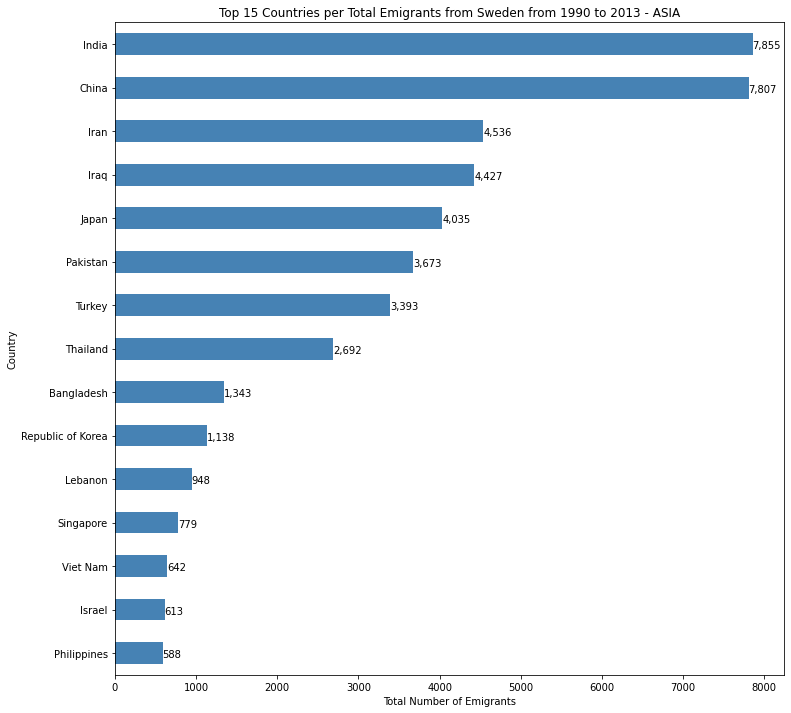

In [212]:
df_top15_e_total_asia.plot(kind='barh', figsize=(12, 12), color='steelblue')

plt.xlabel('Total Number of Emigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Emigrants from Sweden from 1990 to 2013 - ASIA') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_e_total_asia): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='black')


plt.show()

------------

In [213]:
df_top15_i_asia = df_sweden_immigrants[df_sweden_immigrants['Continent']=='Asia']
df_top15_i_asia.head(15)

Continent              Region         Development  \
Country                                                                        
Iraq                            Asia        Western Asia  Developing regions   
Thailand                        Asia  South-Eastern Asia  Developing regions   
Iran (Islamic Republic of)      Asia       Southern Asia  Developing regions   
China                           Asia        Eastern Asia  Developing regions   
Afghanistan                     Asia       Southern Asia  Developing regions   
Syrian Arab Republic            Asia        Western Asia  Developing regions   
Turkey                          Asia        Western Asia  Developing regions   
India                           Asia       Southern Asia  Developing regions   
Pakistan                        Asia       Southern Asia  Developing regions   
Viet Nam                        Asia  South-Eastern Asia  Developing regions   
Philippines                     Asia  South-Eastern Asia  Developing regions   
Lebanon                         Asia        Western Asia  Developing regions   
Bangladesh                      Asia       Southern Asia  Developing regions   
Japan                           Asia        Eastern Asia   Developed regions   
Uzbekistan                      Asia        Central Asia  Developing regions   

                            1980  1981  1982  1983  1984  1985  1986  ...  \
Country                                                               ...   
Iraq                         0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Thailand                     0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Iran (Islamic Republic of)   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
China                        0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Afghanistan                  0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Syrian Arab Republic         0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Turkey                       0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
India                        0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Pakistan                     0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Viet Nam                     0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Philippines                  0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Lebanon                      0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Bangladesh                   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Japan                        0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Uzbekistan                   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

                              2005     2006     2007     2008    2009    2010  \
Country                                                                         
Iraq                        2942.0  10850.0  15200.0  12103.0  8539.0  4534.0   
Thailand                    2056.0   2339.0   2548.0   3060.0  2994.0  2775.0   
Iran (Islamic Republic of)  1063.0   2008.0   1427.0   1766.0  2416.0  2820.0   
China                       1701.0   1985.0   2386.0   2677.0  3098.0  3186.0   
Afghanistan                  656.0   1669.0    835.0   1033.0  1558.0  1920.0   
Syrian Arab Republic         535.0    899.0    457.0    531.0   747.0  1047.0   
Turkey                      1102.0   1562.0   1453.0   1458.0  1970.0  2232.0   
India                       1077.0   1024.0   1146.0   1548.0  1795.0  2150.0   
Pakistan                     671.0    938.0   1229.0   1500.0  1756.0  1575.0   
Viet Nam                     365.0    545.0    470.0    442.0   539.0   659.0   
Philippines                  386.0    461.0    486.0    560.0   632.0   588.0   
Lebanon                      344.0    858.0    367.0    387.0   411.0   421.0   
Bangladesh                   399.0    378.0    426.0    500.0   712.0   957.0   
Japan                        287.0    295.0    353.0    354.0   312.0   320.0   
Uzbekistan                   606.0    362.0    298.0    222.

In [214]:
df_top15_i_asia = df_top15_i_asia.head(15)
df_top15_i_asia.rename(index={'Iran (Islamic Republic of)':'Iran','Syrian Arab Republic':'Syria'}, inplace=True)
df_top15_i_asia

Continent              Region         Development  1980  1981  \
Country                                                                     
Iraq             Asia        Western Asia  Developing regions   0.0   0.0   
Thailand         Asia  South-Eastern Asia  Developing regions   0.0   0.0   
Iran             Asia       Southern Asia  Developing regions   0.0   0.0   
China            Asia        Eastern Asia  Developing regions   0.0   0.0   
Afghanistan      Asia       Southern Asia  Developing regions   0.0   0.0   
Syria            Asia        Western Asia  Developing regions   0.0   0.0   
Turkey           Asia        Western Asia  Developing regions   0.0   0.0   
India            Asia       Southern Asia  Developing regions   0.0   0.0   
Pakistan         Asia       Southern Asia  Developing regions   0.0   0.0   
Viet Nam         Asia  South-Eastern Asia  Developing regions   0.0   0.0   
Philippines      Asia  South-Eastern Asia  Developing regions   0.0   0.0   
Lebanon          Asia        Western Asia  Developing regions   0.0   0.0   
Bangladesh       Asia       Southern Asia  Developing regions   0.0   0.0   
Japan            Asia        Eastern Asia   Developed regions   0.0   0.0   
Uzbekistan       Asia        Central Asia  Developing regions   0.0   0.0   

             1982  1983  1984  1985  1986  ...    2005     2006     2007  \
Country                                    ...                             
Iraq          0.0   0.0   0.0   0.0   0.0  ...  2942.0  10850.0  15200.0   
Thailand      0.0   0.0   0.0   0.0   0.0  ...  2056.0   2339.0   2548.0   
Iran          0.0   0.0   0.0   0.0   0.0  ...  1063.0   2008.0   1427.0   
China         0.0   0.0   0.0   0.0   0.0  ...  1701.0   1985.0   2386.0   
Afghanistan   0.0   0.0   0.0   0.0   0.0  ...   656.0   1669.0    835.0   
Syria         0.0   0.0   0.0   0.0   0.0  ...   535.0    899.0    457.0   
Turkey        0.0   0.0   0.0   0.0   0.0  ...  1102.0   1562.0   1453.0   
India         0.0   0.0   0.0   0.0   0.0  ...  1077.0   1024.0   1146.0   
Pakistan      0.0   0.0   0.0   0.0   0.0  ...   671.0    938.0   1229.0   
Viet Nam      0.0   0.0   0.0   0.0   0.0  ...   365.0    545.0    470.0   
Philippines   0.0   0.0   0.0   0.0   0.0  ...   386.0    461.0    486.0   
Lebanon       0.0   0.0   0.0   0.0   0.0  ...   344.0    858.0    367.0   
Bangladesh    0.0   0.0   0.0   0.0   0.0  ...   399.0    378.0    426.0   
Japan         0.0   0.0   0.0   0.0   0.0  ...   287.0    295.0    353.0   
Uzbekistan    0.0   0.0   0.0   0.0   0.0  ...   606.0    362.0    298.0   

                2008    2009    2010    2011    2012     2013     Total  
Country                                                                  
Iraq         12103.0  8539.0  4534.0  4469.0  3579.0   2302.0  104131.0  
Thailand      3060.0  2994.0  2775.0  2533.0  2331.0   1771.0   30560.0  
Iran          1766.0  2416.0  2820.0  2168.0  2111.0   1988.0   26523.0  
China         2677.0  3098.0  3186.0  2619.0  2453.0   2075.0   26338.0  
Afghanistan   1033.0  1558.0  1920.0  3415.0  4673.0   4165.0   25537.0  
Syria          531.0   747.0  1047.0  1537.0  4730.0  11749.0   25219.0  
Turkey        1458.0  1970.0  2232.0  1965.0  1793.0   1326.0   21019.0  
India         1548.0  1795.0  2150.0  1691.0  2027.0   2376.0   18404.0  
Pakistan      1500.0  1756.0  1575.0   896.0   931.0    796.0   11894.0  
Viet Nam       442.0   539.0   659.0   725.0   649.0    536.0    7329.0  
Philippines    560.0   632.0   588.0   580.0   662.0    546.0    7185.0  
Lebanon        387.0   411.0   421.0   348.0   380.0    423.0    5850.0  
Bangladesh     500.0   712.0   957.0   417.0   430.0    374.0    5810.0  
Japan          354.0   312.0   320.0   288.0   325.0    244.0    4887.0  
Uzbekistan     222.0   231.0   307.0   400.0   343.0    235.0    3347.0  

[15 rows x 38 columns]

In [215]:
df_top15_i_asia.sort_values(by='Total', ascending=True, inplace=True)
df_top15_i_total_asia = df_top15_i_asia['Total']
df_top15_i_total_asia

Country
Uzbekistan       3347.0
Japan            4887.0
Bangladesh       5810.0
Lebanon          5850.0
Philippines      7185.0
Viet Nam         7329.0
Pakistan        11894.0
India           18404.0
Turkey          21019.0
Syria           25219.0
Afghanistan     25537.0
China           26338.0
Iran            26523.0
Thailand        30560.0
Iraq           104131.0
Name: Total, dtype: float64

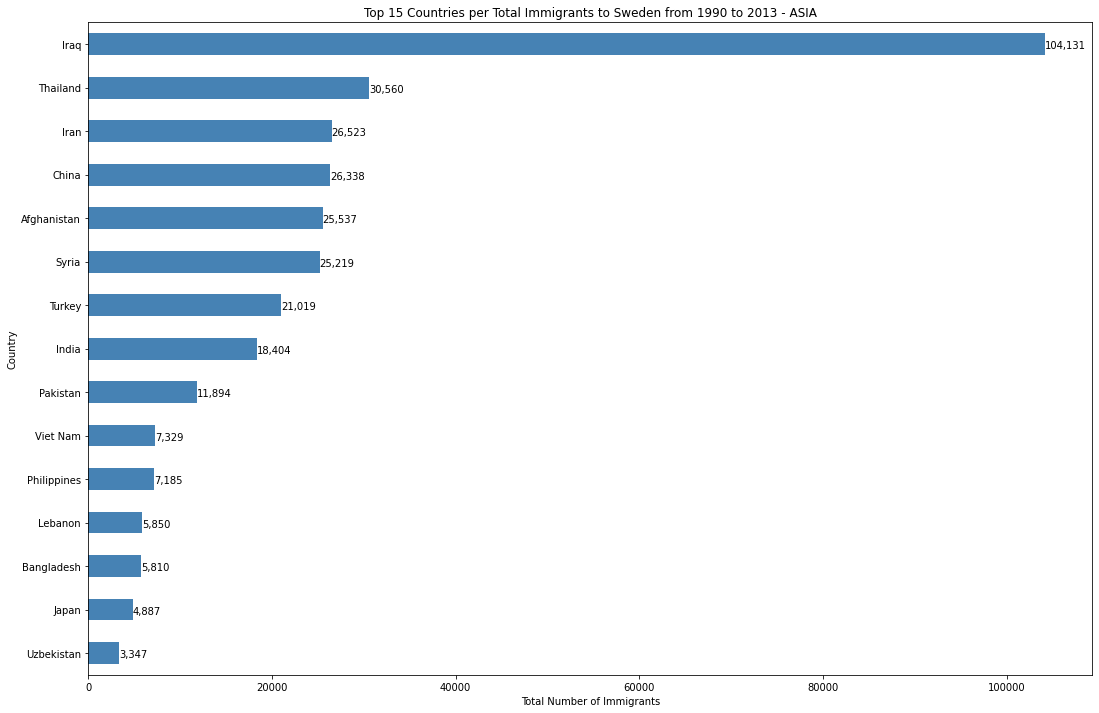

In [216]:
df_top15_i_total_asia.plot(kind='barh', figsize=(18, 12), color='steelblue')

plt.xlabel('Total Number of Immigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Immigrants to Sweden from 1990 to 2013 - ASIA') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_i_total_asia): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='black')


plt.show()

---------------

### America

In [217]:
df_top15_e_america = df_sweden_emigrants[(df_sweden_emigrants['Continent']=='Latin America and the Caribbean') | (df_sweden_emigrants['Continent']=='Northern America')]
df_top15_e_america.head(15)

Continent  \
Country                                                               
United States of America                           Northern America   
Canada                                             Northern America   
Chile                               Latin America and the Caribbean   
Brazil                              Latin America and the Caribbean   
Mexico                              Latin America and the Caribbean   
Colombia                            Latin America and the Caribbean   
Argentina                           Latin America and the Caribbean   
Peru                                Latin America and the Caribbean   
Cuba                                Latin America and the Caribbean   
Bolivia (Plurinational State of)    Latin America and the Caribbean   
Uruguay                             Latin America and the Caribbean   
Ecuador                             Latin America and the Caribbean   
Venezuela (Bolivarian Republic of)  Latin America and the Caribbean   
El Salvador                         Latin America and the Caribbean   
Nicaragua                           Latin America and the Caribbean   

                                              Region         Development  \
Country                                                                    
United States of America            Northern America   Developed regions   
Canada                              Northern America   Developed regions   
Chile                                  South America  Developing regions   
Brazil                                 South America  Developing regions   
Mexico                               Central America  Developing regions   
Colombia                               South America  Developing regions   
Argentina                              South America  Developing regions   
Peru                                   South America  Developing regions   
Cuba                                       Caribbean  Developing regions   
Bolivia (Plurinational State of)       South America  Developing regions   
Uruguay                                South America  Developing regions   
Ecuador                                South America  Developing regions   
Venezuela (Bolivarian Republic of)     South America  Developing regions   
El Salvador                          Central America  Developing regions   
Nicaragua                            Central America  Developing regions   

                                    1980  1981  1982  1983  1984  1985  1986  \
Country                                                                        
United States of America             0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Canada                               0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Chile                                0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Brazil                               0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Mexico                               0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Colombia                             0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Argentina                            0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Peru                                 0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Cuba                                 0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Bolivia (Plurinational State of)     0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Uruguay                              0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Ecuador                              0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Venezuela (Bolivarian Republic of)   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
El Salvador                          0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Nicaragua                            0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                                    ...   2005    2006   2007   2008   2009  \
Country                             ...                                       
United States of America            ..

In [218]:
df_top15_e_america = df_top15_e_america.head(15)
df_top15_e_america.rename(index={'United States of America':'USA','Venezuela (Bolivarian Republic of)':'Venezuela','Bolivia (Plurinational State of)':'Bolivia'}, inplace=True)
df_top15_e_america

Continent            Region  \
Country                                                          
USA                         Northern America  Northern America   
Canada                      Northern America  Northern America   
Chile        Latin America and the Caribbean     South America   
Brazil       Latin America and the Caribbean     South America   
Mexico       Latin America and the Caribbean   Central America   
Colombia     Latin America and the Caribbean     South America   
Argentina    Latin America and the Caribbean     South America   
Peru         Latin America and the Caribbean     South America   
Cuba         Latin America and the Caribbean         Caribbean   
Bolivia      Latin America and the Caribbean     South America   
Uruguay      Latin America and the Caribbean     South America   
Ecuador      Latin America and the Caribbean     South America   
Venezuela    Latin America and the Caribbean     South America   
El Salvador  Latin America and the Caribbean   Central America   
Nicaragua    Latin America and the Caribbean   Central America   

                    Development  1980  1981  1982  1983  1984  1985  1986  \
Country                                                                     
USA           Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Canada        Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Chile        Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Brazil       Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Mexico       Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Colombia     Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Argentina    Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Peru         Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Cuba         Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Bolivia      Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Uruguay      Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Ecuador      Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Venezuela    Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
El Salvador  Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Nicaragua    Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

             ...   2005    2006   2007   2008   2009   2010   2011   2012  \
Country      ...                                                            
USA          ...  593.0  1203.0  778.0  563.0  535.0  706.0  645.0  840.0   
Canada       ...  125.0   206.0  154.0  152.0  111.0  179.0  162.0  238.0   
Chile        ...  134.0   142.0  148.0   89.0   66.0  122.0  109.0  140.0   
Brazil       ...   93.0   147.0  127.0  118.0  125.0  141.0  119.0  145.0   
Mexico       ...   45.0   129.0   90.0   55.0   36.0   66.0   75.0   96.0   
Colombia     ...   30.0    55.0   46.0   53.0   37.0   32.0   55.0   56.0   
Argentina    ...   23.0    43.0   36.0   22.0   22.0   20.0   28.0   29.0   
Peru         ...   19.0    24.0   27.0   16.0   18.0   27.0   33.0   42.0   
Cuba         ...   18.0    26.0   23.0   19.0   12.0   23.0   23.0   21.0   
Bolivia      ...   10.0    21.0   18.0   11.0   11.0   22.0   15.0   23.0   
Uruguay      ...   18.0    16.0   16.0   12.0    4.0   13.0    4.0    7.0   
Ecuador      ...    9.0    25.0   16.0   11.0   10.0   17.0   10.0   21.0   
Venezuela    ...    7.0    13.0   14.0   15.0    7.0    7.0   17.0   17.0   
El Salvador  ...    4.0     6.0    5.0    7.0    0.0    9.0    2.0    8.0   
Nicaragua    ...    6.0     4.0   10.0    8.0    1.0    4.0   14.0   10.0   

              2013    Total  
Country                      
USA          698.0  11902.0  
Canada       159.0   2490.0  
Chile        146.0   2204.0  
Brazil       144.0   1701.0  
Mexico        61.0    927.0  
Colombia      48.0    547.0  
Argentina     21.0    421.0  
Peru          39.0    

In [219]:
df_top15_e_america.sort_values(by='Total', ascending=True, inplace=True)
df_top15_e_total_america = df_top15_e_america['Total']
df_top15_e_total_america

Country
Nicaragua        100.0
El Salvador      117.0
Venezuela        164.0
Ecuador          175.0
Uruguay          188.0
Bolivia          272.0
Cuba             302.0
Peru             364.0
Argentina        421.0
Colombia         547.0
Mexico           927.0
Brazil          1701.0
Chile           2204.0
Canada          2490.0
USA            11902.0
Name: Total, dtype: float64

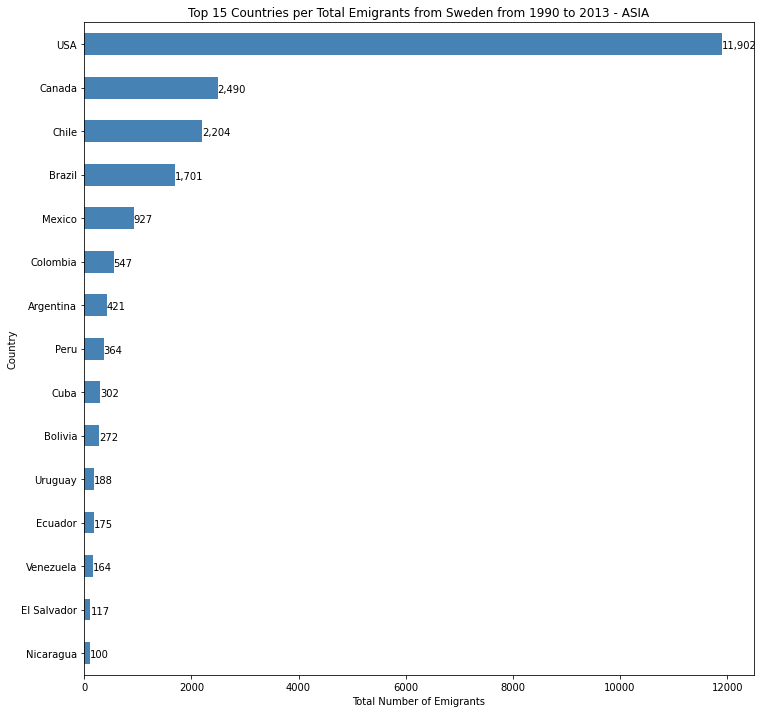

In [220]:
df_top15_e_total_america.plot(kind='barh', figsize=(12, 12), color='steelblue')

plt.xlabel('Total Number of Emigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Emigrants from Sweden from 1990 to 2013 - ASIA') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_e_total_america): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='black')


plt.show()

------------

In [221]:
df_top15_i_america = df_sweden_immigrants[(df_sweden_immigrants['Continent']=='Latin America and the Caribbean') | (df_sweden_immigrants['Continent']=='Northern America')]
df_top15_i_america.head(15)

Continent  \
Country                                                               
United States of America                           Northern America   
Chile                               Latin America and the Caribbean   
Brazil                              Latin America and the Caribbean   
Colombia                            Latin America and the Caribbean   
Canada                                             Northern America   
Peru                                Latin America and the Caribbean   
Bolivia (Plurinational State of)    Latin America and the Caribbean   
Mexico                              Latin America and the Caribbean   
Cuba                                Latin America and the Caribbean   
Ecuador                             Latin America and the Caribbean   
Argentina                           Latin America and the Caribbean   
El Salvador                         Latin America and the Caribbean   
Venezuela (Bolivarian Republic of)  Latin America and the Caribbean   
Dominican Republic                  Latin America and the Caribbean   
Nicaragua                           Latin America and the Caribbean   

                                              Region         Development  \
Country                                                                    
United States of America            Northern America   Developed regions   
Chile                                  South America  Developing regions   
Brazil                                 South America  Developing regions   
Colombia                               South America  Developing regions   
Canada                              Northern America   Developed regions   
Peru                                   South America  Developing regions   
Bolivia (Plurinational State of)       South America  Developing regions   
Mexico                               Central America  Developing regions   
Cuba                                       Caribbean  Developing regions   
Ecuador                                South America  Developing regions   
Argentina                              South America  Developing regions   
El Salvador                          Central America  Developing regions   
Venezuela (Bolivarian Republic of)     South America  Developing regions   
Dominican Republic                         Caribbean  Developing regions   
Nicaragua                            Central America  Developing regions   

                                    1980  1981  1982  1983  1984  1985  1986  \
Country                                                                        
United States of America             0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Chile                                0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Brazil                               0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Colombia                             0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Canada                               0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Peru                                 0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Bolivia (Plurinational State of)     0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Mexico                               0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Cuba                                 0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Ecuador                              0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Argentina                            0.0   0.0   0.0   0.0   0.0   0.0   0.0   
El Salvador                          0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Venezuela (Bolivarian Republic of)   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Dominican Republic                   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Nicaragua                            0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                                    ...   2005   2006   2007    2008    2009  \
Country                             ...                                        
United States of America            

In [222]:
df_top15_i_america = df_top15_i_america.head(15)
df_top15_i_america.rename(index={'United States of America':'USA','Venezuela (Bolivarian Republic of)':'Venezuela','Bolivia (Plurinational State of)':'Bolivia'}, inplace=True)
df_top15_i_america

Continent            Region  \
Country                                                                 
USA                                Northern America  Northern America   
Chile               Latin America and the Caribbean     South America   
Brazil              Latin America and the Caribbean     South America   
Colombia            Latin America and the Caribbean     South America   
Canada                             Northern America  Northern America   
Peru                Latin America and the Caribbean     South America   
Bolivia             Latin America and the Caribbean     South America   
Mexico              Latin America and the Caribbean   Central America   
Cuba                Latin America and the Caribbean         Caribbean   
Ecuador             Latin America and the Caribbean     South America   
Argentina           Latin America and the Caribbean     South America   
El Salvador         Latin America and the Caribbean   Central America   
Venezuela           Latin America and the Caribbean     South America   
Dominican Republic  Latin America and the Caribbean         Caribbean   
Nicaragua           Latin America and the Caribbean   Central America   

                           Development  1980  1981  1982  1983  1984  1985  \
Country                                                                      
USA                  Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   
Chile               Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Brazil              Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Colombia            Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Canada               Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   
Peru                Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Bolivia             Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Mexico              Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Cuba                Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Ecuador             Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Argentina           Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
El Salvador         Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Venezuela           Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Dominican Republic  Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Nicaragua           Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   

                    1986  ...   2005   2006   2007    2008    2009    2010  \
Country                   ...                                                
USA                  0.0  ...  914.0  901.0  954.0  1129.0  1196.0  1329.0   
Chile                0.0  ...  343.0  442.0  402.0   372.0   390.0   379.0   
Brazil               0.0  ...  313.0  402.0  401.0   475.0   436.0   380.0   
Colombia             0.0  ...  444.0  506.0  327.0   297.0   246.0   269.0   
Canada               0.0  ...  180.0  227.0  234.0   268.0   344.0   336.0   
Peru                 0.0  ...  221.0  317.0  253.0   265.0   275.0   251.0   
Bolivia              0.0  ...   78.0  215.0  186.0   205.0   282.0   320.0   
Mexico               0.0  ...  159.0  127.0  147.0   208.0   186.0   146.0   
Cuba                 0.0  ...  111.0  153.0  136.0   145.0   131.0   106.0   
Ecuador              0.0  ...   94.0  202.0  145.0   106.0    97.0   112.0   
Argentina            0.0  ...   65.0   62.0   64.0    84.0    75.0    67.0   
El Salvador          0.0  ...   37.0   98.0   39.0    50.0    50.0    63.0   
Venezuela            0.0  ...   43.0   52.0   49.0    62.0    45.0    52.0   
Dominican Republic   0.0  ...   31.0   56.0   37.0    44.0    42.0    41.0   
Nicaragua            0.0  ...   23.0   29.0   30.0    33.0    37.0    38.0   

                      2011    2012    2013    Total  
Country                                              
USA                 1227.0  1426.0  14

In [223]:
df_top15_i_america.sort_values(by='Total', ascending=True, inplace=True)
df_top15_i_total_america = df_top15_i_america['Total']
df_top15_i_total_america

Country
Nicaragua               464.0
Dominican Republic      506.0
Venezuela               699.0
El Salvador             784.0
Argentina              1012.0
Ecuador                1465.0
Cuba                   1985.0
Mexico                 2238.0
Bolivia                2406.0
Peru                   3725.0
Canada                 3973.0
Colombia               4539.0
Brazil                 5132.0
Chile                  5810.0
USA                   17425.0
Name: Total, dtype: float64

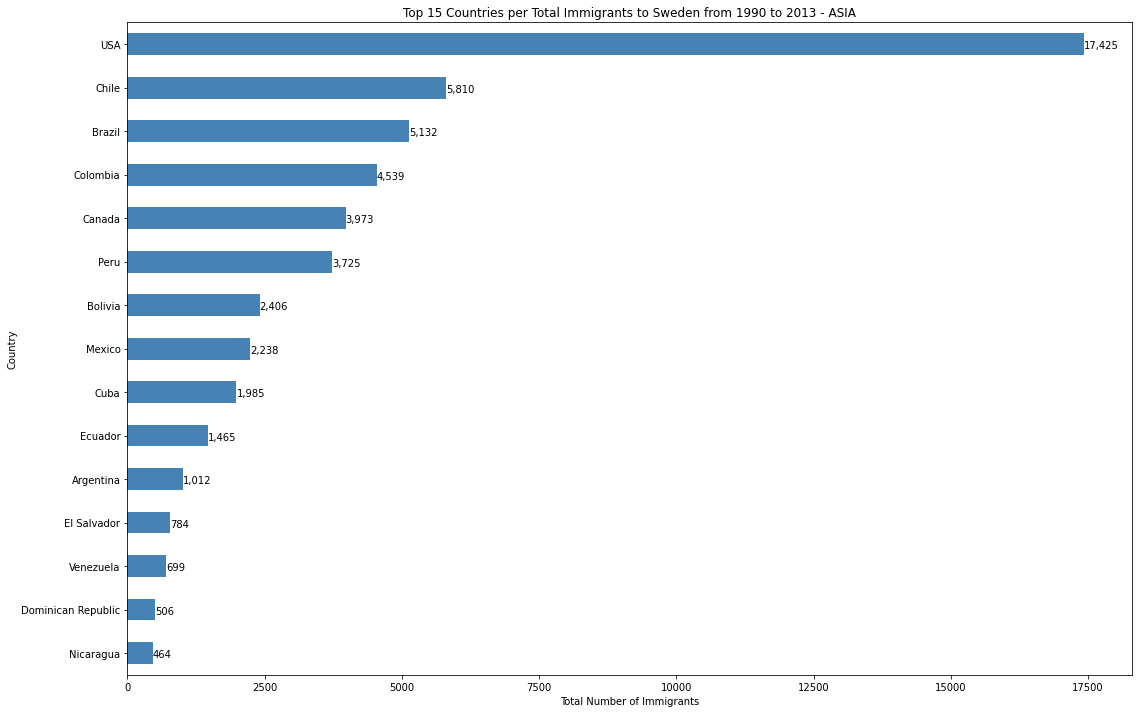

In [224]:
df_top15_i_total_america.plot(kind='barh', figsize=(18, 12), color='steelblue')

plt.xlabel('Total Number of Immigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Immigrants to Sweden from 1990 to 2013 - ASIA') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_i_total_america): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='black')


plt.show()

---------------

### Oceania

In [225]:
df_top15_e_oceania = df_sweden_emigrants[df_sweden_emigrants['Continent']=='Oceania']
df_top15_e_oceania.head(15)

Continent                     Region         Development  \
Country                                                                     
Australia          Oceania  Australia and New Zealand   Developed regions   
New Zealand        Oceania  Australia and New Zealand   Developed regions   
Fiji               Oceania                  Melanesia  Developing regions   
Kiribati           Oceania                 Micronesia  Developing regions   
Tonga              Oceania                  Polynesia  Developing regions   
Samoa              Oceania                  Polynesia  Developing regions   
Papua New Guinea   Oceania                  Melanesia  Developing regions   
Palau              Oceania                 Micronesia  Developing regions   

                  1980  1981  1982  1983  1984  1985  1986  ...   2005   2006  \
Country                                                     ...                 
Australia          0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  186.0  284.0   
New Zealand        0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   62.0   82.0   
Fiji               0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    2.0    1.0   
Kiribati           0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    1.0    0.0   
Tonga              0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0    1.0   
Samoa              0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0    0.0   
Papua New Guinea   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0    0.0   
Palau              0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0    0.0   

                   2007   2008   2009   2010   2011   2012   2013   Total  
Country                                                                    
Australia         204.0  181.0  114.0  141.0  202.0  200.0  158.0  3025.0  
New Zealand        48.0   30.0   26.0   50.0   35.0   69.0   59.0   759.0  
Fiji                2.0    0.0    0.0    0.0    0.0    0.0    0.0     8.0  
Kiribati            0.0    1.0    0.0    0.0    0.0    0.0    0.0     2.0  
Tonga               0.0    0.0    0.0    0.0    0.0    0.0    0.0     2.0  
Samoa               0.0    0.0    0.0    0.0    0.0    1.0    0.0     2.0  
Papua New Guinea    1.0    0.0    0.0    0.0    0.0    0.0    0.0     1.0  
Palau               0.0    0.0    0.0    0.0    0.0    0.0    0.0     1.0  

[8 rows x 38 columns]

In [226]:
df_top5_e_oceania = df_top15_e_oceania.head(5)
# df_top15_e_oceania.rename(index={'United States of America':'USA','Venezuela (Bolivarian Republic of)':'Venezuela','Bolivia (Plurinational State of)':'Bolivia'}, inplace=True)
df_top5_e_oceania

Continent                     Region         Development  1980  \
Country                                                                      
Australia     Oceania  Australia and New Zealand   Developed regions   0.0   
New Zealand   Oceania  Australia and New Zealand   Developed regions   0.0   
Fiji          Oceania                  Melanesia  Developing regions   0.0   
Kiribati      Oceania                 Micronesia  Developing regions   0.0   
Tonga         Oceania                  Polynesia  Developing regions   0.0   

             1981  1982  1983  1984  1985  1986  ...   2005   2006   2007  \
Country                                          ...                        
Australia     0.0   0.0   0.0   0.0   0.0   0.0  ...  186.0  284.0  204.0   
New Zealand   0.0   0.0   0.0   0.0   0.0   0.0  ...   62.0   82.0   48.0   
Fiji          0.0   0.0   0.0   0.0   0.0   0.0  ...    2.0    1.0    2.0   
Kiribati      0.0   0.0   0.0   0.0   0.0   0.0  ...    1.0    0.0    0.0   
Tonga         0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0    1.0    0.0   

              2008   2009   2010   2011   2012   2013   Total  
Country                                                        
Australia    181.0  114.0  141.0  202.0  200.0  158.0  3025.0  
New Zealand   30.0   26.0   50.0   35.0   69.0   59.0   759.0  
Fiji           0.0    0.0    0.0    0.0    0.0    0.0     8.0  
Kiribati       1.0    0.0    0.0    0.0    0.0    0.0     2.0  
Tonga          0.0    0.0    0.0    0.0    0.0    0.0     2.0  

[5 rows x 38 columns]

In [227]:
df_top5_e_oceania.sort_values(by='Total', ascending=True, inplace=True)
df_top5_e_total_oceania = df_top5_e_oceania['Total']
df_top5_e_total_oceania

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Country
Kiribati          2.0
Tonga             2.0
Fiji              8.0
New Zealand     759.0
Australia      3025.0
Name: Total, dtype: float64

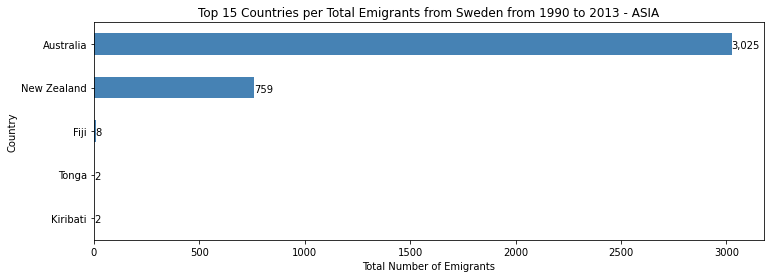

In [228]:
df_top5_e_total_oceania.plot(kind='barh', figsize=(12, 4), color='steelblue')

plt.xlabel('Total Number of Emigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Emigrants from Sweden from 1990 to 2013 - ASIA') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top5_e_total_oceania): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='black')


plt.show()

------------

In [229]:
df_top15_i_oceania = df_sweden_immigrants[df_sweden_immigrants['Continent']=='Oceania']
df_top15_i_oceania.head(15)

Continent                     Region  \
Country                                                                 
Australia                          Oceania  Australia and New Zealand   
New Zealand                        Oceania  Australia and New Zealand   
Fiji                               Oceania                  Melanesia   
Samoa                              Oceania                  Polynesia   
Tonga                              Oceania                  Polynesia   
Papua New Guinea                   Oceania                  Melanesia   
Kiribati                           Oceania                 Micronesia   
Solomon Islands                    Oceania                  Melanesia   
Vanuatu                            Oceania                  Melanesia   
Micronesia (Federated States of)   Oceania                 Micronesia   

                                         Development  1980  1981  1982  1983  \
Country                                                                        
Australia                          Developed regions   0.0   0.0   0.0   0.0   
New Zealand                        Developed regions   0.0   0.0   0.0   0.0   
Fiji                              Developing regions   0.0   0.0   0.0   0.0   
Samoa                             Developing regions   0.0   0.0   0.0   0.0   
Tonga                             Developing regions   0.0   0.0   0.0   0.0   
Papua New Guinea                  Developing regions   0.0   0.0   0.0   0.0   
Kiribati                          Developing regions   0.0   0.0   0.0   0.0   
Solomon Islands                   Developing regions   0.0   0.0   0.0   0.0   
Vanuatu                           Developing regions   0.0   0.0   0.0   0.0   
Micronesia (Federated States of)  Developing regions   0.0   0.0   0.0   0.0   

                                  1984  1985  1986  ...   2005   2006   2007  \
Country                                             ...                        
Australia                          0.0   0.0   0.0  ...  235.0  306.0  290.0   
New Zealand                        0.0   0.0   0.0  ...   76.0   55.0   70.0   
Fiji                               0.0   0.0   0.0  ...    2.0    3.0    1.0   
Samoa                              0.0   0.0   0.0  ...    2.0    0.0    1.0   
Tonga                              0.0   0.0   0.0  ...    1.0    1.0    0.0   
Papua New Guinea                   0.0   0.0   0.0  ...    0.0    1.0    0.0   
Kiribati                           0.0   0.0   0.0  ...    0.0    0.0    1.0   
Solomon Islands                    0.0   0.0   0.0  ...    0.0    0.0    0.0   
Vanuatu                            0.0   0.0   0.0  ...    0.0    0.0    0.0   
Micronesia (Federated States of)   0.0   0.0   0.0  ...    0.0    1.0    0.0   

                                   2008   2009   2010   2011   2012   2013  \
Country                                                                      
Australia                         310.0  286.0  319.0  304.0  294.0  289.0   
New Zealand                        81.0   85.0   99.0   71.0   63.0   72.0   
Fiji                                2.0    5.0    2.0    1.0    0.0    1.0   
Samoa                               0.0    2.0    0.0    0.0    1.0    0.0   
Tonga                               0.0    1.0    0.0    0.0    0.0    0.0   
Papua New Guinea                    0.0    0.0    0.0    0.0    0.0    1.0   
Kiribati                            0.0    0.0    0.0    0.0    0.0    0.0   
Solomon Islands                     0.0    0.0    0.0    0.0    0.0    0.0   
Vanuatu                             0.0    1.0    0.0    0.0    0.0    0.0   
Micronesia (Federated States of)    0.0    0.0    0.0    0.0    0.0    0.0   

                                   Total  
Country                                   
Australia                         4566.0  
New Zealand                       1200.0  
Fiji                                27.0  
Samoa                               11.0  
Tonga                                7.

In [230]:
df_top5_i_oceania = df_top15_i_oceania.head(5)
# df_top5_i_america.rename(index={'United States of America':'USA','Venezuela (Bolivarian Republic of)':'Venezuela','Bolivia (Plurinational State of)':'Bolivia'}, inplace=True)
df_top5_i_oceania

Continent                     Region         Development  1980  \
Country                                                                      
Australia     Oceania  Australia and New Zealand   Developed regions   0.0   
New Zealand   Oceania  Australia and New Zealand   Developed regions   0.0   
Fiji          Oceania                  Melanesia  Developing regions   0.0   
Samoa         Oceania                  Polynesia  Developing regions   0.0   
Tonga         Oceania                  Polynesia  Developing regions   0.0   

             1981  1982  1983  1984  1985  1986  ...   2005   2006   2007  \
Country                                          ...                        
Australia     0.0   0.0   0.0   0.0   0.0   0.0  ...  235.0  306.0  290.0   
New Zealand   0.0   0.0   0.0   0.0   0.0   0.0  ...   76.0   55.0   70.0   
Fiji          0.0   0.0   0.0   0.0   0.0   0.0  ...    2.0    3.0    1.0   
Samoa         0.0   0.0   0.0   0.0   0.0   0.0  ...    2.0    0.0    1.0   
Tonga         0.0   0.0   0.0   0.0   0.0   0.0  ...    1.0    1.0    0.0   

              2008   2009   2010   2011   2012   2013   Total  
Country                                                        
Australia    310.0  286.0  319.0  304.0  294.0  289.0  4566.0  
New Zealand   81.0   85.0   99.0   71.0   63.0   72.0  1200.0  
Fiji           2.0    5.0    2.0    1.0    0.0    1.0    27.0  
Samoa          0.0    2.0    0.0    0.0    1.0    0.0    11.0  
Tonga          0.0    1.0    0.0    0.0    0.0    0.0     7.0  

[5 rows x 38 columns]

In [231]:
df_top5_i_oceania.sort_values(by='Total', ascending=True, inplace=True)
df_top5_i_total_oceania = df_top5_i_oceania['Total']
df_top5_i_total_oceania

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Country
Tonga             7.0
Samoa            11.0
Fiji             27.0
New Zealand    1200.0
Australia      4566.0
Name: Total, dtype: float64

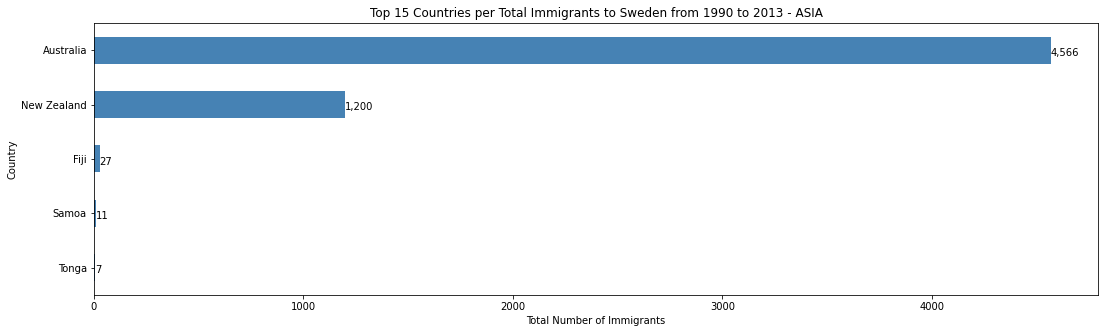

In [232]:
df_top5_i_total_oceania.plot(kind='barh', figsize=(18, 5), color='steelblue')

plt.xlabel('Total Number of Immigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Immigrants to Sweden from 1990 to 2013 - ASIA') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top5_i_total_oceania): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='black')


plt.show()

---------------

### 4.2.4 Top 15 Countries - Sorted by Total - ___Word Clouds___<a id="4.2.4"></a>

---------------

### World

In [233]:
df_top15_e_total

Country
Spain                          4189.0
Iraq                           4427.0
Iran (Islamic Republic of)     4536.0
Netherlands                    4592.0
Iceland                        5778.0
France                         7369.0
China                          7807.0
India                          7855.0
Poland                         9887.0
USA                           11902.0
UK                            12524.0
Germany                       14749.0
Norway                        27158.0
Denmark                       34193.0
Finland                       41013.0
Name: Total, dtype: float64

In [234]:
total_top15_e = df_top15_e_total.sum()
total_top15_e

197979.0

In [235]:
df_top15_e.sort_values(by='Total', ascending=False, inplace=True)
df_top15_e_total_new = pd.DataFrame(df_top15_e['Total'])
df_top15_e_total_new

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Total
Country                            
Finland                     41013.0
Denmark                     34193.0
Norway                      27158.0
Germany                     14749.0
UK                          12524.0
USA                         11902.0
Poland                       9887.0
India                        7855.0
China                        7807.0
France                       7369.0
Iceland                      5778.0
Netherlands                  4592.0
Iran (Islamic Republic of)   4536.0
Iraq                         4427.0
Spain                        4189.0

In [236]:
max_words = 60
word_string = ''
for country in df_top15_e_total_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_e_total_new.loc[country,'Total']/float(total_top15_e)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Finland Finland Finland Finland Finland Finland Finland Finland Finland Finland Finland Finland Denmark Denmark Denmark Denmark Denmark Denmark Denmark Denmark Denmark Denmark Norway Norway Norway Norway Norway Norway Norway Norway Germany Germany Germany Germany UK UK UK USA USA USA Poland Poland India India China China France France Iceland Netherlands Iraq Spain '

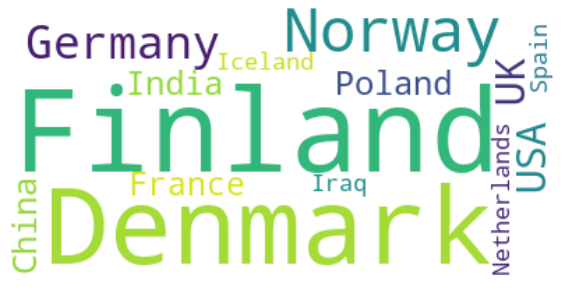

In [237]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

------------------

In [238]:
df_top15_i_total

Country
India                          18404.0
Turkey                         21019.0
UK                             22295.0
Syrian Arab Republic           25219.0
Afghanistan                    25537.0
China                          26338.0
Iran (Islamic Republic of)     26523.0
Thailand                       30560.0
Germany                        34088.0
Norway                         38506.0
Finland                        44851.0
Somalia                        50370.0
Denmark                        51444.0
Poland                         54574.0
Iraq                          104131.0
Name: Total, dtype: float64

In [239]:
total_top15_i = df_top15_i_total.sum()
total_top15_i

573859.0

In [240]:
df_top15_i.sort_values(by='Total', ascending=False, inplace=True)
df_top15_i_total_new = pd.DataFrame(df_top15_i['Total'])
df_top15_i_total_new

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Total
Country                             
Iraq                        104131.0
Poland                       54574.0
Denmark                      51444.0
Somalia                      50370.0
Finland                      44851.0
Norway                       38506.0
Germany                      34088.0
Thailand                     30560.0
Iran (Islamic Republic of)   26523.0
China                        26338.0
Afghanistan                  25537.0
Syrian Arab Republic         25219.0
UK                           22295.0
Turkey                       21019.0
India                        18404.0

In [241]:
max_words = 40
word_string = ''
for country in df_top15_i_total_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_i_total_new.loc[country, 'Total']/float(total_top15_i)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Iraq Iraq Iraq Iraq Iraq Iraq Iraq Poland Poland Poland Denmark Denmark Denmark Somalia Somalia Somalia Finland Finland Finland Norway Norway Germany Germany Thailand Thailand China Afghanistan UK Turkey India '

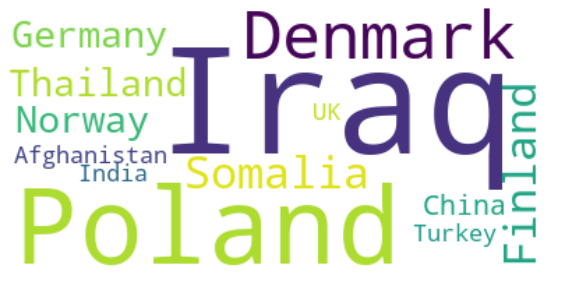

In [242]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

### Europe

In [243]:
df_top15_e_total_europe

Country
Hungary                2384.0
Russian Federation     2478.0
Romania                3338.0
Greece                 3583.0
Italy                  3680.0
Spain                  4189.0
Netherlands            4592.0
Iceland                5778.0
France                 7369.0
Poland                 9887.0
UK                    12524.0
Germany               14749.0
Norway                27158.0
Denmark               34193.0
Finland               41013.0
Name: Total, dtype: float64

In [244]:
total_top15_e_europe = df_top15_e_total_europe.sum()
total_top15_e_europe

176915.0

In [245]:
df_top15_e_europe.sort_values(by='Total', ascending=False, inplace=True)
df_top15_e_total_europe_new = pd.DataFrame(df_top15_e_europe['Total'])
df_top15_e_total_europe_new

Total
Country                    
Finland             41013.0
Denmark             34193.0
Norway              27158.0
Germany             14749.0
UK                  12524.0
Poland               9887.0
France               7369.0
Iceland              5778.0
Netherlands          4592.0
Spain                4189.0
Italy                3680.0
Greece               3583.0
Romania              3338.0
Russian Federation   2478.0
Hungary              2384.0

In [246]:
max_words = 80
word_string = ''
for country in df_top15_e_total_europe_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_e_total_europe_new.loc[country,'Total']/float(total_top15_e_europe)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Finland Finland Finland Finland Finland Finland Finland Finland Finland Finland Finland Finland Finland Finland Finland Finland Finland Finland Denmark Denmark Denmark Denmark Denmark Denmark Denmark Denmark Denmark Denmark Denmark Denmark Denmark Denmark Denmark Norway Norway Norway Norway Norway Norway Norway Norway Norway Norway Norway Norway Germany Germany Germany Germany Germany Germany UK UK UK UK UK Poland Poland Poland Poland France France France Iceland Iceland Netherlands Netherlands Spain Italy Greece Romania Hungary '

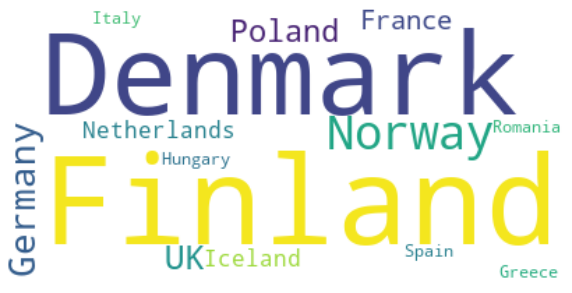

In [247]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

In [248]:
df_top15_i_total_europe

Country
Greece                     8528.0
Spain                      8823.0
Serbia                     9039.0
Netherlands               11145.0
France                    11219.0
Lithuania                 11344.0
Bosnia and Herzegovina    13733.0
Romania                   17032.0
Russian Federation        17158.0
UK                        22295.0
Germany                   34088.0
Norway                    38506.0
Finland                   44851.0
Denmark                   51444.0
Poland                    54574.0
Name: Total, dtype: float64

In [249]:
total_top15_i_europe = df_top15_i_total_europe.sum()
total_top15_i_europe

353779.0

In [250]:
df_top15_i_europe.sort_values(by='Total', ascending=False, inplace=True)
df_top15_i_total_europe_new = pd.DataFrame(df_top15_i_europe['Total'])
df_top15_i_total_europe_new

Total
Country                        
Poland                  54574.0
Denmark                 51444.0
Finland                 44851.0
Norway                  38506.0
Germany                 34088.0
UK                      22295.0
Russian Federation      17158.0
Romania                 17032.0
Bosnia and Herzegovina  13733.0
Lithuania               11344.0
France                  11219.0
Netherlands             11145.0
Serbia                   9039.0
Spain                    8823.0
Greece                   8528.0

In [251]:
df_top15_i_total_europe_new.rename(index={'Russian Federation':'Russia','Bosnia and Herzegovina':'Bosnia'}, inplace=True)
df_top15_i_total_europe_new

Total
Country             
Poland       54574.0
Denmark      51444.0
Finland      44851.0
Norway       38506.0
Germany      34088.0
UK           22295.0
Russia       17158.0
Romania      17032.0
Bosnia       13733.0
Lithuania    11344.0
France       11219.0
Netherlands  11145.0
Serbia        9039.0
Spain         8823.0
Greece        8528.0

In [252]:
max_words = 170
word_string = ''
for country in df_top15_i_total_europe_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_i_total_europe_new.loc[country,'Total']/float(total_top15_i_europe)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Poland Poland Poland Poland Poland Poland Poland Poland Poland Poland Poland Poland Poland Poland Poland Poland Poland Poland Poland Poland Poland Poland Poland Poland Poland Poland Denmark Denmark Denmark Denmark Denmark Denmark Denmark Denmark Denmark Denmark Denmark Denmark Denmark Denmark Denmark Denmark Denmark Denmark Denmark Denmark Denmark Denmark Denmark Denmark Finland Finland Finland Finland Finland Finland Finland Finland Finland Finland Finland Finland Finland Finland Finland Finland Finland Finland Finland Finland Finland Norway Norway Norway Norway Norway Norway Norway Norway Norway Norway Norway Norway Norway Norway Norway Norway Norway Norway Germany Germany Germany Germany Germany Germany Germany Germany Germany Germany Germany Germany Germany Germany Germany Germany UK UK UK UK UK UK UK UK UK UK Russia Russia Russia Russia Russia Russia Russia Russia Romania Romania Romania Romania Romania Romania Romania Romania Bosnia Bosnia Bosnia Bosnia Bosnia Bosnia Lithuania L

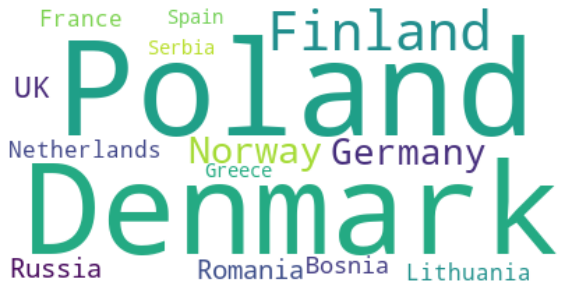

In [253]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

### Africa

In [254]:
df_top15_e_total_africa

Country
Kenya                           280.0
United Republic of Tanzania     281.0
Libya                           285.0
Eritrea                         288.0
Sudan                           309.0
Gambia                          348.0
Tunisia                         367.0
Ghana                           495.0
Morocco                         549.0
Egypt                           565.0
South Africa                    659.0
Cameroon                        671.0
Nigeria                         778.0
Ethiopia                        885.0
Somalia                        4014.0
Name: Total, dtype: float64

In [255]:
total_top15_e_africa = df_top15_e_total_africa.sum()
total_top15_e_africa

10774.0

In [256]:
df_top15_e_africa.sort_values(by='Total', ascending=False, inplace=True)
df_top15_e_total_africa_new = pd.DataFrame(df_top15_e_africa['Total'])
df_top15_e_total_africa_new

Total
Country                            
Somalia                      4014.0
Ethiopia                      885.0
Nigeria                       778.0
Cameroon                      671.0
South Africa                  659.0
Egypt                         565.0
Morocco                       549.0
Ghana                         495.0
Tunisia                       367.0
Gambia                        348.0
Sudan                         309.0
Eritrea                       288.0
Libya                         285.0
United Republic of Tanzania   281.0
Kenya                         280.0

In [257]:
df_top15_e_total_africa_new.rename(index={"Côte d'Ivoire":'CoteIvoire','Burkina Faso':'BurkinaFaso'}, inplace=True)
df_top15_e_total_africa_new

Total
Country                            
Somalia                      4014.0
Ethiopia                      885.0
Nigeria                       778.0
Cameroon                      671.0
South Africa                  659.0
Egypt                         565.0
Morocco                       549.0
Ghana                         495.0
Tunisia                       367.0
Gambia                        348.0
Sudan                         309.0
Eritrea                       288.0
Libya                         285.0
United Republic of Tanzania   281.0
Kenya                         280.0

In [258]:
max_words = 300
word_string = ''
for country in df_top15_e_total_africa_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_e_total_africa_new.loc[country,'Total']/float(total_top15_e_africa)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Ethiopia Ethiopia Ethiopia Ethiopia Ethiopia Ethiopia Ethiopia Ethiopia Ethiopia Ethiopia Ethiopia Ethiopia Eth

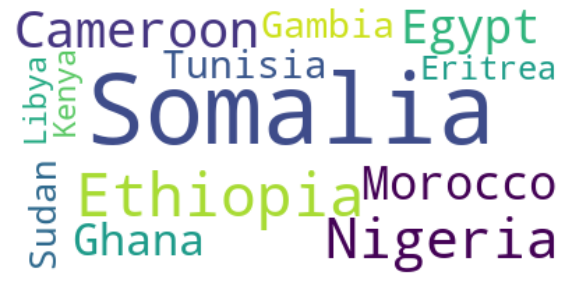

In [259]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

In [260]:
df_top15_i_total_africa

Country
Sudan                                1737.0
Kenya                                1928.0
Cameroon                             1942.0
Uganda                               1966.0
Democratic Republic of the Congo     2028.0
Ghana                                2201.0
Tunisia                              2592.0
Burundi                              2927.0
Gambia                               3018.0
Egypt                                4009.0
Nigeria                              4476.0
Morocco                              5221.0
Ethiopia                             6901.0
Eritrea                             15131.0
Somalia                             50370.0
Name: Total, dtype: float64

In [261]:
total_top15_i_africa = df_top15_i_total_africa.sum()
total_top15_i_africa

106447.0

In [262]:
df_top15_i_africa.sort_values(by='Total', ascending=False, inplace=True)
df_top15_i_total_africa_new = pd.DataFrame(df_top15_i_africa['Total'])
df_top15_i_total_africa_new

Total
Country                                  
Somalia                           50370.0
Eritrea                           15131.0
Ethiopia                           6901.0
Morocco                            5221.0
Nigeria                            4476.0
Egypt                              4009.0
Gambia                             3018.0
Burundi                            2927.0
Tunisia                            2592.0
Ghana                              2201.0
Democratic Republic of the Congo   2028.0
Uganda                             1966.0
Cameroon                           1942.0
Kenya                              1928.0
Sudan                              1737.0

In [263]:
df_top15_i_total_africa_new.rename(index={"Côte d'Ivoire":'CoteIvoire','Burkina Faso':'BurkinaFaso'}, inplace=True)
df_top15_i_total_africa_new

Total
Country                                  
Somalia                           50370.0
Eritrea                           15131.0
Ethiopia                           6901.0
Morocco                            5221.0
Nigeria                            4476.0
Egypt                              4009.0
Gambia                             3018.0
Burundi                            2927.0
Tunisia                            2592.0
Ghana                              2201.0
Democratic Republic of the Congo   2028.0
Uganda                             1966.0
Cameroon                           1942.0
Kenya                              1928.0
Sudan                              1737.0

In [264]:
max_words = 300
word_string = ''
for country in df_top15_i_total_africa_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_i_total_africa_new.loc[country,'Total']/float(total_top15_i_africa)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia Somalia

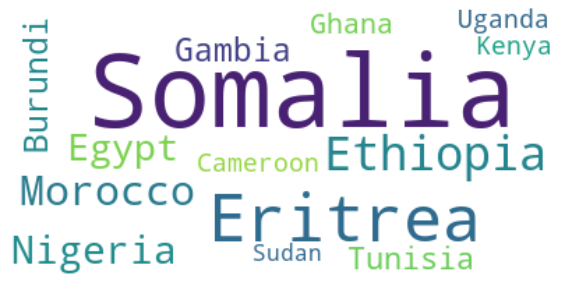

In [265]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

### Asia

In [266]:
df_top15_e_total_asia

Country
Philippines           588.0
Israel                613.0
Viet Nam              642.0
Singapore             779.0
Lebanon               948.0
Republic of Korea    1138.0
Bangladesh           1343.0
Thailand             2692.0
Turkey               3393.0
Pakistan             3673.0
Japan                4035.0
Iraq                 4427.0
Iran                 4536.0
China                7807.0
India                7855.0
Name: Total, dtype: float64

In [267]:
total_top15_e_asia = df_top15_e_total_asia.sum()
total_top15_e_asia

44469.0

In [268]:
df_top15_e_asia.sort_values(by='Total', ascending=False, inplace=True)
df_top15_e_total_asia_new = pd.DataFrame(df_top15_e_asia['Total'])
df_top15_e_total_asia_new

Total
Country                  
India              7855.0
China              7807.0
Iran               4536.0
Iraq               4427.0
Japan              4035.0
Pakistan           3673.0
Turkey             3393.0
Thailand           2692.0
Bangladesh         1343.0
Republic of Korea  1138.0
Lebanon             948.0
Singapore           779.0
Viet Nam            642.0
Israel              613.0
Philippines         588.0

In [269]:
df_top15_e_total_asia_new.rename(index={'Sri Lanka':'SriLanka','Republic of Korea':'Korea'}, inplace=True)
df_top15_e_total_asia_new

Total
Country            
India        7855.0
China        7807.0
Iran         4536.0
Iraq         4427.0
Japan        4035.0
Pakistan     3673.0
Turkey       3393.0
Thailand     2692.0
Bangladesh   1343.0
Korea        1138.0
Lebanon       948.0
Singapore     779.0
Viet Nam      642.0
Israel        613.0
Philippines   588.0

In [270]:
max_words = 300
word_string = ''
for country in df_top15_e_total_asia_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_e_total_asia_new.loc[country,'Total']/float(total_top15_e_asia)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Ja

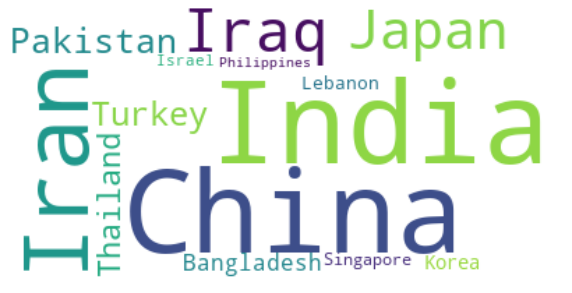

In [271]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

In [272]:
df_top15_i_total_asia

Country
Uzbekistan       3347.0
Japan            4887.0
Bangladesh       5810.0
Lebanon          5850.0
Philippines      7185.0
Viet Nam         7329.0
Pakistan        11894.0
India           18404.0
Turkey          21019.0
Syria           25219.0
Afghanistan     25537.0
China           26338.0
Iran            26523.0
Thailand        30560.0
Iraq           104131.0
Name: Total, dtype: float64

In [273]:
total_top15_i_asia = df_top15_i_total_asia.sum()
total_top15_i_asia

324033.0

In [274]:
df_top15_i_asia.sort_values(by='Total', ascending=False, inplace=True)
df_top15_i_total_asia_new = pd.DataFrame(df_top15_i_asia['Total'])
df_top15_i_total_asia_new

Total
Country              
Iraq         104131.0
Thailand      30560.0
Iran          26523.0
China         26338.0
Afghanistan   25537.0
Syria         25219.0
Turkey        21019.0
India         18404.0
Pakistan      11894.0
Viet Nam       7329.0
Philippines    7185.0
Lebanon        5850.0
Bangladesh     5810.0
Japan          4887.0
Uzbekistan     3347.0

In [275]:
df_top15_i_total_asia_new.rename(index={'Sri Lanka':'SriLanka','Republic of Korea':'Korea'}, inplace=True)
df_top15_i_total_asia_new

Total
Country              
Iraq         104131.0
Thailand      30560.0
Iran          26523.0
China         26338.0
Afghanistan   25537.0
Syria         25219.0
Turkey        21019.0
India         18404.0
Pakistan      11894.0
Viet Nam       7329.0
Philippines    7185.0
Lebanon        5850.0
Bangladesh     5810.0
Japan          4887.0
Uzbekistan     3347.0

In [276]:
max_words = 300
word_string = ''
for country in df_top15_i_total_asia_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_i_total_asia_new.loc[country,'Total']/float(total_top15_i_asia)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Iraq Thailand Thailand Thailand Thailand Thailand Thailand Thailand Thailand Thailand Thailand Thailand Thailand Thailand Thailand Thailand Thailand Thailand Thailand Thailand Thailand Thailand Thailand Thailand Thailand Thailand Thailand Thailand Thailand Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran Iran China China China China China China China China China China China China China China China China China China China China China China China China Afg

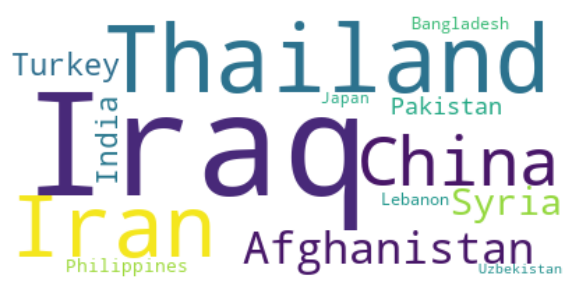

In [277]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

### America

In [278]:
df_top15_e_total_america

Country
Nicaragua        100.0
El Salvador      117.0
Venezuela        164.0
Ecuador          175.0
Uruguay          188.0
Bolivia          272.0
Cuba             302.0
Peru             364.0
Argentina        421.0
Colombia         547.0
Mexico           927.0
Brazil          1701.0
Chile           2204.0
Canada          2490.0
USA            11902.0
Name: Total, dtype: float64

In [279]:
total_top15_e_america = df_top15_e_total_america.sum()
total_top15_e_america

21874.0

In [280]:
df_top15_e_america.sort_values(by='Total', ascending=False, inplace=True)
df_top15_e_total_america_new = pd.DataFrame(df_top15_e_america['Total'])
df_top15_e_total_america_new

Total
Country             
USA          11902.0
Canada        2490.0
Chile         2204.0
Brazil        1701.0
Mexico         927.0
Colombia       547.0
Argentina      421.0
Peru           364.0
Cuba           302.0
Bolivia        272.0
Uruguay        188.0
Ecuador        175.0
Venezuela      164.0
El Salvador    117.0
Nicaragua      100.0

In [281]:
df_top15_e_total_america_new.rename(index={'Dominican Republic':'Dominican','El Salvador':'ElSalvador'}, inplace=True)
df_top15_e_total_america_new

Total
Country            
USA         11902.0
Canada       2490.0
Chile        2204.0
Brazil       1701.0
Mexico        927.0
Colombia      547.0
Argentina     421.0
Peru          364.0
Cuba          302.0
Bolivia       272.0
Uruguay       188.0
Ecuador       175.0
Venezuela     164.0
ElSalvador    117.0
Nicaragua     100.0

In [282]:
max_words = 300
word_string = ''
for country in df_top15_e_total_america_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_e_total_america_new.loc[country,'Total']/float(total_top15_e_america)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile C

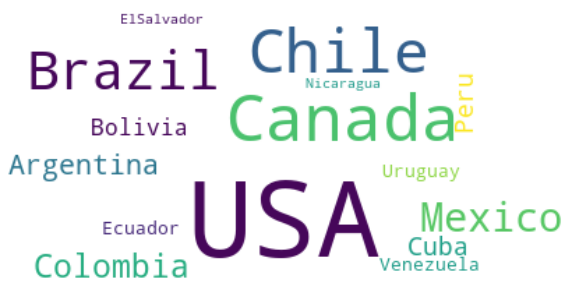

In [283]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

In [284]:
df_top15_i_total_america

Country
Nicaragua               464.0
Dominican Republic      506.0
Venezuela               699.0
El Salvador             784.0
Argentina              1012.0
Ecuador                1465.0
Cuba                   1985.0
Mexico                 2238.0
Bolivia                2406.0
Peru                   3725.0
Canada                 3973.0
Colombia               4539.0
Brazil                 5132.0
Chile                  5810.0
USA                   17425.0
Name: Total, dtype: float64

In [285]:
total_top15_i_america = df_top15_i_total_america.sum()
total_top15_i_america

52163.0

In [286]:
df_top15_i_america.sort_values(by='Total', ascending=False, inplace=True)
df_top15_i_total_america_new = pd.DataFrame(df_top15_i_america['Total'])
df_top15_i_total_america_new

Total
Country                    
USA                 17425.0
Chile                5810.0
Brazil               5132.0
Colombia             4539.0
Canada               3973.0
Peru                 3725.0
Bolivia              2406.0
Mexico               2238.0
Cuba                 1985.0
Ecuador              1465.0
Argentina            1012.0
El Salvador           784.0
Venezuela             699.0
Dominican Republic    506.0
Nicaragua             464.0

In [287]:
df_top15_i_total_america_new.rename(index={'Dominican Republic':'Dominican','El Salvador':'ElSalvador'}, inplace=True)
df_top15_i_total_america_new

Total
Country            
USA         17425.0
Chile        5810.0
Brazil       5132.0
Colombia     4539.0
Canada       3973.0
Peru         3725.0
Bolivia      2406.0
Mexico       2238.0
Cuba         1985.0
Ecuador      1465.0
Argentina    1012.0
ElSalvador    784.0
Venezuela     699.0
Dominican     506.0
Nicaragua     464.0

In [288]:
max_words = 300
word_string = ''
for country in df_top15_i_total_america_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_i_total_america_new.loc[country,'Total']/float(total_top15_i_america)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Chile Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Colombia Colombia Colombia Colombia Colombia Colombia Colombia Colombia Colombia Colombia Colombia Colombia Colombia Colombia Colombia Colombia Colombia Colombia Colombia Colombia Colombia Colombia 

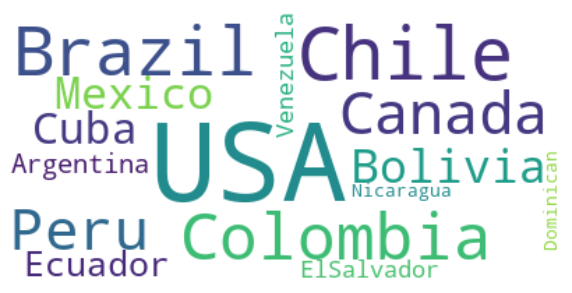

In [289]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

### Oceania

In [290]:
df_top5_e_total_oceania

Country
Kiribati          2.0
Tonga             2.0
Fiji              8.0
New Zealand     759.0
Australia      3025.0
Name: Total, dtype: float64

In [291]:
total_top5_e_oceania = df_top5_e_total_oceania.sum()
total_top5_e_oceania

3796.0

In [292]:
df_top5_e_oceania.sort_values(by='Total', ascending=False, inplace=True)
df_top5_e_total_oceania_new = pd.DataFrame(df_top5_e_oceania['Total'])
df_top5_e_total_oceania_new

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Total
Country            
Australia    3025.0
New Zealand   759.0
Fiji            8.0
Kiribati        2.0
Tonga           2.0

In [293]:
df_top5_e_total_oceania_new.rename(index={'New Zealand':'NewZealand','Papua New Guinea':'Guinea'}, inplace=True)
df_top5_e_total_oceania_new

Total
Country           
Australia   3025.0
NewZealand   759.0
Fiji           8.0
Kiribati       2.0
Tonga          2.0

In [294]:
max_words = 400
word_string = ''
for country in df_top5_e_total_oceania_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top5_e_total_oceania_new.loc[country,'Total']/float(total_top5_e_oceania)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia

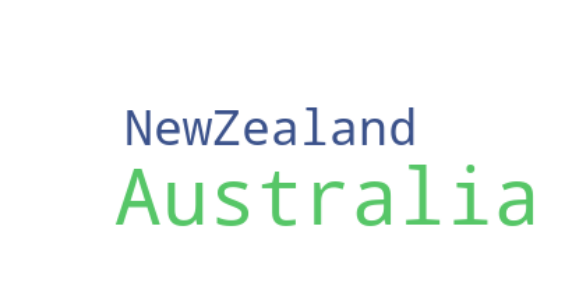

In [295]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

In [296]:
df_top5_i_total_oceania

Country
Tonga             7.0
Samoa            11.0
Fiji             27.0
New Zealand    1200.0
Australia      4566.0
Name: Total, dtype: float64

In [297]:
total_top5_i_oceania = df_top5_i_total_oceania.sum()
total_top5_i_oceania

5811.0

In [298]:
df_top5_i_oceania.sort_values(by='Total', ascending=False, inplace=True)
df_top5_i_total_oceania_new = pd.DataFrame(df_top5_i_oceania['Total'])
df_top5_i_total_oceania_new

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Total
Country            
Australia    4566.0
New Zealand  1200.0
Fiji           27.0
Samoa          11.0
Tonga           7.0

In [299]:
df_top5_i_total_oceania_new.rename(index={'New Zealand':'NewZealand','Papua New Guinea':'Guinea'}, inplace=True)
df_top5_i_total_oceania_new

Total
Country           
Australia   4566.0
NewZealand  1200.0
Fiji          27.0
Samoa         11.0
Tonga          7.0

In [300]:
max_words = 300
word_string = ''
for country in df_top5_i_total_oceania_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top5_i_total_oceania_new.loc[country,'Total']/float(total_top5_i_oceania)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia

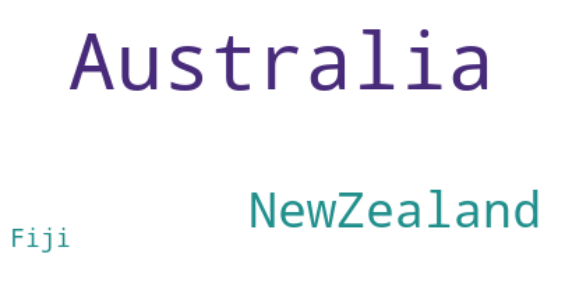

In [301]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------------

## 4.3 Emigration and Immigration Trends<a id="4.3"></a>

### 4.3.1 Total Trends Per Year<a id="4.3.1"></a>

----------------

In [302]:
df_sweden_emigrants.head()

Continent           Region        Development  1980  1981  1982  1983  \
Country                                                                         
Total       World            World              World   0.0   0.0   0.0   0.0   
Sweden     Europe  Northern Europe  Developed regions   0.0   0.0   0.0   0.0   
Finland    Europe  Northern Europe  Developed regions   0.0   0.0   0.0   0.0   
Denmark    Europe  Northern Europe  Developed regions   0.0   0.0   0.0   0.0   
Norway     Europe  Northern Europe  Developed regions   0.0   0.0   0.0   0.0   

         1984  1985  1986  ...     2005     2006     2007     2008     2009  \
Country                    ...                                                
Total     0.0   0.0   0.0  ...  38118.0  44908.0  45418.0  45294.0  39240.0   
Sweden    0.0   0.0   0.0  ...  22266.0  24875.0  24990.0  26052.0  20883.0   
Finland   0.0   0.0   0.0  ...   3171.0   2731.0   2428.0   2517.0   2296.0   
Denmark   0.0   0.0   0.0  ...   2154.0   2117.0   2510.0   2883.0   3056.0   
Norway    0.0   0.0   0.0  ...   1922.0   1821.0   1770.0   1749.0   1660.0   

            2010     2011     2012     2013     Total  
Country                                                
Total    48853.0  51179.0  51747.0  50715.0  660545.0  
Sweden   26792.0  27506.0  25116.0  26112.0  371317.0  
Finland   2153.0   2092.0   1987.0   1871.0   41013.0  
Denmark   3159.0   3081.0   2835.0   3035.0   34193.0  
Norway    1629.0   1560.0   1578.0   1631.0   27158.0  

[5 rows x 38 columns]

In [303]:
df_sweden_emigrants.columns

Index(['Continent', 'Region', 'Development', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [304]:
df_sweden_emigrants.index.to_list()

['Total',
 'Sweden',
 'Finland',
 'Denmark',
 'Norway',
 'Germany',
 'United Kingdom of Great Britain and Northern Ireland',
 'United States of America',
 'Poland',
 'India',
 'China (including Hong Kong Special Administrative Region)',
 'France',
 'Iceland',
 'Netherlands',
 'Iran (Islamic Republic of)',
 'Iraq',
 'Unknown',
 'Spain',
 'Japan',
 'Somalia',
 'Italy',
 'Pakistan',
 'Greece',
 'Turkey',
 'Romania',
 'Australia',
 'Thailand',
 'Canada',
 'Russian Federation',
 'Hungary',
 'Chile',
 'Bosnia and Herzegovina',
 'Lithuania',
 'Estonia',
 'Brazil',
 'Ireland',
 'Austria',
 'Bulgaria',
 'Bangladesh',
 'Latvia',
 'Belgium',
 'Switzerland',
 'Republic of Korea',
 'Stateless',
 'Portugal',
 'Czech Republic',
 'Lebanon',
 'Mexico',
 'Ethiopia',
 'Singapore',
 'Nigeria',
 'New Zealand',
 'Cameroon',
 'South Africa',
 'Ukraine',
 'Viet Nam',
 'Croatia',
 'Slovakia',
 'Israel',
 'Philippines',
 'Afghanistan',
 'Egypt',
 'Morocco',
 'Colombia',
 'Sri Lanka',
 'Indonesia',
 'Malaysia',


In [305]:
df_sweden_emigrants.loc['Total',years[18:]].head()

1998    38518
1999    35705
2000    34091
2001    32141
2002    33009
Name: Total, dtype: object

In [306]:
df_tot_py_e = pd.DataFrame(df_sweden_emigrants.loc['Total',years[18:]])

# change the years to type float (useful for regression later on)
df_tot_py_e.index = map(int, df_tot_py_e.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot_py_e.reset_index(inplace=True)

# rename columns
df_tot_py_e.columns = ['year', 'total']

# view the final dataframe
df_tot_py_e

year  total
0   1998  38518
1   1999  35705
2   2000  34091
3   2001  32141
4   2002  33009
5   2003  35023
6   2004  36586
7   2005  38118
8   2006  44908
9   2007  45418
10  2008  45294
11  2009  39240
12  2010  48853
13  2011  51179
14  2012  51747
15  2013  50715

In [307]:
df_tot_py_e.dtypes

year      int64
total    object
dtype: object

In [308]:
df_tot_py_e['total'] = df_tot_py_e['total'].astype("float")

In [309]:
df_tot_py_e.dtypes

year       int64
total    float64
dtype: object

(1997.5, 2013.5)

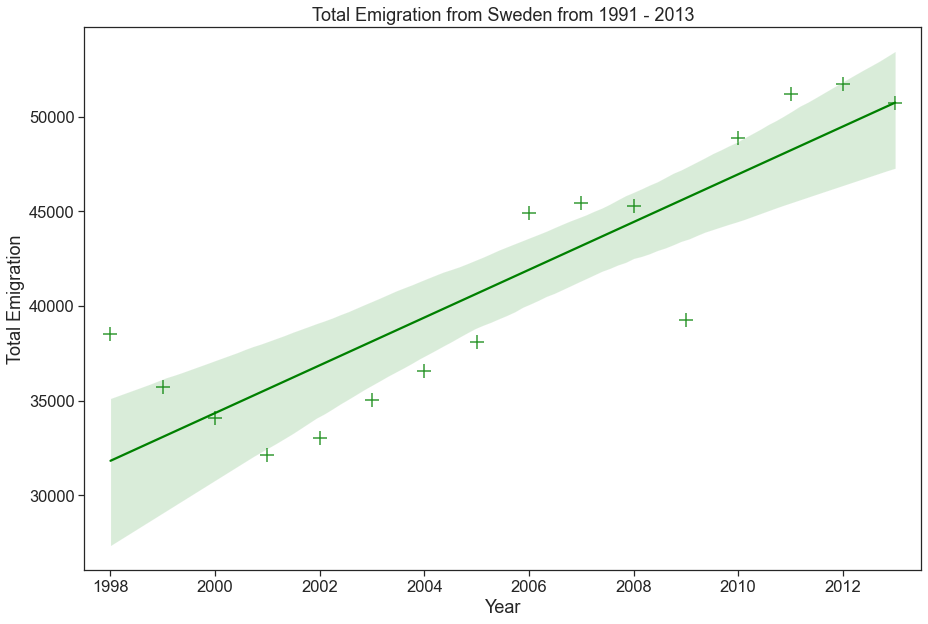

In [310]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks') # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot_py_e, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Emigration')
ax.set_title('Total Emigration from Sweden from 1991 - 2013')
ax.set_xlim(1997.5,2013.5)

----------------

In [311]:
df_sweden_immigrants.head()

Continent           Region         Development  1980  1981  1982  \
Country                                                                    
Sweden     Europe  Northern Europe   Developed regions   0.0   0.0   0.0   
Iraq         Asia     Western Asia  Developing regions   0.0   0.0   0.0   
Poland     Europe   Eastern Europe   Developed regions   0.0   0.0   0.0   
Denmark    Europe  Northern Europe   Developed regions   0.0   0.0   0.0   
Somalia    Africa   Eastern Africa  Developing regions   0.0   0.0   0.0   

         1983  1984  1985  1986  ...     2005     2006     2007     2008  \
Country                          ...                                       
Sweden    0.0   0.0   0.0   0.0  ...  13932.0  15352.0  15949.0  17853.0   
Iraq      0.0   0.0   0.0   0.0  ...   2942.0  10850.0  15200.0  12103.0   
Poland    0.0   0.0   0.0   0.0  ...   3420.0   6347.0   7525.0   6970.0   
Denmark   0.0   0.0   0.0   0.0  ...   4040.0   5137.0   5097.0   4129.0   
Somalia   0.0   0.0   0.0   0.0  ...   1314.0   2974.0   3781.0   4064.0   

            2009     2010     2011     2012     2013     Total  
Country                                                         
Sweden   18517.0  19765.0  20615.0  20462.0  20484.0  271332.0  
Iraq      8539.0   4534.0   4469.0   3579.0   2302.0  104131.0  
Poland    5167.0   4414.0   4403.0   4433.0   4611.0   54574.0  
Denmark   3761.0   3437.0   3196.0   2633.0   2495.0   51444.0  
Somalia   6902.0   6819.0   3082.0   4541.0  10966.0   50370.0  

[5 rows x 38 columns]

In [312]:
df_sweden_immigrants.columns

Index(['Continent', 'Region', 'Development', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [313]:
df_sweden_immigrants.index.to_list()

['Sweden',
 'Iraq',
 'Poland',
 'Denmark',
 'Somalia',
 'Finland',
 'Norway',
 'Germany',
 'Thailand',
 'Iran (Islamic Republic of)',
 'China',
 'Afghanistan',
 'Syrian Arab Republic',
 'United Kingdom of Great Britain and Northern Ireland',
 'Turkey',
 'India',
 'United States of America',
 'Russian Federation',
 'Romania',
 'Eritrea',
 'Bosnia and Herzegovina',
 'Pakistan',
 'Lithuania',
 'France',
 'Netherlands',
 'Serbia',
 'Spain',
 'Greece',
 'Italy',
 'Hungary',
 'Iceland',
 'Viet Nam',
 'Philippines',
 'Ethiopia',
 'Bulgaria',
 'Latvia',
 'Estonia',
 'Ukraine',
 'Lebanon',
 'Chile',
 'Bangladesh',
 'Morocco',
 'Brazil',
 'Japan',
 'Australia',
 'Colombia',
 'Nigeria',
 'Egypt',
 'Canada',
 'Croatia',
 'Peru',
 'The former Yugoslav Republic of Macedonia',
 'Uzbekistan',
 'Republic of Korea',
 'Ireland',
 'Gambia',
 'Burundi',
 'Azerbaijan',
 'Jordan',
 'Belarus',
 'Tunisia',
 'Austria',
 'Bolivia (Plurinational State of)',
 'Portugal',
 'Czech Republic',
 'Armenia',
 'Mongolia',

In [314]:
df_tot_py_i = pd.DataFrame(df_sweden_immigrants[years[18:]].sum(axis=0))

In [315]:
# change the years to type float (useful for regression later on)
df_tot_py_i.index = map(int, df_tot_py_i.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot_py_i.reset_index(inplace=True)

# rename columns
df_tot_py_i.columns = ['year', 'total']

# view the final dataframe
df_tot_py_i

year     total
0   1998   46264.0
1   1999   47402.0
2   2000   54315.0
3   2001   56861.0
4   2002   61498.0
5   2003   60849.0
6   2004   59175.0
7   2005   62200.0
8   2006   89713.0
9   2007   98253.0
10  2008   99333.0
11  2009   99586.0
12  2010   96408.0
13  2011   93867.0
14  2012  100016.0
15  2013  110157.0

In [316]:
df_tot_py_i.dtypes

year       int64
total    float64
dtype: object

In [317]:
# df_tot_py_i['total'] = df_tot_py_e['total'].astype("float")

In [318]:
df_tot_py_i.dtypes

year       int64
total    float64
dtype: object

(1997.5, 2013.5)

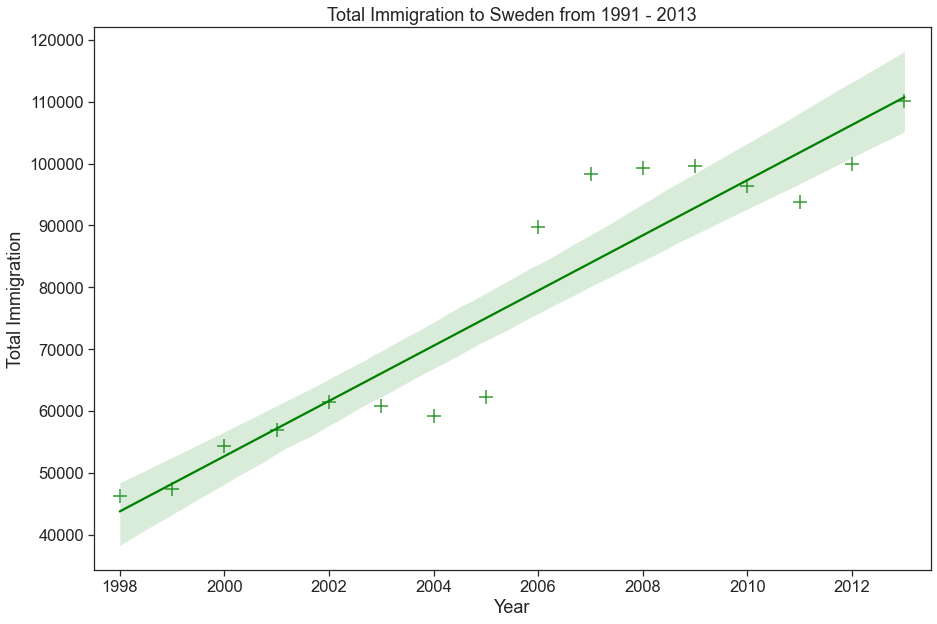

In [319]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks') # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot_py_i, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Sweden from 1991 - 2013')
ax.set_xlim(1997.5,2013.5)

--------------------

## 4.4 Choropleth Maps<a id="4.4"></a>

----------------

In [320]:
# download countries geojson file
# !wget --quiet /Users/Angelo/Data Science Projects/Emigration Immigration/world_countries.json -O world_countries.json
# world_geo = r'world_countries.json' # geojson file

import os

# world_geo = os.path.join('path', 'world_countries.json')
world_geo = os.path.join('', 'world_countries.json')


---------------

In [321]:
df_sweden_emigrants.head()

Continent           Region        Development  1980  1981  1982  1983  \
Country                                                                         
Total       World            World              World   0.0   0.0   0.0   0.0   
Sweden     Europe  Northern Europe  Developed regions   0.0   0.0   0.0   0.0   
Finland    Europe  Northern Europe  Developed regions   0.0   0.0   0.0   0.0   
Denmark    Europe  Northern Europe  Developed regions   0.0   0.0   0.0   0.0   
Norway     Europe  Northern Europe  Developed regions   0.0   0.0   0.0   0.0   

         1984  1985  1986  ...     2005     2006     2007     2008     2009  \
Country                    ...                                                
Total     0.0   0.0   0.0  ...  38118.0  44908.0  45418.0  45294.0  39240.0   
Sweden    0.0   0.0   0.0  ...  22266.0  24875.0  24990.0  26052.0  20883.0   
Finland   0.0   0.0   0.0  ...   3171.0   2731.0   2428.0   2517.0   2296.0   
Denmark   0.0   0.0   0.0  ...   2154.0   2117.0   2510.0   2883.0   3056.0   
Norway    0.0   0.0   0.0  ...   1922.0   1821.0   1770.0   1749.0   1660.0   

            2010     2011     2012     2013     Total  
Country                                                
Total    48853.0  51179.0  51747.0  50715.0  660545.0  
Sweden   26792.0  27506.0  25116.0  26112.0  371317.0  
Finland   2153.0   2092.0   1987.0   1871.0   41013.0  
Denmark   3159.0   3081.0   2835.0   3035.0   34193.0  
Norway    1629.0   1560.0   1578.0   1631.0   27158.0  

[5 rows x 38 columns]

In [322]:
df_sweden_emigrants_years = df_sweden_emigrants[years[18:]]
df_sweden_emigrants_years.head()

1998     1999     2000     2001     2002     2003     2004  \
Country                                                                  
Total    38518.0  35705.0  34091.0  32141.0  33009.0  35023.0  36586.0   
Sweden   24381.0  22123.0  21515.0  19439.0  18813.0  19889.0  20565.0   
Finland   2870.0   2710.0   2673.0   2996.0   2771.0   2871.0   2876.0   
Denmark   1199.0    973.0   1055.0   1171.0   1347.0   1628.0   1990.0   
Norway    1779.0   1524.0   1577.0   1509.0   1629.0   1893.0   1927.0   

            2005     2006     2007     2008     2009     2010     2011  \
Country                                                                  
Total    38118.0  44908.0  45418.0  45294.0  39240.0  48853.0  51179.0   
Sweden   22266.0  24875.0  24990.0  26052.0  20883.0  26792.0  27506.0   
Finland   3171.0   2731.0   2428.0   2517.0   2296.0   2153.0   2092.0   
Denmark   2154.0   2117.0   2510.0   2883.0   3056.0   3159.0   3081.0   
Norway    1922.0   1821.0   1770.0   1749.0   1660.0   1629.0   1560.0   

            2012     2013  
Country                    
Total    51747.0  50715.0  
Sweden   25116.0  26112.0  
Finland   1987.0   1871.0  
Denmark   2835.0   3035.0  
Norway    1578.0   1631.0

In [323]:
df_sweden_emigrants_years.drop(['Total','Unknown'], axis=0, inplace=True)

df_sweden_emigrants_years.reset_index(inplace=True)
df_sweden_emigrants_years.head()

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Country     1998     1999     2000     2001     2002     2003     2004  \
0   Sweden  24381.0  22123.0  21515.0  19439.0  18813.0  19889.0  20565.0   
1  Finland   2870.0   2710.0   2673.0   2996.0   2771.0   2871.0   2876.0   
2  Denmark   1199.0    973.0   1055.0   1171.0   1347.0   1628.0   1990.0   
3   Norway   1779.0   1524.0   1577.0   1509.0   1629.0   1893.0   1927.0   
4  Germany    465.0    602.0    546.0    542.0    666.0    674.0    792.0   

      2005     2006     2007     2008     2009     2010     2011     2012  \
0  22266.0  24875.0  24990.0  26052.0  20883.0  26792.0  27506.0  25116.0   
1   3171.0   2731.0   2428.0   2517.0   2296.0   2153.0   2092.0   1987.0   
2   2154.0   2117.0   2510.0   2883.0   3056.0   3159.0   3081.0   2835.0   
3   1922.0   1821.0   1770.0   1749.0   1660.0   1629.0   1560.0   1578.0   
4    777.0    961.0   1099.0   1014.0   1278.0   1305.0   1369.0   1303.0   

      2013  
0  26112.0  
1   1871.0  
2   3035.0  
3   1631.0  
4   1356.0

---------------

In [324]:
df_sweden_emigrants_total = df_sweden_emigrants[['Total']]
df_sweden_emigrants_total.head()

Total
Country          
Total    660545.0
Sweden   371317.0
Finland   41013.0
Denmark   34193.0
Norway    27158.0

In [325]:
df_sweden_emigrants_total.index.tolist()

['Total',
 'Sweden',
 'Finland',
 'Denmark',
 'Norway',
 'Germany',
 'United Kingdom of Great Britain and Northern Ireland',
 'United States of America',
 'Poland',
 'India',
 'China (including Hong Kong Special Administrative Region)',
 'France',
 'Iceland',
 'Netherlands',
 'Iran (Islamic Republic of)',
 'Iraq',
 'Unknown',
 'Spain',
 'Japan',
 'Somalia',
 'Italy',
 'Pakistan',
 'Greece',
 'Turkey',
 'Romania',
 'Australia',
 'Thailand',
 'Canada',
 'Russian Federation',
 'Hungary',
 'Chile',
 'Bosnia and Herzegovina',
 'Lithuania',
 'Estonia',
 'Brazil',
 'Ireland',
 'Austria',
 'Bulgaria',
 'Bangladesh',
 'Latvia',
 'Belgium',
 'Switzerland',
 'Republic of Korea',
 'Stateless',
 'Portugal',
 'Czech Republic',
 'Lebanon',
 'Mexico',
 'Ethiopia',
 'Singapore',
 'Nigeria',
 'New Zealand',
 'Cameroon',
 'South Africa',
 'Ukraine',
 'Viet Nam',
 'Croatia',
 'Slovakia',
 'Israel',
 'Philippines',
 'Afghanistan',
 'Egypt',
 'Morocco',
 'Colombia',
 'Sri Lanka',
 'Indonesia',
 'Malaysia',


In [326]:
df_sweden_emigrants_total.drop(['Total','Unknown','Sweden'], axis=0, inplace=True)

df_sweden_emigrants_total.rename(index={'Bolivia (Plurinational State of)':'Bolivia','Venezuela (Bolivarian Republic of)':'Venezuela','Iran (Islamic Republic of)':'Iran','Syrian Arab Republic':'Syria','China (including Hong Kong Special Administrative Region)':'China','Russian Federation':'Russia','Republic of Moldova':'Moldova','The former Yugoslav Republic of Macedonia':'Macedonia','Republic of Korea':'South Korea','Serbia':'Republic of Serbia','China, Taiwan Province of China':'Taiwan',"Democratic People's Republic of Korea":'North Korea',"Lao People's Democratic Republic":'Laos','United Kingdom of Great Britain and Northern Ireland':'United Kingdom','Guinea-Bissau':'Guinea Bissau',"Côte d'Ivoire":'Ivory Coast'}, inplace=True)

df_sweden_emigrants_total.reset_index(inplace=True)
df_sweden_emigrants_total.head()

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Country    Total
0         Finland  41013.0
1         Denmark  34193.0
2          Norway  27158.0
3         Germany  14749.0
4  United Kingdom  12524.0

-------------------------

In [327]:
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)
# tiles='Mapbox Bright'

In [328]:
# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_sweden_emigrants_total['Total'].min(),
                              df_sweden_emigrants_total['Total'].max(),
                              10, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration


# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_sweden_emigrants_total,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Emigration from Sweden',
    reset=True
)
folium.LayerControl().add_to(world_map)
# display map
world_map

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


--------------------

In [329]:
df_sweden_emigrants_total_no_Finland = df_sweden_emigrants_total
df_sweden_emigrants_total_no_Finland.drop([0], axis=0, inplace=True)
df_sweden_emigrants_total_no_Finland.head()

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Country    Total
1                   Denmark  34193.0
2                    Norway  27158.0
3                   Germany  14749.0
4            United Kingdom  12524.0
5  United States of America  11902.0

In [330]:
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)
# tiles='Mapbox Bright'

In [331]:
# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_sweden_emigrants_total_no_Finland['Total'].min(),
                              df_sweden_emigrants_total_no_Finland['Total'].max(),
                              10, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration


# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_sweden_emigrants_total_no_Finland,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Emigration from Sweden',
    reset=True
)
folium.LayerControl().add_to(world_map)
# display map
world_map

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


--------------------

--------------------

In [332]:
df_sweden_immigrants.head()

Continent           Region         Development  1980  1981  1982  \
Country                                                                    
Sweden     Europe  Northern Europe   Developed regions   0.0   0.0   0.0   
Iraq         Asia     Western Asia  Developing regions   0.0   0.0   0.0   
Poland     Europe   Eastern Europe   Developed regions   0.0   0.0   0.0   
Denmark    Europe  Northern Europe   Developed regions   0.0   0.0   0.0   
Somalia    Africa   Eastern Africa  Developing regions   0.0   0.0   0.0   

         1983  1984  1985  1986  ...     2005     2006     2007     2008  \
Country                          ...                                       
Sweden    0.0   0.0   0.0   0.0  ...  13932.0  15352.0  15949.0  17853.0   
Iraq      0.0   0.0   0.0   0.0  ...   2942.0  10850.0  15200.0  12103.0   
Poland    0.0   0.0   0.0   0.0  ...   3420.0   6347.0   7525.0   6970.0   
Denmark   0.0   0.0   0.0   0.0  ...   4040.0   5137.0   5097.0   4129.0   
Somalia   0.0   0.0   0.0   0.0  ...   1314.0   2974.0   3781.0   4064.0   

            2009     2010     2011     2012     2013     Total  
Country                                                         
Sweden   18517.0  19765.0  20615.0  20462.0  20484.0  271332.0  
Iraq      8539.0   4534.0   4469.0   3579.0   2302.0  104131.0  
Poland    5167.0   4414.0   4403.0   4433.0   4611.0   54574.0  
Denmark   3761.0   3437.0   3196.0   2633.0   2495.0   51444.0  
Somalia   6902.0   6819.0   3082.0   4541.0  10966.0   50370.0  

[5 rows x 38 columns]

In [333]:
df_sweden_immigrants_years = df_sweden_immigrants[years[18:]]
df_sweden_immigrants_years.head()

1998     1999     2000     2001     2002     2003     2004  \
Country                                                                  
Sweden   13690.0  15266.0  16030.0  16678.0  16484.0  15807.0  14448.0   
Iraq      5384.0   5526.0   6640.0   6511.0   7352.0   5376.0   2824.0   
Poland     613.0    673.0    649.0    809.0   1065.0   1017.0   2458.0   
Denmark   1117.0   1292.0   1990.0   2534.0   3203.0   3630.0   3753.0   
Somalia    778.0    441.0    633.0    691.0    912.0   1349.0   1123.0   

            2005     2006     2007     2008     2009     2010     2011  \
Country                                                                  
Sweden   13932.0  15352.0  15949.0  17853.0  18517.0  19765.0  20615.0   
Iraq      2942.0  10850.0  15200.0  12103.0   8539.0   4534.0   4469.0   
Poland    3420.0   6347.0   7525.0   6970.0   5167.0   4414.0   4403.0   
Denmark   4040.0   5137.0   5097.0   4129.0   3761.0   3437.0   3196.0   
Somalia   1314.0   2974.0   3781.0   4064.0   6902.0   6819.0   3082.0   

            2012     2013  
Country                    
Sweden   20462.0  20484.0  
Iraq      3579.0   2302.0  
Poland    4433.0   4611.0  
Denmark   2633.0   2495.0  
Somalia   4541.0  10966.0

In [334]:
df_sweden_immigrants_years.drop(['Sweden'], axis=0, inplace=True)

df_sweden_immigrants_years.reset_index(inplace=True)
df_sweden_immigrants_years.head()

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Country    1998    1999    2000    2001    2002    2003    2004    2005  \
0     Iraq  5384.0  5526.0  6640.0  6511.0  7352.0  5376.0  2824.0  2942.0   
1   Poland   613.0   673.0   649.0   809.0  1065.0  1017.0  2458.0  3420.0   
2  Denmark  1117.0  1292.0  1990.0  2534.0  3203.0  3630.0  3753.0  4040.0   
3  Somalia   778.0   441.0   633.0   691.0   912.0  1349.0  1123.0  1314.0   
4  Finland  2999.0  3380.0  3579.0  3445.0  3293.0  3181.0  2810.0  2895.0   

      2006     2007     2008    2009    2010    2011    2012     2013  
0  10850.0  15200.0  12103.0  8539.0  4534.0  4469.0  3579.0   2302.0  
1   6347.0   7525.0   6970.0  5167.0  4414.0  4403.0  4433.0   4611.0  
2   5137.0   5097.0   4129.0  3761.0  3437.0  3196.0  2633.0   2495.0  
3   2974.0   3781.0   4064.0  6902.0  6819.0  3082.0  4541.0  10966.0  
4   2639.0   2561.0   2405.0  2398.0  2300.0  2331.0  2329.0   2306.0

---------------

In [335]:
df_sweden_immigrants_total = df_sweden_immigrants[['Total']]
df_sweden_immigrants_total.head()

Total
Country          
Sweden   271332.0
Iraq     104131.0
Poland    54574.0
Denmark   51444.0
Somalia   50370.0

In [336]:
df_sweden_immigrants_total.index.tolist()

['Sweden',
 'Iraq',
 'Poland',
 'Denmark',
 'Somalia',
 'Finland',
 'Norway',
 'Germany',
 'Thailand',
 'Iran (Islamic Republic of)',
 'China',
 'Afghanistan',
 'Syrian Arab Republic',
 'United Kingdom of Great Britain and Northern Ireland',
 'Turkey',
 'India',
 'United States of America',
 'Russian Federation',
 'Romania',
 'Eritrea',
 'Bosnia and Herzegovina',
 'Pakistan',
 'Lithuania',
 'France',
 'Netherlands',
 'Serbia',
 'Spain',
 'Greece',
 'Italy',
 'Hungary',
 'Iceland',
 'Viet Nam',
 'Philippines',
 'Ethiopia',
 'Bulgaria',
 'Latvia',
 'Estonia',
 'Ukraine',
 'Lebanon',
 'Chile',
 'Bangladesh',
 'Morocco',
 'Brazil',
 'Japan',
 'Australia',
 'Colombia',
 'Nigeria',
 'Egypt',
 'Canada',
 'Croatia',
 'Peru',
 'The former Yugoslav Republic of Macedonia',
 'Uzbekistan',
 'Republic of Korea',
 'Ireland',
 'Gambia',
 'Burundi',
 'Azerbaijan',
 'Jordan',
 'Belarus',
 'Tunisia',
 'Austria',
 'Bolivia (Plurinational State of)',
 'Portugal',
 'Czech Republic',
 'Armenia',
 'Mongolia',

In [337]:
df_sweden_immigrants_total.drop(['Sweden'], axis=0, inplace=True)

df_sweden_immigrants_total.rename(index={'Bolivia (Plurinational State of)':'Bolivia','Venezuela (Bolivarian Republic of)':'Venezuela','Iran (Islamic Republic of)':'Iran','Syrian Arab Republic':'Syria','China (including Hong Kong Special Administrative Region)':'China','Russian Federation':'Russia','Republic of Moldova':'Moldova','The former Yugoslav Republic of Macedonia':'Macedonia','Republic of Korea':'South Korea','Serbia':'Republic of Serbia','China, Taiwan Province of China':'Taiwan',"Democratic People's Republic of Korea":'North Korea',"Lao People's Democratic Republic":'Laos','United Kingdom of Great Britain and Northern Ireland':'United Kingdom','Guinea-Bissau':'Guinea Bissau',"Côte d'Ivoire":'Ivory Coast'}, inplace=True)

df_sweden_immigrants_total.reset_index(inplace=True)
df_sweden_immigrants_total.head()

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Country     Total
0     Iraq  104131.0
1   Poland   54574.0
2  Denmark   51444.0
3  Somalia   50370.0
4  Finland   44851.0

-------------------------

In [338]:
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)
# tiles='Mapbox Bright'

In [339]:
# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_sweden_immigrants_total['Total'].min(),
                              df_sweden_immigrants_total['Total'].max(),
                              10, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration


# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_sweden_immigrants_total,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Sweden',
    reset=True
)
folium.LayerControl().add_to(world_map)
# display map
world_map

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


---------------------

In [340]:
df_sweden_immigrants_total_no_Iraq = df_sweden_immigrants_total
df_sweden_immigrants_total_no_Iraq.drop([0], axis=0, inplace=True)
df_sweden_immigrants_total_no_Iraq.head()

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Country    Total
1   Poland  54574.0
2  Denmark  51444.0
3  Somalia  50370.0
4  Finland  44851.0
5   Norway  38506.0

In [341]:
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)
# tiles='Mapbox Bright'

In [342]:
# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_sweden_immigrants_total_no_Iraq['Total'].min(),
                              df_sweden_immigrants_total_no_Iraq['Total'].max(),
                              10, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration


# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_sweden_immigrants_total_no_Iraq,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Sweden without Romania',
    reset=True
)
folium.LayerControl().add_to(world_map)
# display map
world_map

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
